In [2]:
# Installing fscparser to parse fcs files

!pip install fcsparser

In [3]:
!unzip FCM\ Data\ for\ Kartik.zip

unzip:  cannot find or open FCM Data for Kartik.zip, FCM Data for Kartik.zip.zip or FCM Data for Kartik.zip.ZIP.


In [4]:
cd gdrive/MyDrive/FCM\ Data\ for\ Kartik

/content/gdrive/MyDrive/FCM Data for Kartik


## **Abbreviations for components of FCS filenames:**



> 




*   C: Combination of Spectinomycin and Tetracycline antibiotics
*   S: Spectinomycin
*   T: Tetracycline
*   H: High Concentration
*   M: Medium Concentration
*   L: Low Concentration
*   NC: Negative control
*   PC: Positive Control
*   IND0: Inoculum on Day 0
*   D1, D2, D3, D4, D5: Days 1 to 5
*   1, 2, 3: Triplicates of each sample













In [1]:
#Importing Libraries

import argparse
import keras
from keras import regularizers
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.callbacks import EarlyStopping
from sys import argv
from collections import defaultdict
import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold, KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.gaussian_process.kernels import RBF

import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    print('---- Data Loaded ----')
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return pd.DataFrame(normalize(x_transformed)),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik\\CHD1_1.fcs'))
dir = os.path.join(dir, 'C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik')
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 

#Function to OneHotEncode column vector dataframe to return an OnehotEncoded/LabelEncoded
def transform_y(y,dencoder = 'labelencoder'):
    if dencoder == "labelencoder":
        le = LabelEncoder().fit(y)
        y_ = pd.DataFrame(le.transform(y))
        labels = list(le.classes_)
        return y_, labels
    
    else:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit(y))
        y_enc = encoder_df.transform(y).toarray()
        return y_enc, encoder_df.categories_



---- loading data ---->
---- Data Loaded ----


In [3]:
'''
 Function to plot different plots for a particular sample from the given samples
 Sample should in format -- sampleDX_1 as CHD1_1, CHD2_1
'''
def plot(sample, data):
    print('First five rows of sample fcs file -->')
    random_sample = random.choice(list(data.keys()))
    random_fcs_sample = data[random_sample]
    print(random_fcs_sample.head())
    
    # Printing Channels present in each fcs file
    print('Channels of the file are: ', channels)
    
    # Plotting and comparing the standard deviation of each of the input features:
    random_fcs_sample[features].std().plot(kind='bar', figsize=(8,6), title=f"Features Standard Deviation for {random_sample}")
    
    # Plotting the hist data in non-increasing order 

    features_highest_variance = random_fcs_sample[features].std().sort_values(ascending=False)
    features_highest_variance.plot(kind = 'bar')
    
    #Checking data colinearity via heatmap

    cm = np.corrcoef(random_fcs_sample[features].values.T)
    sns.set(font_scale=1.0)
    fig = plt.figure(figsize=(10, 8))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=features, xticklabels=features)
    plt.title('Features Correlation Heatmap')
    plt.show()
    
    corr = pd.DataFrame(data[sample]).corr()
    corr.style.background_gradient(cmap='coolwarm')

    sns.set(style='whitegrid')
    sns.scatterplot(x='FSC-H',y='SSC-A',data=random_fcs_sample)
    
    sns.set(style='whitegrid')
    sns.scatterplot(x='FSC-A',y='SSC-A',data=random_fcs_sample)
    plt.show()

plot('CHD1_1', data)

First five rows of sample fcs file -->
         FSC-A   FSC-H        SSC-A      FITC-A        PE-A    PE-Cy5-A  \
0   575.200012   895.0   558.359985  152.460007   49.500000  103.950005   
1   346.399994   796.0   544.500000  -33.660000  529.650024  147.509995   
2   599.200012   878.0   600.929993   19.799999   38.610001  -27.720001   
3  3918.400146  3450.0  9912.870117  364.320007 -660.330017   -7.920000   
4   237.600006   740.0   735.570007  103.950005  -95.040001   73.260002   

    PE-Cy7-A       APC-A   APC-Cy7-A  Pacific Blue-A     AmCyan-A       Time  
0 -69.300003  -38.400002   53.600002     -103.550003    25.070002  43.400002  
1 -66.330002 -314.399994 -118.400002      140.610001    20.710001  43.400002  
2 -19.799999 -312.800018  -78.400002       10.900001    99.190002  43.400002  
3 -73.260002  383.200012 -111.200005      815.320007  1115.070068  43.400002  
4 -57.420002 -237.600006   44.799999       73.029999    55.590000  43.400002  
Channels of the file are:           

NameError: name 'features' is not defined

In [5]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
    deta = {}
    for key in data.keys():
        deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
    return deta

### KMeans with feature vector of length 3

## Intracluster Analysis

In [6]:
# K - means clustering with 3000 feature vector for all triplicates for one day -->

# triplicates_combined contains df with triplicates data in single df for each of the samples from d1 to d5
deta = triplicates_combined()

def k_means_(num_clusters = 7, data = deta, samp = random.choice(list(deta.keys()))):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    # Selecting 3000 vectors to make a matrix of 300 * 3000
    for i in range(300):
        vector = sample.sample(n = 1000).to_numpy().flatten()
        sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (300,3000))
    
    #Using KMeans to make given num of clusters and finally return 300 vectors with the predicted labels
    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors)
    kmean.predict(sample_vectors)
    labels = kmean.labels_
    
    cluster_count = {}
    # Finding the cluster with highest number of sample vectors of an antibiotic for that day
    for cn in range(num_clusters):
        cluster_count[cn] = sum([i == cn for i in labels])
    
    cn_ = max(cluster_count, key = cluster_count.get)
    sample_vectors = sample_vectors[[i == cn_ for i in labels]]
    
    # Removed the outliers by taking highest number of samples from biggest cluster
    lb = [samp + '-' + str(label) for label in labels if label == cn_]
    
    return pd.DataFrame(sample_vectors), pd.DataFrame(lb), cn_

def get_data(num_clusters = 8, data = deta, sample = random.choice(list(deta.keys()))):
    sd = pd.DataFrame()
    labels = pd.DataFrame()
    for day in range(1,6):
        if sample !='IN':
            samp = sample + 'D' + str(day)
            an,lb,_ = k_means_(num_clusters, data = deta, samp = samp)
            sd = pd.concat([sd, an])
            labels = pd.concat([labels, lb])
    
    labels.reset_index(drop=True, inplace=True)
    if len(labels) > 0:
        labels = pd.DataFrame((labels))
    return sd, labels


# Above function returns vectors set of major cluster from day 1 to day 5 to around ~1300 Vectors


In [7]:
def allData(deta = deta):
    finalData = pd.DataFrame()
    labels = pd.DataFrame()

    unique_samples = list(set([key[:2] for key in deta.keys()]))
    for key in unique_samples:
        a, b = get_data(7, deta, key)
        finalData = pd.concat([finalData,a ], axis = 0)
        labels = pd.concat([labels, b])
    return finalData, labels

# lb has 54 classes with each class referring to each different daily sample
#lb = LabelEncoder().fit_transform(labels)
    
# Final data is the vector collection 3000 feature vectors from the major cluster from each of the samples

In [13]:
a,b = get_data(7, deta, 'PC')
c,d = get_data(7, deta, 'CH')

b = transform_y(b)

model, scores = logistic_regression(a, b)
#define metrics
model.fit(a,b)
y_pred_proba = model.predict_proba(c)[::,1]

NameError: name 'logistic_regression' is not defined

In [ ]:
fpr, tpr, _ = metrics.roc_curve(d,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
xgb(a,b)

In [ ]:
lasso(a,b)

In [116]:
m, conf_mat = naiveBayes(a,b)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.3s finished


In [ ]:
'''
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=labels, yticklabels=labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")
'''


## Intercluster Analysis

In [8]:
# deta2 is a dictionary with each column containing all the events from d1 to d5 of triplicates combined 

deta2 = {}
for key in deta.keys():
    try:
        deta2[key[:-2]] = pd.concat([deta[key[:-2] + 'D' + str(i)] for i in range(1,6)])
    except KeyError:
        deta2[key] = deta[key]

for key in deta2.keys():
    print(key, deta2[key].shape)

CH (1500000, 12)
CL (1500000, 12)
CM (1499906, 12)
IND0 (300000, 12)
NC (1500000, 12)
PC (1500000, 12)
SH (1499691, 12)
SL (1500000, 12)
SM (1500000, 12)
TH (1500000, 12)
TL (1500000, 12)
TM (1500094, 12)


## Using all the sample data in a single run:

## KMeans without PCA:
#### TSNE/LDA can also be used in place of PCA

In [9]:
#  K - means clustering with 3000 feature vector for all triplicates for all day1 to day5 -->

def k_means(num_clusters = 8, data = deta2, samp = random.choice(list(deta2.keys())), to_sample = 1500):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    for i in range(to_sample):
      # Sampling each feature vector with 1000 events chosen combined from 3*15*100,000 events dataset
      vector = sample.sample(n = 1000).to_numpy().flatten()
      sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (1500,3000))
    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors)
    kmean.predict(sample_vectors)
    labels = kmean.labels_

    lb = [samp + '-' + str(label) for label in labels]
    return sample_vectors, lb

## KMeans with PCA with 3 components:

In [10]:
# PCA dimns reduction to 3 dimensions with K - means clustering with 3000 feature vector for all triplicates for all day1 to day5 -->

def k_means_with_pca(num_clusters = 7, data = deta2, samp = random.choice(list(deta2.keys())), to_sample = 1500):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    for i in range(to_sample):
      # Sampling each feature vector with 1000 events chosen combined from 3*15*100,000 events dataset
      vector = sample.sample(n = 1000).to_numpy().flatten()
      sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (1500,3000))
    
    # Using PCA for sampling the 3000 features to 3 features(Principal Components)
    sample_vectors_ = PCA(n_components = 100).fit_transform(sample_vectors)

    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors_)
    kmean.predict(sample_vectors_)
    labels = kmean.labels_

    lb = [samp + '-' + str(label) for label in labels]
    return pd.DataFrame(sample_vectors_), lb




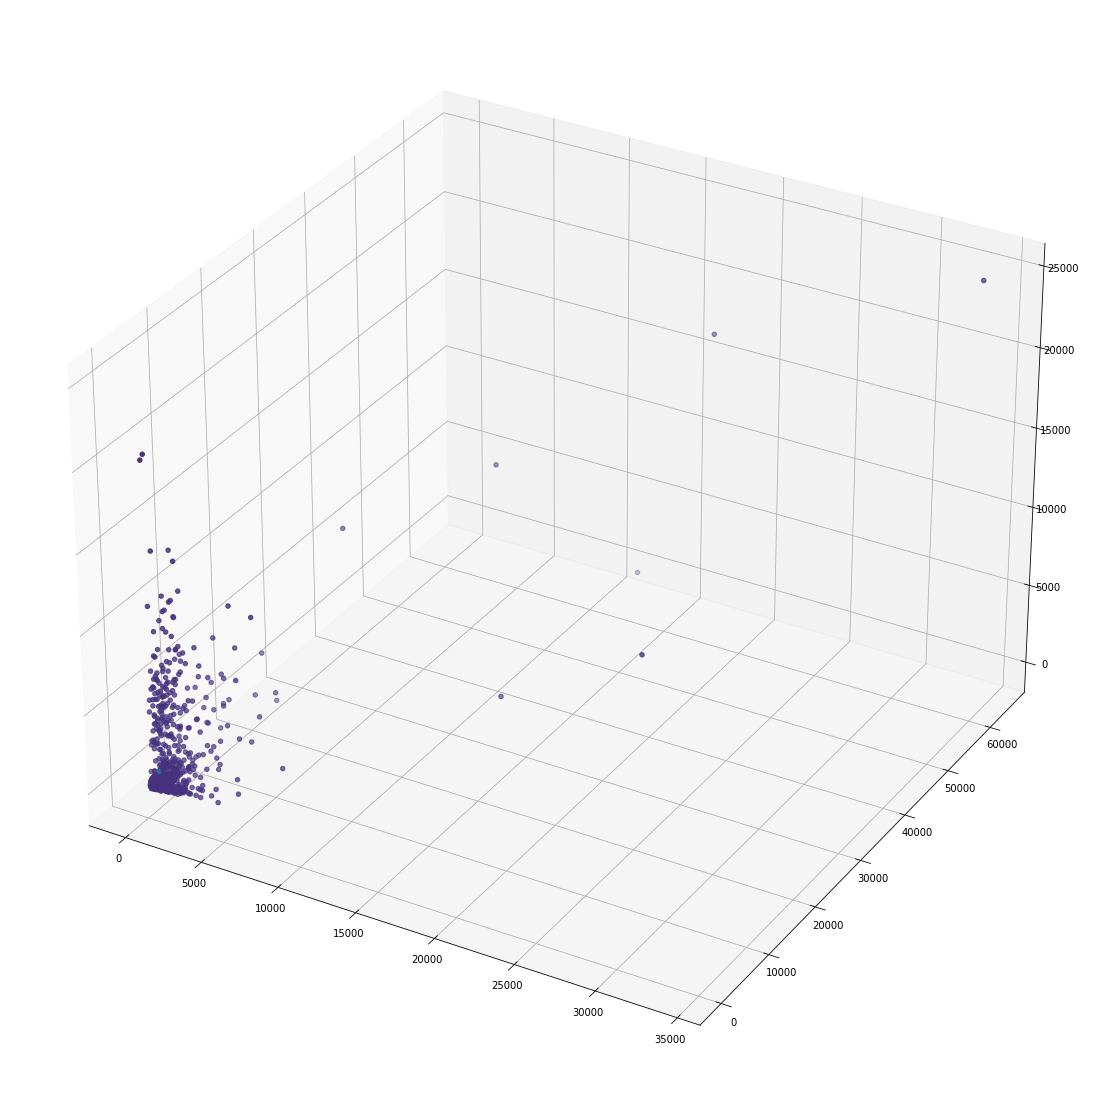

In [16]:
# <Testing> KMeans Clustering with Low concentration of  
a,b = k_means(data = deta2, samp = 'CL')

# Visualizing the above->

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111, projection='3d')
a = pd.DataFrame(a)
ax.scatter(a.iloc[:,0],a.iloc[:,1],a.iloc[:,2],c = LabelEncoder().fit_transform(b)) 

plt.show() 


In [ ]:
# Combining the dataset of all samples to make final_df of shape - (11*1500, no_columns)
final_df = pd.DataFrame()
for key in deta2.keys():
      if key!='IND0' :
        v,lb = k_means_with_pca(data = deta2, samp = key)
        p = pd.DataFrame(v)
        p['labels'] = lb
        final_df = pd.concat([final_df,p], axis = 0)

labels = final_df['labels']
final_df.drop(['labels'], axis = 1)



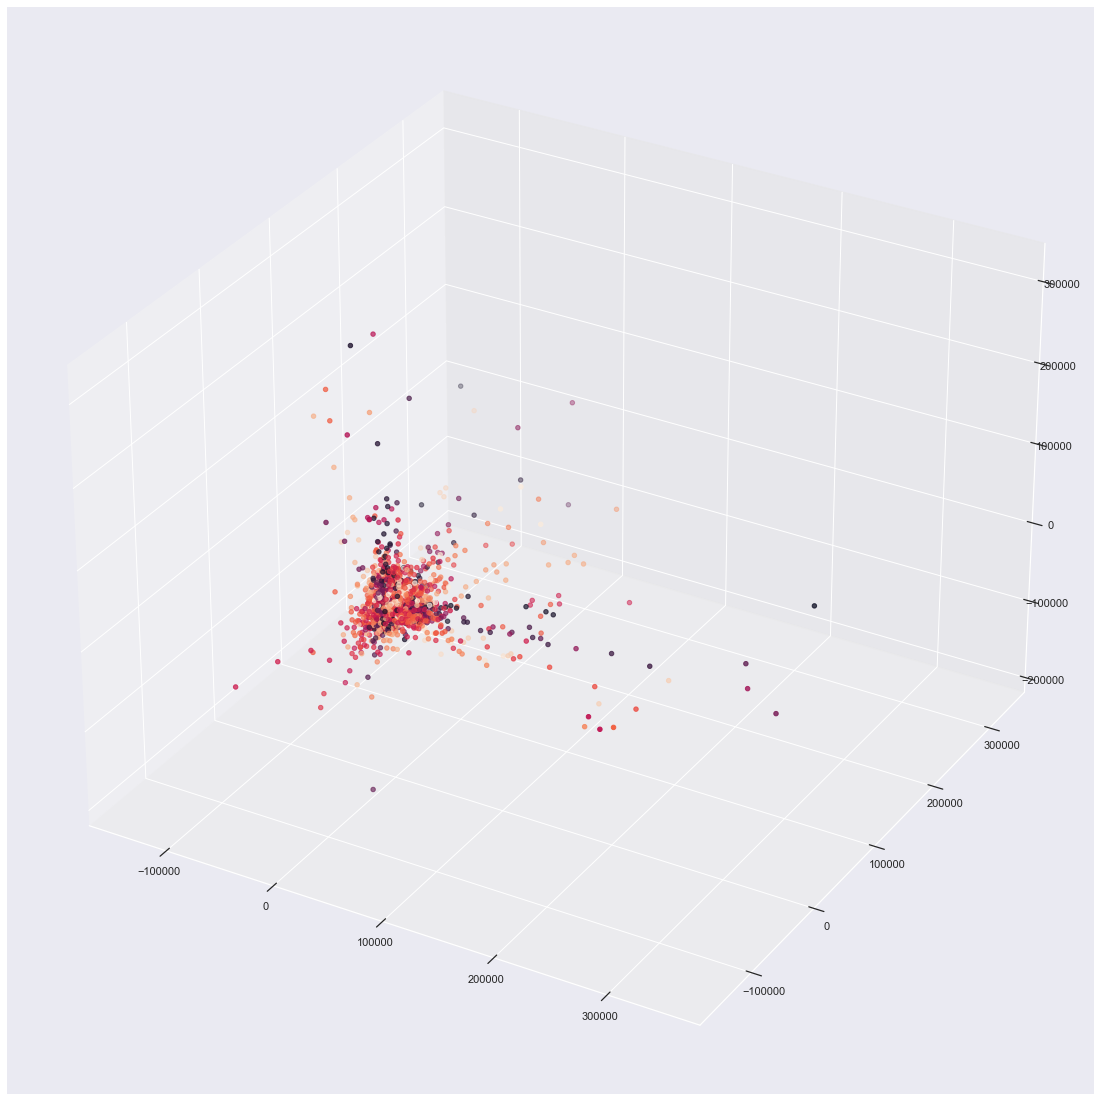

In [122]:
# Visualizing the above(used only when feature vector of length 3 was used)->

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_df.iloc[:,0],final_df.iloc[:,1],final_df.iloc[:,2],c = LabelEncoder().fit_transform(labels)) 

plt.show() 

## Using Hierarchial Clustering



In [48]:
from sklearn.cluster import AgglomerativeClustering


model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(deta['CHD1'])

MemoryError: Unable to allocate 335. GiB for an array with shape (44999850000,) and data type float64

# Clustering via DBSCAN:

In [15]:
# Vector Dataset Creation
deta = triplicates_combined()

pre_final_df = pd.DataFrame() 
for key in deta.keys():
    key = key[:-2]
    pre_final_df[key] = pd.concat([pd.DataFrame(deta[key + 'D' + str(i)]) for i in range(1,6)])


NameError: name 'triplicates_combined' is not defined

In [35]:
    
def gaussian_mm(x, param=None):
    # training gaussian mixture model 
    from sklearn.mixture import GaussianMixture
    gmm = GaussianMixture(n_components=5)
    gmm.fit(x)

    #predictions from gmm
    labels = gmm.predict(x)
    frame = pd.DataFrame(x)
    frame['cluster'] = labels
    
    return frame

ff = gaussian_mm(deta['CHD1'].values)

In [36]:
data.keys()

dict_keys(['CHD1_1', 'CHD1_2', 'CHD1_3', 'CHD2_1', 'CHD2_2', 'CHD2_3', 'CHD3_1', 'CHD3_2', 'CHD3_3', 'CHD4_1', 'CHD4_2', 'CHD4_3', 'CHD5_1', 'CHD5_2', 'CHD5_3', 'CLD1_1', 'CLD1_2', 'CLD1_3', 'CLD2_1', 'CLD2_2', 'CLD2_3', 'CLD3_1', 'CLD3_2', 'CLD3_3', 'CLD4_1', 'CLD4_2', 'CLD4_3', 'CLD5_1', 'CLD5_2', 'CLD5_3', 'CMD1_1', 'CMD1_2', 'CMD1_3', 'CMD2_1', 'CMD2_2', 'CMD2_3', 'CMD3_1', 'CMD3_2', 'CMD3_3', 'CMD4_1', 'CMD4_2', 'CMD4_3', 'CMD5_1', 'CMD5_2', 'CMD5_3', 'IND0_1', 'IND0_2', 'IND0_3', 'NCD1_1', 'NCD1_2', 'NCD1_3', 'NCD2_1', 'NCD2_2', 'NCD2_3', 'NCD3_1', 'NCD3_2', 'NCD3_3', 'NCD4_1', 'NCD4_2', 'NCD4_3', 'NCD5_1', 'NCD5_2', 'NCD5_3', 'PCD1_1', 'PCD1_2', 'PCD1_3', 'PCD2_1', 'PCD2_2', 'PCD2_3', 'PCD3_1', 'PCD3_2', 'PCD3_3', 'PCD4_1', 'PCD4_2', 'PCD4_3', 'PCD5_1', 'PCD5_2', 'PCD5_3', 'SHD1_1', 'SHD1_2', 'SHD1_3', 'SHD2_1', 'SHD2_2', 'SHD2_3', 'SHD3_1', 'SHD3_2', 'SHD3_3', 'SHD4_1', 'SHD4_2', 'SHD4_3', 'SHD5_1', 'SHD5_2', 'SHD5_3', 'SLD1_1', 'SLD1_2', 'SLD1_3', 'SLD2_1', 'SLD2_2', 'SLD2_3',

# Classification using different ML algorithms:

In [11]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import ELU
import os
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## Generation of Neural Network model

In [12]:
def getModel(num_features, num_class):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_dim = num_features))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout (0.3))

    model.add(Dense(num_class, activation='softmax'))

    model.compile (loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics=['accuracy'])
    return model


In [92]:
# Function to get a model of a particular type 

def get_model(model, param = None):   
    if model == 'svm':
        param_grid = [{"kernel": ["linear","rbf"],"gamma":[1, 0.1, 0.01],"C":[0.001, 0.1, 1]}]
        svc = SVC(probability = True)
        return param_grid, svc
    elif model == 'randomForestClassifier':
        param_grid = [{'max_depth': [100], 'min_samples_leaf': [2], 'min_samples_split': [5] , 
                       'n_estimators': [800]  }]
        rfc = RandomForestClassifier(random_state=42)
        return param_grid, rfc
    elif model == "naiveBayes":
        param_grid = [{'var_smoothing': np.logspace(0,-9, num=100)}]
        gnb = GaussianNB()
        return param_grid, gnb
    elif model == 'gbm':
        # param_grid = [{"learning_rate": [0.1, 1, 10], "min_samples_split": [300, 400, 100],
        #              "max_depth":[5,10, 15], "n_estimators":[300, 400, 100] }]
        param_grid = [{"learning_rate": [1], "min_samples_split": [300],
                      "max_depth":[5,10], "n_estimators":[100] }]
        gbm = GradientBoostingClassifier()
        return param_grid, gbm
    elif model == 'xgb':
        #param_grid = [{'gamma': [0, 1, 2], 'subsample': [0.6, 0.8, 1.0], 'n_estimators': [100, 200, 500],       
        #              'max_depth': [1, 2, 3], 'learning_rate': [10,3,1,0.1, 0.01]}]
        param_grid = [{'gamma': [ 1], 'subsample': [0.6, 0.8], 'n_estimators': [200],       
                      'max_depth': [1, 2], 'learning_rate': [0.3]}]
        xgb = XGBClassifier(nthread =4,   #when use hyperthread, xgboost may become slower
             #objective ='binary:logistic'  , min_child_weight= 11, silent = 1, colsample_bytree = 0.7, 
              seed =1337)
        return param_grid, xgb
    elif model == 'dTree':
        param_grid = [{"criterion": ['gini'], 'max_depth': [10, 50], 'min_samples_split': [10],  'min_samples_leaf': [50]} ]
        dec = DecisionTreeClassifier()
        return param_grid, dec
    elif model == 'nn':
        param_grid = [ ]
        num_features = param['num_features']
        num_classes = param['num_classes']
        nn = getModel(num_features, num_classes)
        return param_grid, nn
    elif model == 'LogisticRegression':
        param_grid = [{"penalty":['l2'],"C":[ 10, 1.0, 0.1, 0.01] , "solver":['saga']}]
        logreg = LogisticRegression()
        return param_grid, logreg
    elif model == 'LassoRegression':
        lasso_model = Lasso()
        param_grid = [{'alpha': [0.1, 0.2, 0.5, 0.8, 1.0]}]
        return param_grid, lasso_model
    elif model == 'lgb':
        param_grid = {
                  'num_leaves': [31, 127],
                  'reg_alpha': [0.1, 0.5],
                  'min_data_in_leaf': [30, 300, 400],
                  'lambda_l1': [0, 1, 1.5],
                   'lambda_l2': [0, 1]}
        lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01)
        return param_grid, lgb_estimator
    else:
        assert 0, "Choose one from : " + "'svm', 'randomForestClassifier', 'naiveBayes', 'gbm', 'xgb','nn'" 

In [93]:
Classification = ['svm', 'randomForestClassifier', 'naiveBayes', 'gbm', 'xgb','nn', 'LassoRegression', 'dTree','LogisticRegression']

## Model training without gridsearch

In [15]:
# Function to train data when gridsearch is not used for model
from sklearn.model_selection import train_test_split

def training(classifier, X, y, label_names):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_acc = accuracy_score(y_train_pred, y_train,)
    test_acc = accuracy_score(y_test_pred, y_test)
    
    # Output Confusion Matrix of the testset
    conf_matrix = confusion_matrix(y_test_pred, y_test)
    sns.heatmap(conf_matrix, annot=True)
    plt.show()
    
    target_names = label_names
    print(metrics.classification_report(y_test, y_test_pred, target_names=target_names))

    y_prob = classifier.predict_proba(X_test)     


    '''
    macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                      average="macro")
    weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                         average="weighted")
    '''
    macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                      average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                         average="weighted")
    '''
    print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    '''
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))



    fpr = {}
    tpr = {}
    thresh ={}

    n_class = len(label_names)

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)


    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= label_names[0] + ' vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= label_names[1] + ' vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= label_names[2] + ' vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    
    return train_acc, test_acc

In [55]:
# function to run grid search cv and stratified kfold on the model
def run_cv(model, X, y,label_names,param_grid,outer_folds = 2):
    i=1
    kf = StratifiedKFold(n_splits=outer_folds,random_state=1,shuffle=True)
    train_acc = []
    validation_acc = [] 
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.15)

        
    for train_index,test_index in kf.split(X_tr,y_tr):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = X_tr.iloc[train_index],X_tr.iloc[test_index]
        ytr,yvl = y_tr[train_index],y_tr[test_index]
        
        model_grid = GridSearchCV( model, param_grid, cv=5,scoring=None)
        model1 = OneVsRestClassifier(model_grid)
        model1.fit(xtr, ytr)
        
        train_pred = model1.predict(xtr)
        validation_pred = model1.predict(xvl)
        test_pred = model1.predict(X_te)
        
        print('Train_accuracy_score',accuracy_score(ytr,train_pred))        
        print('Validation_accuracy_score',accuracy_score(yvl,validation_pred))
        print('Test_accuracy_score',accuracy_score(y_te, test_pred))
        
        train_acc.append(accuracy_score(ytr,train_pred))
        validation_acc.append(accuracy_score(yvl,validation_pred))        
        i+=1
        train_accuracy = train_acc
        validation_accuracy = validation_acc
        train_accuracy_mean = np.mean(train_acc)
        validation_accuracy_mean = np.mean(validation_acc)
        
        test_accuracy = accuracy_score(y_te, test_pred)
        
        # Output Confusion Matrix of the testset
        conf_matrix = metrics.confusion_matrix(y_te, test_pred)
        sns.heatmap(conf_matrix, annot=True, fmt=".0%", cmap="cividis", xticklabels=label_names, yticklabels=label_names)
        # Plot the confusion matrix
        plt.xlabel("True label")
        plt.ylabel("Predicted label")
        plt.show()
        
        target_names = label_names
        print(metrics.classification_report(y_te, test_pred))   # , target_names=target_names
        
        y_prob = model1.predict_proba(X_te)     
        
        
        
        #macro_roc_auc_ovo = roc_auc_score(y_te, y_prob, multi_class="ovo",
        #                                  average="macro")
        #weighted_roc_auc_ovo = roc_auc_score(y_te, y_prob, multi_class="ovo",
        #                                     average="weighted")
        macro_roc_auc_ovr = roc_auc_score(y_te, y_prob, multi_class="ovr",
                                          average="macro")
        weighted_roc_auc_ovr = roc_auc_score(y_te, y_prob, multi_class="ovr",
                                             average="weighted")
        #print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
        #      "(weighted by prevalence)"
        #      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
        print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
              "(weighted by prevalence)"
              .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

        fpr, tpr, thresh, roc_auc = {}, {}, {}, {}

        n_class = len(target_names)

        for i in range(n_class):    
            fpr[i], tpr[i], thresh[i] = roc_curve(y_te, y_prob[:,i], pos_label=i)
            roc_auc[i] = auc(fpr[i],tpr[i])
            
        print(roc_auc)
        # plotting  
        if len(fpr) == 5:   
            plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= label_names[0] + ' vs Rest')
            plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= label_names[1] + ' vs Rest')
            plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= label_names[2] + ' vs Rest')
            plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label= label_names[3] + ' vs Rest')
            plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label= label_names[4] + ' vs Rest')
        else:
            plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= label_names[0] + ' vs Rest')
            plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= label_names[1] + ' vs Rest')
            plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= label_names[2] + ' vs Rest')
            plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label= label_names[3] + ' vs Rest')
            plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label= label_names[4] + ' vs Rest')
            plt.plot(fpr[5], tpr[5], linestyle='--',color='orange', label= label_names[5] + ' vs Rest')
            plt.plot(fpr[6], tpr[6], linestyle='--',color='cyan', label= label_names[6] + ' vs Rest')
            plt.plot(fpr[7], tpr[7], linestyle='--',color='maroon', label= label_names[7] + ' vs Rest')
            plt.plot(fpr[8], tpr[8], linestyle='--',color='red', label= label_names[8] + ' vs Rest')
            plt.plot(fpr[9], tpr[9], linestyle='--',color='pink', label= label_names[9] + ' vs Rest')
            plt.plot(fpr[10], tpr[10], linestyle='--',color='brown', label= label_names[9] + ' vs Rest')
            
        
        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.show()
        
    test_pred_final = model1.predict(X_te)
    print('Test_accuracy_score',accuracy_score(y_te, test_pred_final))
    # Output Confusion Matrix of the testset
    conf_matrix_final = metrics.confusion_matrix(y_te, test_pred_final)
    ax = sns.heatmap(conf_matrix_final, cmap = "cividis", annot=True)
    ax.set_title('Seaborn Confusion Matrix with labels');
    ax.set_xlabel('Predicted Sample Class')
    ax.set_ylabel('Originial Sample Class');
    ax.xaxis.set_ticklabels(label_names)
    ax.yaxis.set_ticklabels(label_names)
    plt.show()
        
    target_names = label_names
    print(metrics.classification_report(y_te, test_pred_final, target_names=target_names))
        
    y_prob_final = model1.predict_proba(X_te)
    
    print(y_prob_final)
    '''
    macro_roc_auc_ovo_final = roc_auc_score(y_te, y_prob_final, multi_class="ovo",
                                          average="macro")
    weighted_roc_auc_ovo_final = roc_auc_score(y_te, y_prob_final, multi_class="ovo",
                                         average="weighted")
    '''
    macro_roc_auc_ovr_final = roc_auc_score(y_te, y_prob_final, multi_class="ovr",
                                      average="macro")
    weighted_roc_auc_ovr_final = roc_auc_score(y_te, y_prob_final, multi_class="ovr",
                                         average="weighted")
    #print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    #      "(weighted by prevalence)"
    #      .format(macro_roc_auc_ovo_final, weighted_roc_auc_ovo_final))
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr_final, weighted_roc_auc_ovr_final))
    
    # roc curve for classes
    fpr_final = {}
    tpr_final = {}
    thresh_final ={}
    roc_auc_final = {}

    n_class = len(target_names)

    for i in range(n_class):    
        fpr_final[i], tpr_final[i], thresh_final[i] = roc_curve(y_te, y_prob_final[:,i], pos_label=i)
        roc_auc_final[i] = auc(fpr_final[i],tpr_final[i])
    
    print(roc_auc_final)
    # plotting    
    if len(fpr_final)==5:
        plt.plot(fpr_final[0], tpr_final[0], linestyle='--',color='orange', label= label_names[0] + ' vs Rest')
        plt.plot(fpr_final[1], tpr_final[1], linestyle='--',color='green', label= label_names[1] + ' vs Rest')
        plt.plot(fpr_final[2], tpr_final[2], linestyle='--',color='blue', label= label_names[2] + ' vs Rest')
        plt.plot(fpr_final[3], tpr_final[3], linestyle='--',color='yellow', label= label_names[3] + ' vs Rest')
        plt.plot(fpr_final[4], tpr_final[4], linestyle='--',color='pink', label= label_names[4] + ' vs Rest')
    else:
        plt.plot(fpr_final[0], tpr_final[0], linestyle='--',color='orange', label= label_names[0] + ' vs Rest')
        plt.plot(fpr_final[1], tpr_final[1], linestyle='--',color='green', label= label_names[1] + ' vs Rest')
        plt.plot(fpr_final[2], tpr_final[2], linestyle='--',color='blue', label= label_names[2] + ' vs Rest')
        plt.plot(fpr_final[3], tpr_final[3], linestyle='--',color='yellow', label= label_names[3] + ' vs Rest')
        plt.plot(fpr_final[4], tpr_final[4], linestyle='--',color='pink', label= label_names[4] + ' vs Rest')
        plt.plot(fpr_final[5], tpr_final[5], linestyle='--',color='pink', label= label_names[5] + ' vs Rest')
        plt.plot(fpr_final[6], tpr_final[6], linestyle='--',color='pink', label= label_names[6] + ' vs Rest')
        plt.plot(fpr_final[7], tpr_final[7], linestyle='--',color='pink', label= label_names[7] + ' vs Rest')
        plt.plot(fpr_final[8], tpr_final[8], linestyle='--',color='pink', label= label_names[8] + ' vs Rest')
        plt.plot(fpr_final[9], tpr_final[9], linestyle='--',color='pink', label= label_names[9] + ' vs Rest')
        plt.plot(fpr_final[10], tpr_final[10], linestyle='--',color='pink', label= label_names[10] + ' vs Rest')
        
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
   
    
    
    
    return model1, train_accuracy , validation_accuracy, train_accuracy_mean, validation_accuracy_mean, test_accuracy

In [17]:
# function to run neural network

def run_nn(model1, X, y, label_names,batch_size = 32, epochs = 1000):
      
    # Train model using 5 fold cross_validation
    accs = []
    cross_val_n_splits = 10
    curr_split = 1
    skf = KFold(n_splits=cross_val_n_splits, random_state = 243, shuffle=True)
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.25)
    
    for train_index, test_index in skf.split(X_tr, y_tr):
        print(f'-----Cross Validation {curr_split}/{cross_val_n_splits}-----')
        X_train, y_train = X_tr.iloc[train_index], y_tr[train_index]
        X_test, y_test = X_tr.iloc[test_index], y_tr[test_index]
        Y_train = y_train
        Y_test = y_test
       #getModel(row_len, num_classes)
        #cp_callback = ModelCheckpoint (cp_filepath, monitor="val_acc", save_best_only=True)
        history = model1.fit(X_train, Y_train)
        
    y_true = np.argmax(y_te, axis = -1)
    y_pred = np.argmax(model1.predict(X_te, batch_size=1), axis = -1)
    print ("Confusion Matrix, cross val split {}".format(curr_split))

    # Output Confusion Matrix of the testset
    conf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, cmap = "cividis")
    ax.set_title('Seaborn Confusion Matrix with labels');
    ax.set_xlabel('Predicted Sample Class')
    ax.set_ylabel('Originial Sample Class');
    ax.xaxis.set_ticklabels(label_names)
    ax.yaxis.set_ticklabels(label_names)

    plt.show()
    
    # Plotting accuracy and validation accuracy 
    acc_train = history.history['accuracy']
    print(acc_train)
    # acc_val = history.history['val_acc']
    epochs = range(1,501)
    # plt.plot(epochs, acc_train, 'g', label='Training accuracy')
    # plt.plot(epochs, acc_val, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    
    curr_split += 1
    
    target_names = label_names
    print(metrics.classification_report(y_true, y_pred, target_names=target_names))

    y_prob = model1.predict(X_te)     


    '''
    macro_roc_auc_ovo = roc_auc_score(y_true, y_prob, multi_class="ovo",
                                      average="macro")
    weighted_roc_auc_ovo = roc_auc_score(y_true, y_prob, multi_class="ovo",
                                         average="weighted")
    '''
    macro_roc_auc_ovr = roc_auc_score(y_true, y_prob, multi_class="ovr",
                                      average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_true, y_prob, multi_class="ovr",
                                         average="weighted")
    '''
    print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    '''
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = {}

    n_class = 5

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_prob[:,i], pos_label=i)


    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= label_names[0] + ' vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= label_names[1] + ' vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= label_names[2] + ' vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label= label_names[3] + ' vs Rest')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label= label_names[4] + ' vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    # plt.legend(loc='best')
    plt.show()
    return model1

print ('----- Done -----')

----- Done -----


Shape of a: (1443, 3000) and Shape of b: (1443, 1)
-----Cross Validation 1/10-----
31/31 [==============================] - 11s 34ms/step - loss: 2.1608 - accuracy: 0.2621
-----Cross Validation 1/10-----
31/31 [==============================] - 1s 21ms/step - loss: 1.6577 - accuracy: 0.3792
-----Cross Validation 1/10-----
31/31 [==============================] - 1s 19ms/step - loss: 1.3227 - accuracy: 0.4610
-----Cross Validation 1/10-----
31/31 [==============================] - 1s 17ms/step - loss: 1.0860 - accuracy: 0.5359
-----Cross Validation 1/10-----
31/31 [==============================] - 1s 16ms/step - loss: 0.9750 - accuracy: 0.5637
-----Cross Validation 1/10-----
31/31 [==============================] - 1s 20ms/step - loss: 0.8703 - accuracy: 0.6191
-----Cross Validation 1/10-----
31/31 [==============================] - 1s 19ms/step - loss: 0.8228 - accuracy: 0.6324
-----Cross Validation 1/10-----
31/31 [==============================] - 1s 25ms/step - loss: 0.7150 - accur

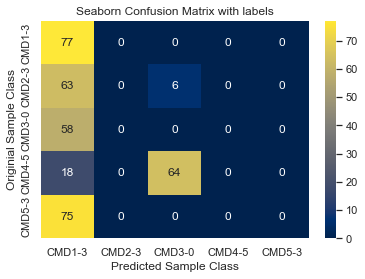

[0.7238193154335022]


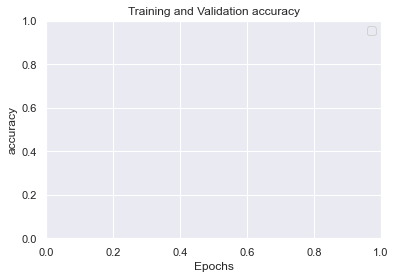

              precision    recall  f1-score   support

      CMD1-3       0.26      1.00      0.42        77
      CMD2-3       0.00      0.00      0.00        69
      CMD3-0       0.00      0.00      0.00        58
      CMD4-5       0.00      0.00      0.00        82
      CMD5-3       0.00      0.00      0.00        75

    accuracy                           0.21       361
   macro avg       0.05      0.20      0.08       361
weighted avg       0.06      0.21      0.09       361

12/12 [==============================] - 0s 7ms/step
One-vs-Rest ROC AUC scores:
0.779139 (macro),
0.794441 (weighted by prevalence)


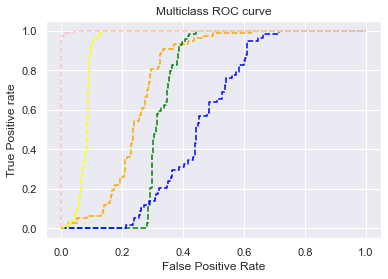

In [100]:
# labels = final_df.iloc[:,-1]
# final_df = final_df.drop(['labels'], axis = 1)
base_vectors,base_classes = get_data(7, deta, 'CM')

# Prepping data
a = prepData(base_vectors)[0]
b, lb = transform_y(base_classes)
b = b.to_numpy()

print('Shape of a: {0} and Shape of b: {1}'.format((a.shape), (b.shape)))

enc = OneHotEncoder()
enc.fit(b)
b = enc.transform(b).toarray()

b, lb = transform_y(base_classes)
b = b.to_numpy()

enc = OneHotEncoder()
enc.fit(b)
b = enc.transform(b).toarray()

# Running nn model -->
num_features = a.shape[1]
num_classes = 5 #len(np.unique(b))
model = get_model('nn', param = {'num_features':num_features, 'num_classes': num_classes})[1]
nn_model = run_nn(model, a, b, lb,batch_size = 32, epochs = 400)

In [ ]:
base_vectors,base_classes = get_data(7, deta, 'TM')

# Prepping data to be used for prediction -->
sample = prepData(base_vectors)[0]
base_classes = base_classes.iloc[:,0].apply(lambda x:x[:2])
a = prepData(base_vectors)[0]
base_classes = base_classes.apply(lambda x:x[:2])
base_classes, lb = transform_y(base_classes)
base_vectors = pd.DataFrame(base_vectors)

In [ ]:
from keras.models import load_model
nn_model.save('/models/my_model')

In [ ]:
output = nn_model.predict(sample)
output = pd.DataFrame(output, columns = ['Class 1','Class 2','Class 3','Class 4', 'Class 5'])
# output = output.rename(columns =  {'0':'Class 1 Probab', '1':'Class 1 Probab', '2':'Class 1 Probab', '3':'Class 1 Probab', '4':'Class 1 Probab'}, inplace = True)

In [ ]:
output = nn_model.predict(sample)
output = pd.DataFrame(output, columns = ['Class 1','Class 2','Class 3','Class 4', 'Class 5'])

# output = output.rename(columns =  {'0':'Class 1 Probab', '1':'Class 1 Probab', '2':'Class 1 Probab', '3':'Class 1 Probab', '4':'Class 1 Probab'}, inplace = True)

sns.set(style="darkgrid")
plt.figure(figsize = (15,8))
ax1 = sns.boxplot(data=output, linewidth = 3)


In [19]:
def allData(data = data):
    unique_samples = set([key[:2] for key in deta.keys()])
    train = pd.DataFrame()
    labels = pd.DataFrame()
    for train_sample in unique_samples:
        base_vectors,base_classes = get_data(7, deta, train_sample)
        if any(base_vectors): 
            print(base_vectors.shape)
            a = prepData(base_vectors)[0]
            base_classes = base_classes.iloc[:,0].apply(lambda x:x[:2])
            base_vectors = pd.DataFrame(base_vectors)
            base_vectors = base_vectors.reset_index(drop=True)
            train = train.reset_index(drop=True)
            train = pd.concat([train, base_vectors], axis = 0, ignore_index = True)
            labels = pd.concat([labels, base_classes], axis = 0)
    base_classes, lb = transform_y(labels)
    return train, base_classes, lb
        
dt, pt , _=allData(data)

(1285, 3000)
(1462, 3000)
(1362, 3000)
(1265, 3000)
(1356, 3000)
(1409, 3000)
(1400, 3000)
(1296, 3000)
(1292, 3000)
(1284, 3000)
(1342, 3000)


In [102]:
allData()[2]

(1315, 3000)
(1370, 3000)
(1446, 3000)
(1291, 3000)
(1373, 3000)
(1370, 3000)
(1371, 3000)
(1413, 3000)
(1417, 3000)
(1342, 3000)
(1359, 3000)


['CH', 'CL', 'CM', 'NC', 'PC', 'SH', 'SL', 'SM', 'TH', 'TL', 'TM']

In [33]:
def boxplot(model, train_sample, data = deta):
    base_vectors,base_classes = get_data(7, deta, train_sample)

    # Prepping data
    a = prepData(base_vectors)[0]
    b, lb = transform_y(base_classes)
    b = b.to_numpy()

    enc = OneHotEncoder()
    enc.fit(b)
    b = enc.transform(b).toarray()
    # Convert samples of b to [0,0,0,1] format
    
    unique_samples = set([key[:2] for key in deta.keys()])
    '''unique_samples is 'SL', 'SH', 'NC', 'PC', 'SM', 'CH', 'CL', 'TL', 'IN', 'CM', 'TM', 'TH'''
    # Remove 'IN' from unique samples
    
    # Prepping data to be used for prediction -->
    tot_data, tot_vec, _ = allData(data)
    if 'IN' in _: _.remove('IN')
    td = prepData(tot_data)[0]
    tot_vec, lab = transform_y(tot_vec)
    tot_vec = tot_vec.to_numpy()
    
    enc = OneHotEncoder()
    enc.fit(tot_vec)
    tot_vec = enc.transform(tot_vec).toarray()
    
    
    # Running nn model -->
    num_features = a.shape[1]
    num_classes = len(unique_samples)-1 #len(np.unique(b))
    print(tot_vec)
    model.load_weights('model.h5', by_name = True)
    model = get_model('nn', param = {'num_features':num_features, 'num_classes': num_classes})[1]
    nn_model = run_nn(model, tot_data, tot_vec, _,batch_size = 32, epochs = 1000)
    model.save_weights('model.h5')
    
    for sample in unique_samples:
        if sample != 'IN':
            base_vectors = get_data(7, deta, sample)[0]
            base_vectors = prepData(base_vectors)[0]
            predicted = nn_model.predict(base_vectors)
            print(f'Plot for {sample} data')
            # Plotting boxplots for each sample classification ->    
            sns.set(style="darkgrid")
            plt.figure(figsize = (25,15))
            ax1 = sns.boxplot(data=predicted, linewidth = 3)
            unique_samples.remove('IN')
            plt.title(f'Prediction for {sample}')
            tickvalues = range(0,len(x))
            ax1.set(xlabel = 'Sample Classes', ticks = tickvalues, xticks = unique_samples)
    '''
    sns.set(style="darkgrid")
    plt.figure(figsize = (15,8))
    ax1 = sns.boxplot(data=predicted, linewidth = 3)
    '''

In [99]:
boxplot(model, train_sample = 'CH', data = deta)

(1394, 3000)
(1248, 3000)
(1442, 3000)
(1225, 3000)
(1414, 3000)
(1465, 3000)
(1175, 3000)
(1320, 3000)
(1149, 3000)
(1291, 3000)
(1337, 3000)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


AttributeError: 'tuple' object has no attribute 'load_weights'

(1453, 3000)
(1295, 3000)
(1444, 3000)
(1404, 3000)
(1435, 3000)
(1396, 3000)
(1279, 3000)
(1318, 3000)
(1380, 3000)
(1354, 3000)
(1396, 3000)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-----Cross Validation 1/10-----
320/320 [==============================] - 8s 16ms/step - loss: 2.7070 - accuracy: 0.1177
-----Cross Validation 1/10-----
320/320 [==============================] - 5s 16ms/step - loss: 2.3370 - accuracy: 0.1590
-----Cross Validation 1/10-----
320/320 [==============================] - 5s 17ms/step - loss: 2.1426 - accuracy: 0.2013
-----Cross Validation 1/10-----
320/320 [==============================] - 5s 16ms/step - loss: 2.0016 - accuracy: 0.2304
-----Cross Validation 1/10-----
320/320 [==============================] - 5s 16ms/step - loss: 1.9057 - accuracy: 0.2542
-----Cross Validation 1/10-----
320/320 [==============================] - 5s 17ms/step - l

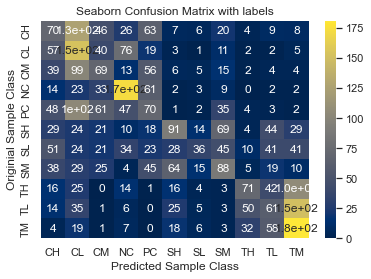

No handles with labels found to put in legend.


[0.335712194442749]


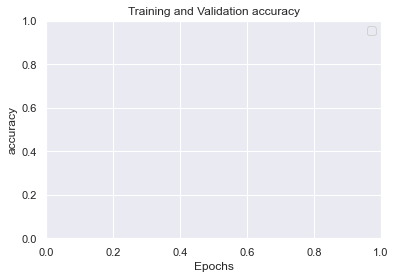

              precision    recall  f1-score   support

          CH       0.18      0.18      0.18       385
          CL       0.23      0.41      0.30       369
          CM       0.22      0.22      0.22       312
          NC       0.42      0.54      0.47       322
          PC       0.20      0.19      0.19       376
          SH       0.35      0.26      0.30       353
          SL       0.37      0.10      0.16       354
          SM       0.29      0.26      0.27       342
          TH       0.39      0.24      0.30       297
          TL       0.21      0.17      0.19       350
          TM       0.34      0.55      0.42       329

    accuracy                           0.28      3789
   macro avg       0.29      0.28      0.27      3789
weighted avg       0.29      0.28      0.27      3789

119/119 [==============================] - 1s 4ms/step
One-vs-Rest ROC AUC scores:
0.815039 (macro),
0.812534 (weighted by prevalence)


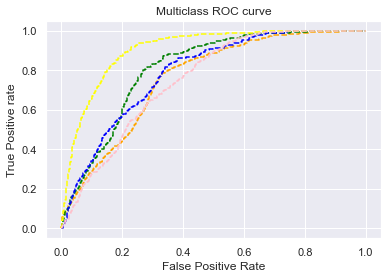

43/43 [==============================] - 0s 5ms/step
Plot for CH data


ConversionError: Failed to convert value(s) to axis units: {'CH', 'CM', 'SH', 'TL', 'PC', 'CL', 'TM', 'TH', 'SL', 'NC', 'SM'}

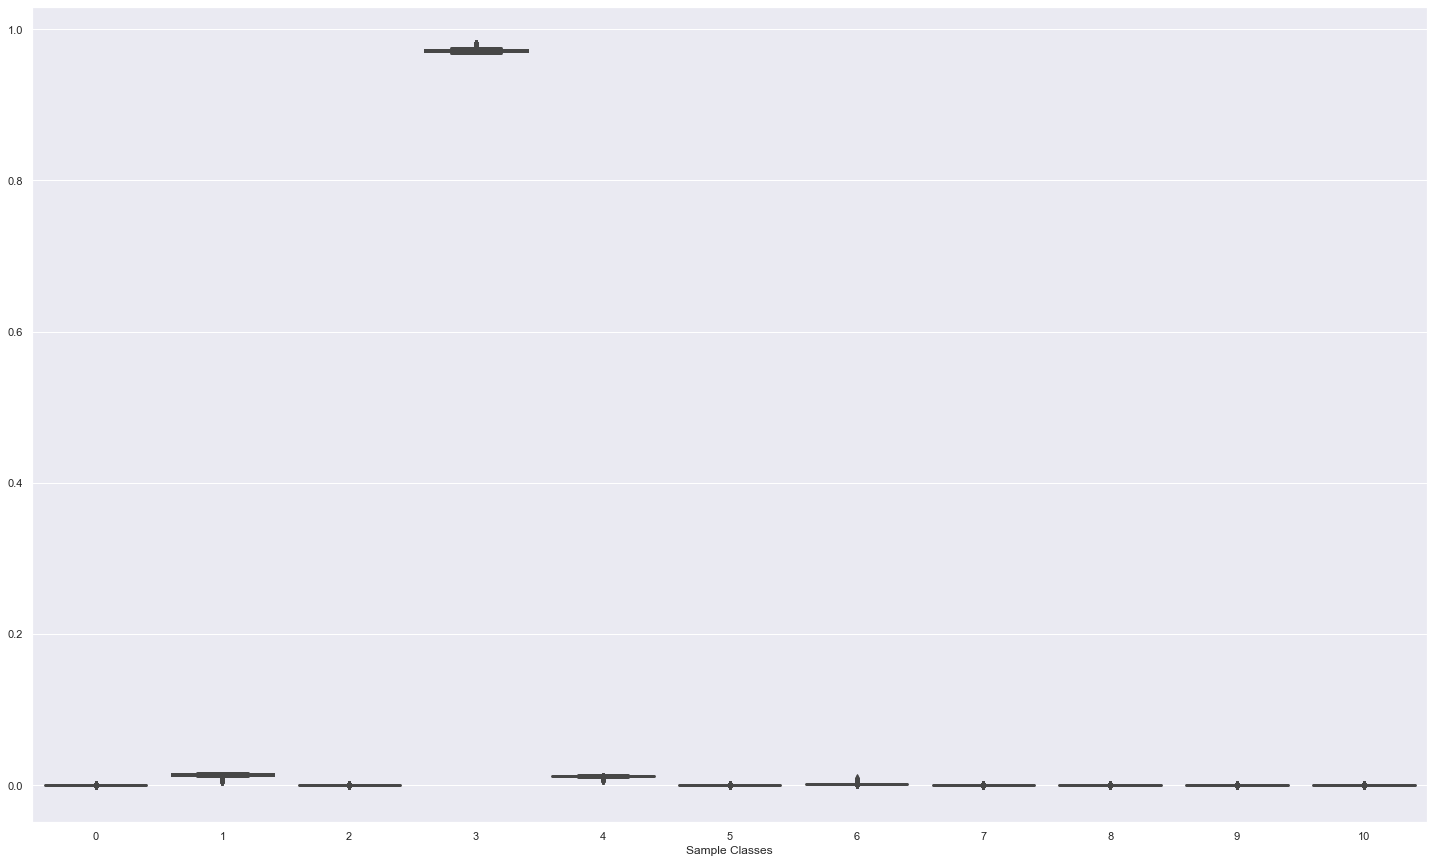

In [75]:
boxplot(model, train_sample = 'CL', data = deta)

(1448, 3000)
(1412, 3000)
(1279, 3000)
(1340, 3000)
(1276, 3000)
(1430, 3000)
(1286, 3000)
(1394, 3000)
(1199, 3000)
(1354, 3000)
(1400, 3000)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-----Cross Validation 1/10-----
313/313 [==============================] - 9s 17ms/step - loss: 2.7415 - accuracy: 0.1085
-----Cross Validation 1/10-----
313/313 [==============================] - 5s 16ms/step - loss: 2.3859 - accuracy: 0.1436
-----Cross Validation 1/10-----
313/313 [==============================] - 5s 16ms/step - loss: 2.1938 - accuracy: 0.1855
-----Cross Validation 1/10-----
313/313 [==============================] - 5s 16ms/step - loss: 2.0254 - accuracy: 0.2346
-----Cross Validation 1/10-----
313/313 [==============================] - 6s 17ms/step - loss: 1.8985 - accuracy: 0.2654
-----Cross Validation 1/10-----
313/313 [==============================] - 6s 18ms/step - l

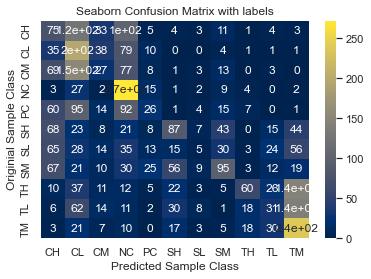

No handles with labels found to put in legend.


[0.3193361461162567]


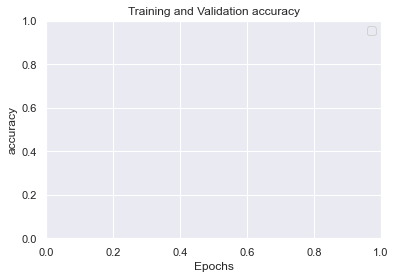

              precision    recall  f1-score   support

          CH       0.16      0.21      0.18       365
          CL       0.25      0.54      0.34       365
          CM       0.15      0.08      0.10       354
          NC       0.37      0.81      0.51       337
          PC       0.22      0.08      0.12       315
          SH       0.37      0.27      0.31       324
          SL       0.11      0.02      0.03       288
          SM       0.41      0.27      0.33       347
          TH       0.52      0.18      0.27       336
          TL       0.21      0.10      0.13       323
          TM       0.37      0.68      0.47       351

    accuracy                           0.30      3705
   macro avg       0.29      0.29      0.25      3705
weighted avg       0.29      0.30      0.26      3705

116/116 [==============================] - 1s 4ms/step
One-vs-Rest ROC AUC scores:
0.803408 (macro),
0.805035 (weighted by prevalence)


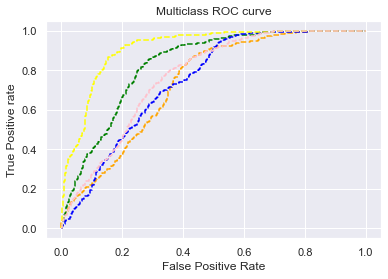

45/45 [==============================] - 0s 5ms/step
Plot for CH data


ConversionError: Failed to convert value(s) to axis units: {'CH', 'CM', 'SH', 'TL', 'PC', 'CL', 'TM', 'TH', 'SL', 'NC', 'SM'}

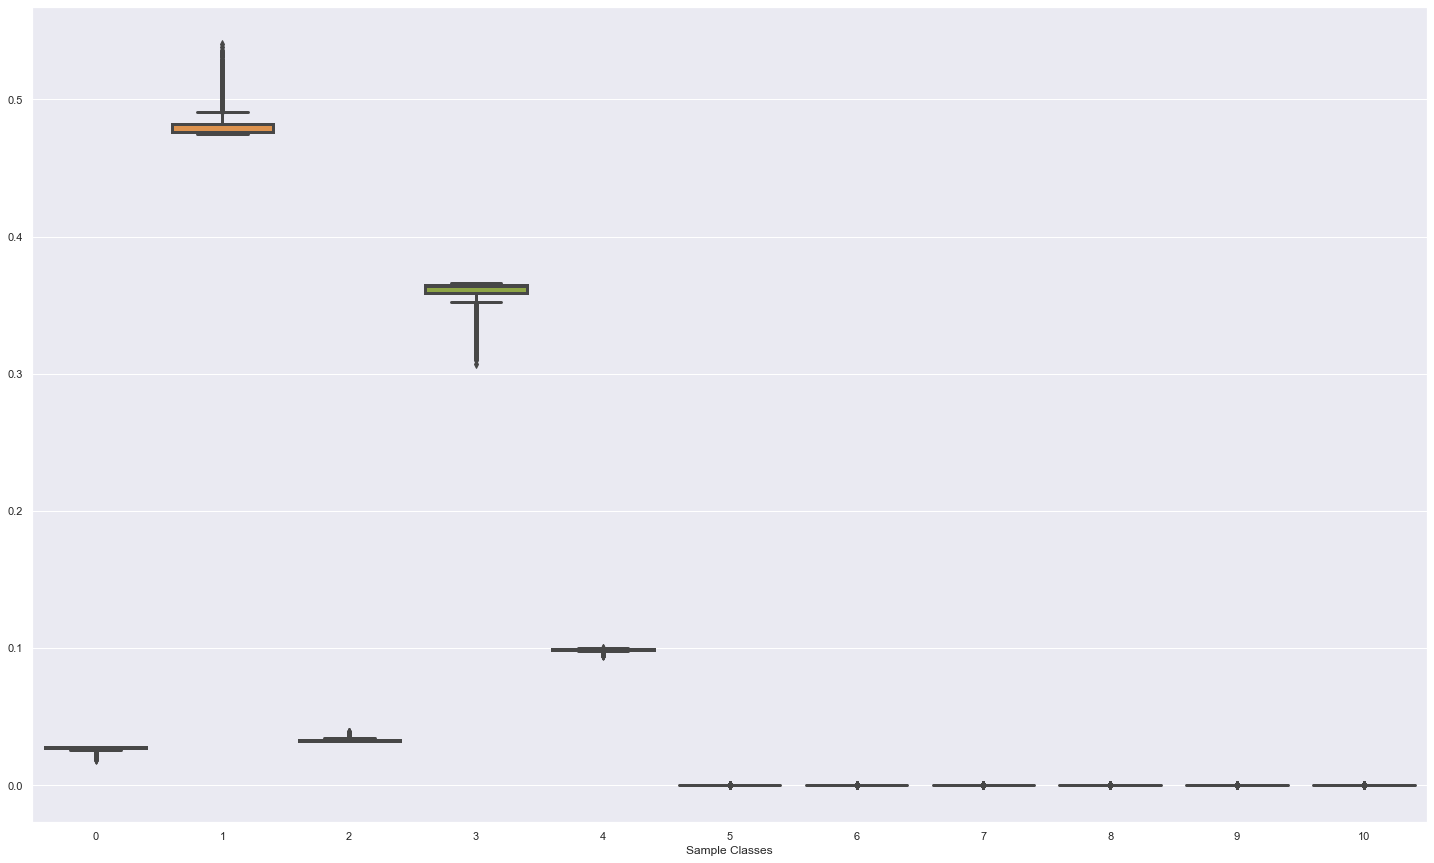

In [74]:
boxplot(model, train_sample = 'CM', data = deta)

(1255, 3000)
(1269, 3000)
(1395, 3000)
(1416, 3000)
(1366, 3000)
(1336, 3000)
(1376, 3000)
(1322, 3000)
(1315, 3000)
(1447, 3000)
(1444, 3000)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-----Cross Validation 1/10-----
316/316 [==============================] - 7s 16ms/step - loss: 2.7472 - accuracy: 0.1114
-----Cross Validation 1/10-----
316/316 [==============================] - 5s 16ms/step - loss: 2.3759 - accuracy: 0.1554
-----Cross Validation 1/10-----
316/316 [==============================] - 5s 16ms/step - loss: 2.2040 - accuracy: 0.1797
-----Cross Validation 1/10-----
316/316 [==============================] - 5s 16ms/step - loss: 2.0465 - accuracy: 0.2263
-----Cross Validation 1/10-----
316/316 [==============================] - 5s 17ms/step - loss: 1.9360 - accuracy: 0.2612
-----Cross Validation 1/10-----
316/316 [==============================] - 5s 16ms/step - l

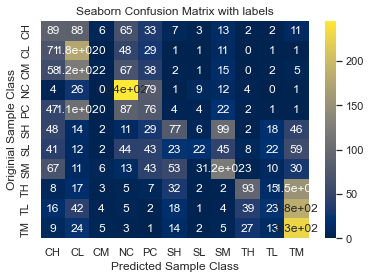

No handles with labels found to put in legend.


[0.33058997988700867]


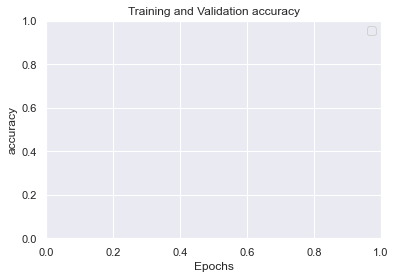

              precision    recall  f1-score   support

          CH       0.19      0.28      0.23       319
          CL       0.28      0.52      0.36       339
          CM       0.07      0.01      0.01       310
          NC       0.41      0.64      0.50       381
          PC       0.20      0.22      0.21       351
          SH       0.33      0.22      0.26       352
          SL       0.41      0.07      0.12       321
          SM       0.35      0.34      0.34       360
          TH       0.52      0.28      0.36       336
          TL       0.21      0.07      0.10       337
          TM       0.32      0.69      0.43       330

    accuracy                           0.31      3736
   macro avg       0.30      0.30      0.27      3736
weighted avg       0.30      0.31      0.27      3736

117/117 [==============================] - 1s 4ms/step
One-vs-Rest ROC AUC scores:
0.814389 (macro),
0.816362 (weighted by prevalence)


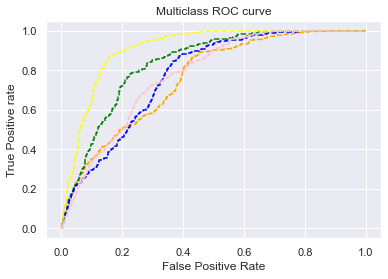

42/42 [==============================] - 0s 5ms/step
Plot for CH data


ConversionError: Failed to convert value(s) to axis units: {'CH', 'CM', 'SH', 'TL', 'PC', 'CL', 'TM', 'TH', 'SL', 'NC', 'SM'}

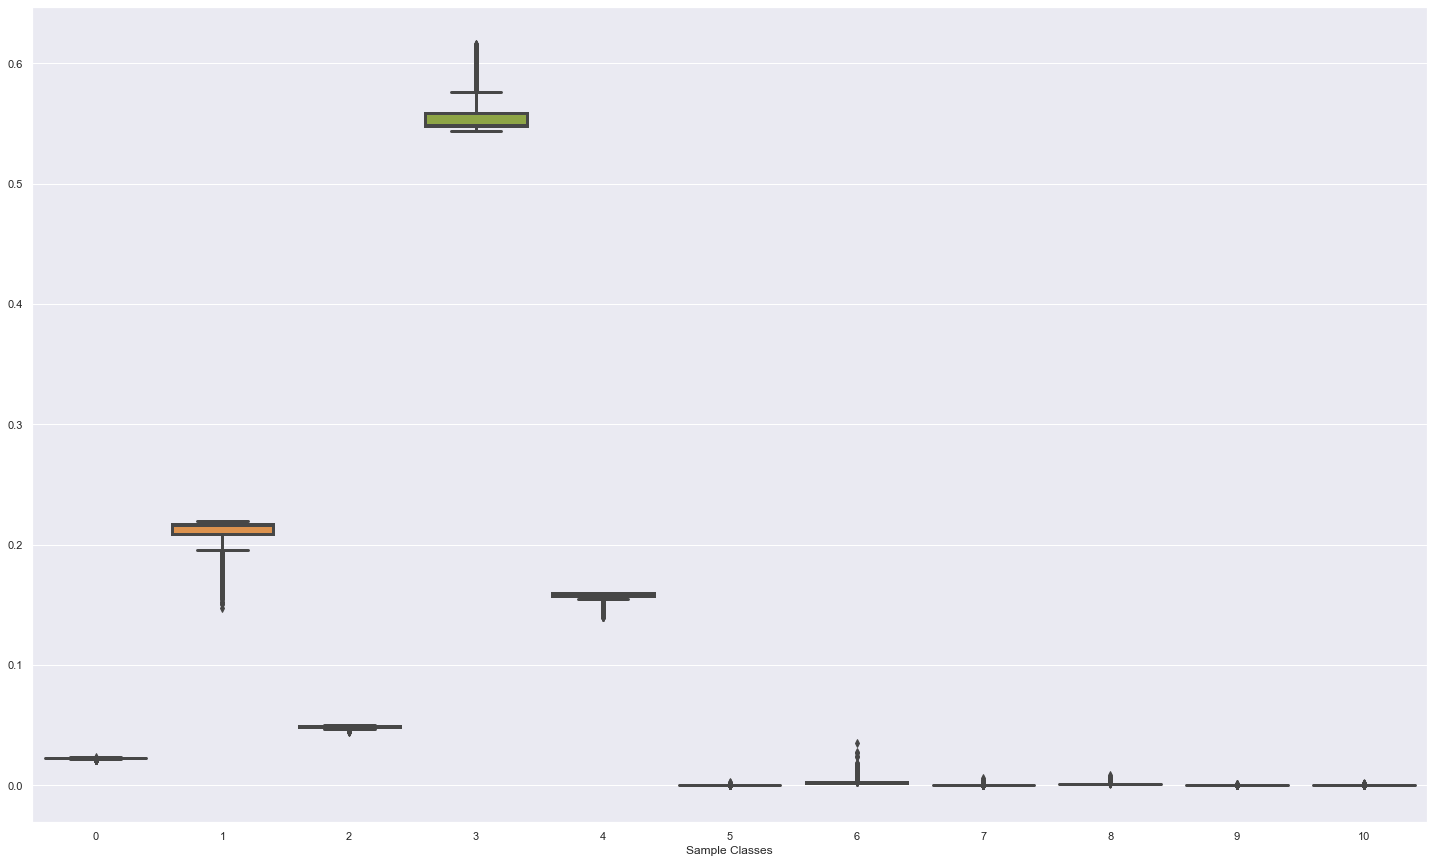

In [76]:
boxplot(model, train_sample = 'SL', data = deta)

(1176, 3000)
(1404, 3000)
(1395, 3000)
(1440, 3000)
(1330, 3000)
(1394, 3000)
(1358, 3000)
(1364, 3000)
(1446, 3000)
(1355, 3000)
(1417, 3000)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
-----Cross Validation 1/10-----
319/319 [==============================] - 12s 18ms/step - loss: 2.7342 - accuracy: 0.1111
-----Cross Validation 1/10-----
319/319 [==============================] - 5s 16ms/step - loss: 2.3790 - accuracy: 0.1515
-----Cross Validation 1/10-----
319/319 [==============================] - 6s 18ms/step - loss: 2.2124 - accuracy: 0.1874
-----Cross Validation 1/10-----
319/319 [==============================] - 6s 19ms/step - loss: 2.0577 - accuracy: 0.2203
-----Cross Validation 1/10-----
319/319 [==============================] - 6s 18ms/step - loss: 1.9393 - accuracy: 0.2496
-----Cross Validation 1/10-----
319/319 [==============================] - 6s 19ms/step - 

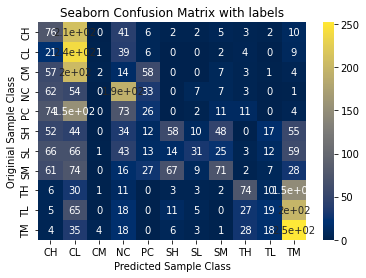

[0.3318597078323364]


No handles with labels found to put in legend.


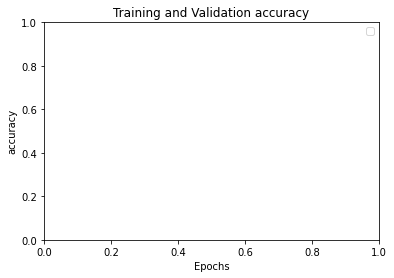

              precision    recall  f1-score   support

          CH       0.16      0.21      0.18       357
          CL       0.20      0.75      0.32       322
          CM       0.22      0.01      0.01       350
          NC       0.38      0.53      0.45       359
          PC       0.14      0.07      0.10       354
          SH       0.36      0.18      0.24       330
          SL       0.43      0.09      0.15       333
          SM       0.40      0.20      0.26       362
          TH       0.47      0.26      0.33       286
          TL       0.22      0.05      0.09       348
          TM       0.33      0.68      0.44       369

    accuracy                           0.28      3770
   macro avg       0.30      0.28      0.23      3770
weighted avg       0.30      0.28      0.23      3770

118/118 [==============================] - 1s 6ms/step
One-vs-Rest ROC AUC scores:
0.803722 (macro),
0.803526 (weighted by prevalence)


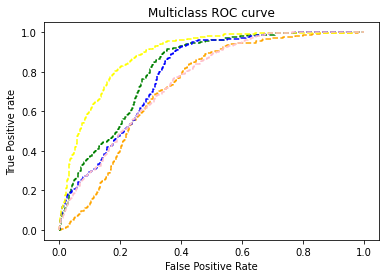

35/35 [==============================] - 0s 7ms/step
Plot for TH data


ConversionError: Failed to convert value(s) to axis units: {'TH', 'TL', 'CM', 'CH', 'SL', 'NC', 'CL', 'SH', 'SM', 'PC', 'TM'}

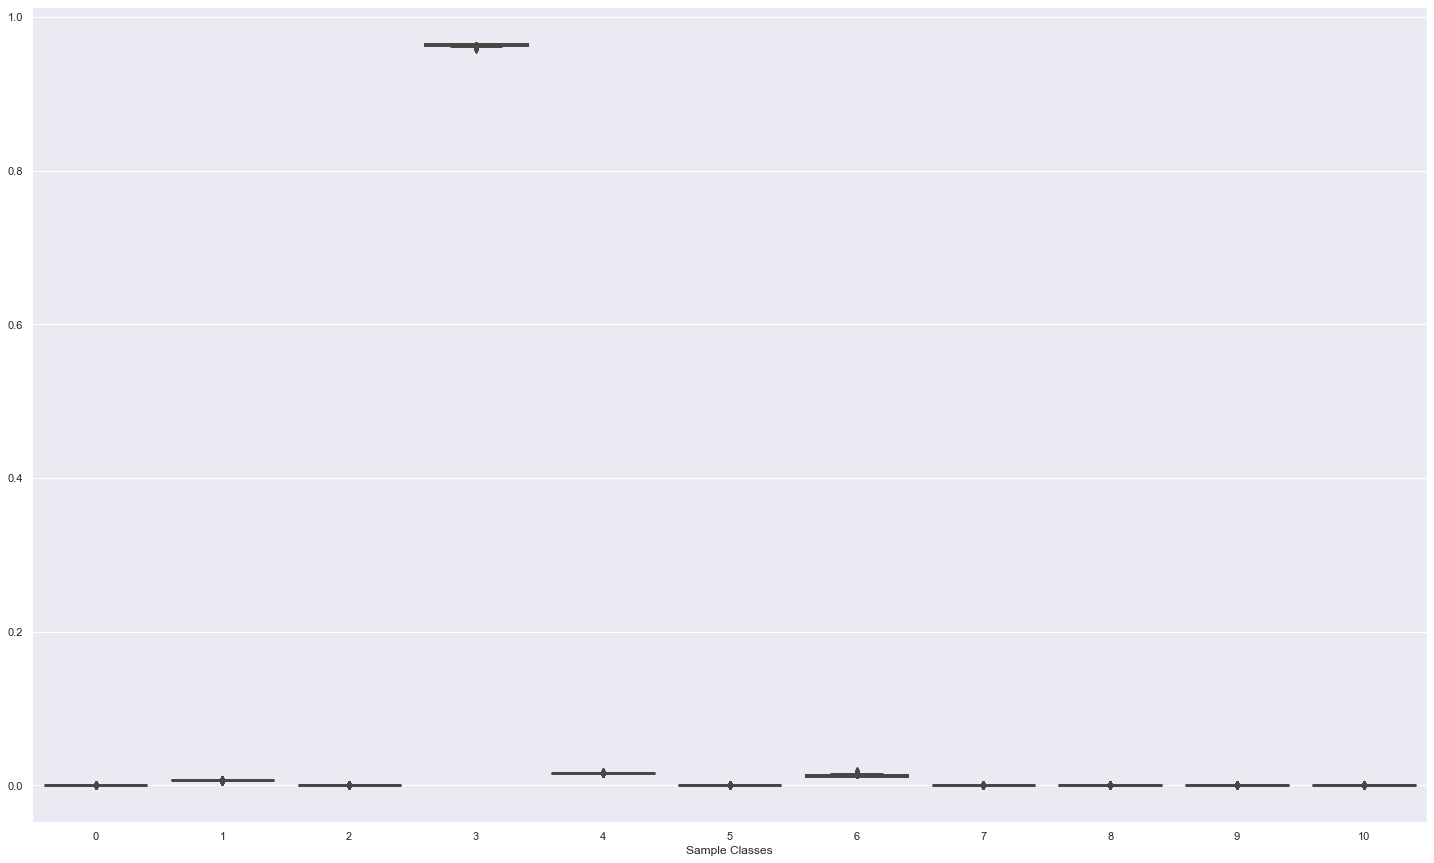

In [21]:
boxplot(model, train_sample = 'SH', data = deta)

(1170, 3000)
(1311, 3000)
(1321, 3000)
(1430, 3000)
(1342, 3000)
(1337, 3000)
(1324, 3000)
(1419, 3000)
(1448, 3000)
(1443, 3000)
(983, 3000)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
-----Cross Validation 1/10-----
307/307 [==============================] - 8s 17ms/step - loss: 2.7016 - accuracy: 0.1144
-----Cross Validation 1/10-----
307/307 [==============================] - 7s 18ms/step - loss: 2.3691 - accuracy: 0.1459
-----Cross Validation 1/10-----
307/307 [==============================] - 7s 19ms/step - loss: 2.1868 - accuracy: 0.1954
-----Cross Validation 1/10-----
307/307 [==============================] - 5s 16ms/step - loss: 2.0195 - accuracy: 0.2290
-----Cross Validation 1/10-----
307/307 [==============================] - 5s 16ms/step - loss: 1.9197 - accuracy: 0.2591
-----Cross Validation 1/10-----
307/307 [==============================] - 5s 16ms/step - lo

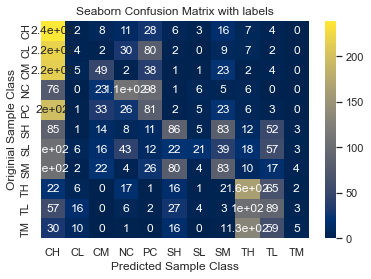

No handles with labels found to put in legend.


[0.3411848545074463]


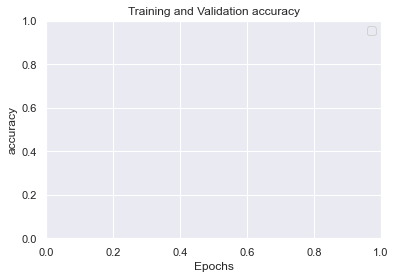

              precision    recall  f1-score   support

          CH       0.18      0.74      0.29       324
          CL       0.08      0.01      0.02       356
          CM       0.29      0.14      0.19       340
          NC       0.42      0.33      0.37       323
          PC       0.21      0.21      0.21       377
          SH       0.33      0.24      0.28       360
          SL       0.42      0.06      0.11       340
          SM       0.29      0.23      0.26       355
          TH       0.35      0.55      0.43       295
          TL       0.25      0.29      0.27       310
          TM       0.25      0.02      0.04       252

    accuracy                           0.26      3632
   macro avg       0.28      0.26      0.22      3632
weighted avg       0.28      0.26      0.22      3632

114/114 [==============================] - 1s 4ms/step
One-vs-Rest ROC AUC scores:
0.808319 (macro),
0.804492 (weighted by prevalence)


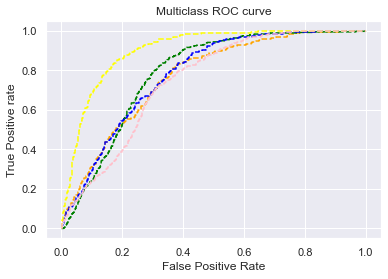

40/40 [==============================] - 0s 5ms/step
Plot for TH data


ConversionError: Failed to convert value(s) to axis units: {'TH', 'TL', 'CM', 'CH', 'SL', 'NC', 'CL', 'SH', 'SM', 'PC', 'TM'}

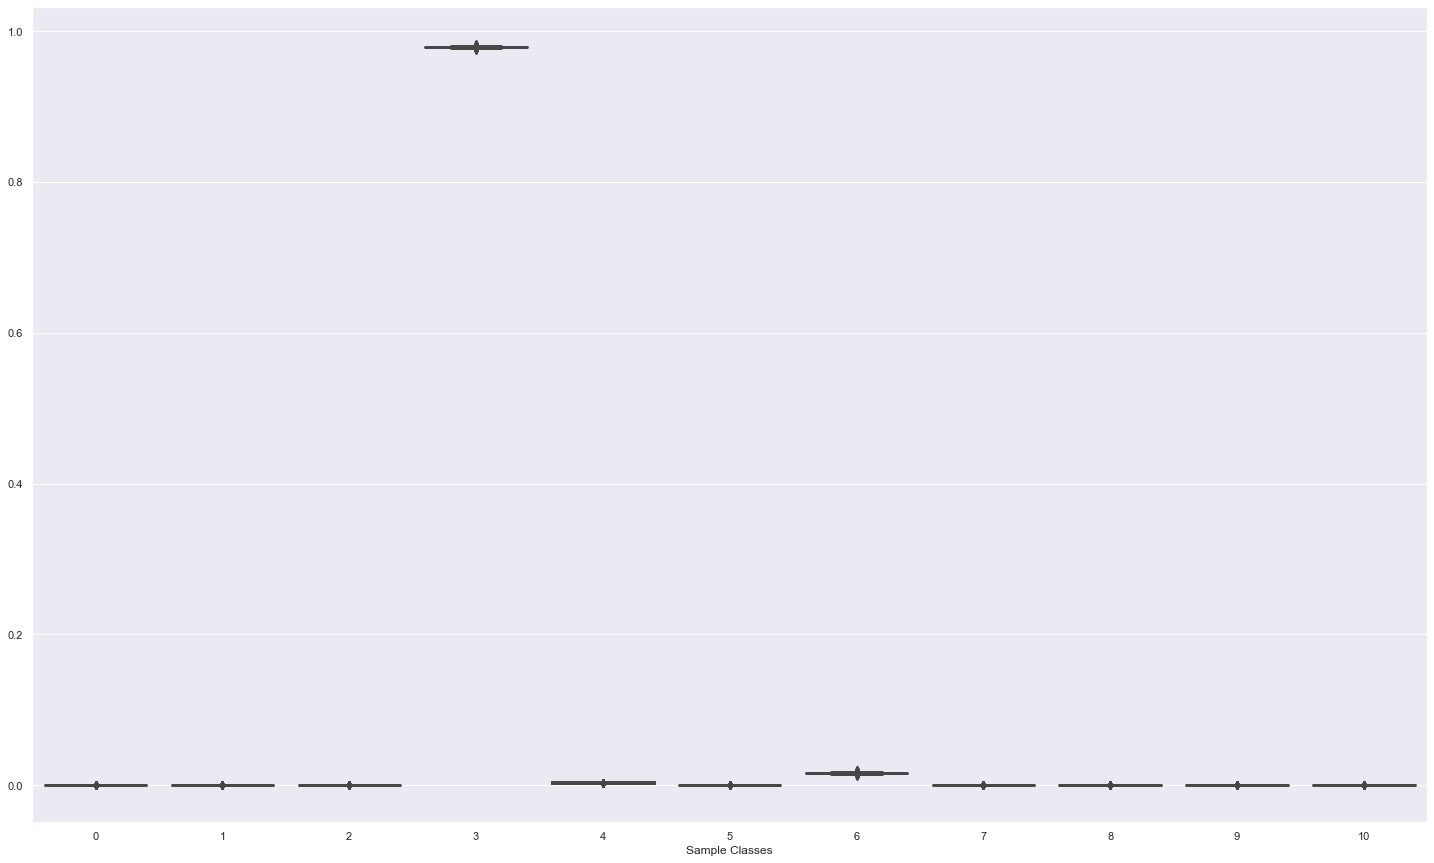

In [25]:
boxplot(model, train_sample = 'SM', data = deta)

(1293, 3000)
(1398, 3000)
(1104, 3000)
(1394, 3000)
(1238, 3000)
(1401, 3000)
(1468, 3000)
(1436, 3000)
(1344, 3000)
(1418, 3000)
(1390, 3000)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
-----Cross Validation 1/10-----
314/314 [==============================] - 8s 16ms/step - loss: 2.7481 - accuracy: 0.1209
-----Cross Validation 1/10-----
314/314 [==============================] - 5s 16ms/step - loss: 2.3583 - accuracy: 0.1535
-----Cross Validation 1/10-----
314/314 [==============================] - 5s 16ms/step - loss: 2.1677 - accuracy: 0.1929
-----Cross Validation 1/10-----
314/314 [==============================] - 5s 16ms/step - loss: 2.0239 - accuracy: 0.2308
-----Cross Validation 1/10-----
314/314 [==============================] - 5s 15ms/step - loss: 1.9178 - accuracy: 0.2631
-----Cross Validation 1/10-----
314/314 [==============================] - 5s 16ms/step - l

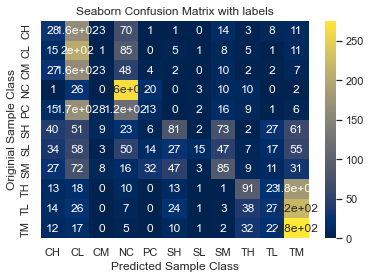

No handles with labels found to put in legend.


[0.3445804715156555]


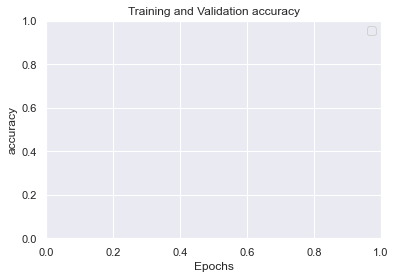

              precision    recall  f1-score   support

          CH       0.12      0.09      0.11       301
          CL       0.21      0.61      0.31       336
          CM       0.09      0.01      0.02       266
          NC       0.38      0.79      0.51       337
          PC       0.14      0.04      0.06       353
          SH       0.39      0.22      0.28       375
          SL       0.52      0.05      0.08       327
          SM       0.32      0.25      0.28       341
          TH       0.44      0.26      0.33       349
          TL       0.19      0.07      0.11       360
          TM       0.32      0.73      0.45       376

    accuracy                           0.29      3721
   macro avg       0.28      0.28      0.23      3721
weighted avg       0.29      0.29      0.24      3721

117/117 [==============================] - 1s 5ms/step
One-vs-Rest ROC AUC scores:
0.803400 (macro),
0.805925 (weighted by prevalence)


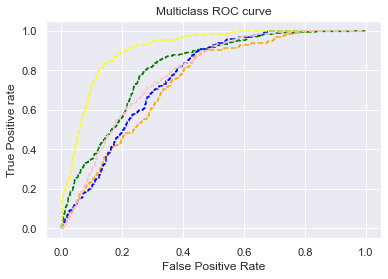

42/42 [==============================] - 0s 4ms/step
Plot for TH data


ConversionError: Failed to convert value(s) to axis units: {'TH', 'TL', 'CM', 'CH', 'SL', 'NC', 'CL', 'SH', 'SM', 'PC', 'TM'}

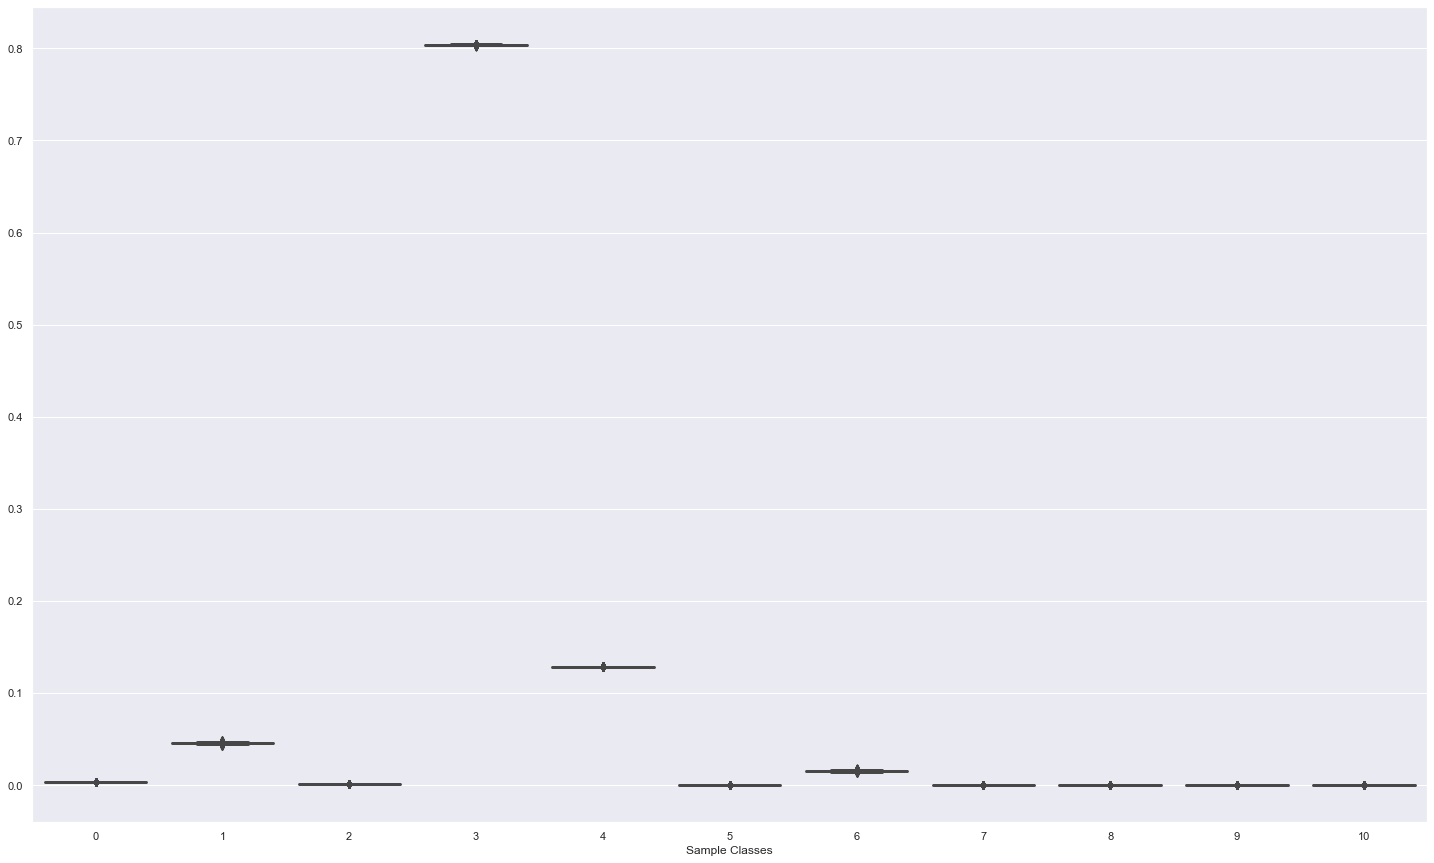

In [26]:
boxplot(model, train_sample = 'TL', data = deta)

(1366, 3000)
(1217, 3000)
(1456, 3000)
(1205, 3000)
(1288, 3000)
(1257, 3000)
(1305, 3000)
(1446, 3000)
(1410, 3000)
(1432, 3000)
(1452, 3000)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
-----Cross Validation 1/10-----
313/313 [==============================] - 36s 18ms/step - loss: 2.7010 - accuracy: 0.1093
-----Cross Validation 1/10-----
313/313 [==============================] - 5s 16ms/step - loss: 2.3477 - accuracy: 0.1493
-----Cross Validation 1/10-----
313/313 [==============================] - 5s 17ms/step - loss: 2.1672 - accuracy: 0.1883
-----Cross Validation 1/10-----
313/313 [==============================] - 6s 18ms/step - loss: 1.9914 - accuracy: 0.2380
-----Cross Validation 1/10-----
313/313 [==============================] - 5s 17ms/step - loss: 1.8947 - accuracy: 0.2719
-----Cross Validation 1/10-----
313/313 [==============================] - 6s 20ms/step - 

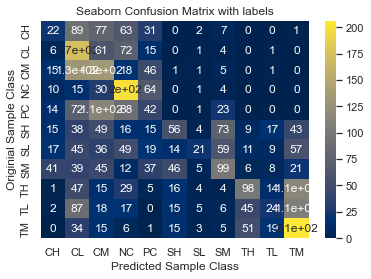

No handles with labels found to put in legend.


[0.3519424796104431]


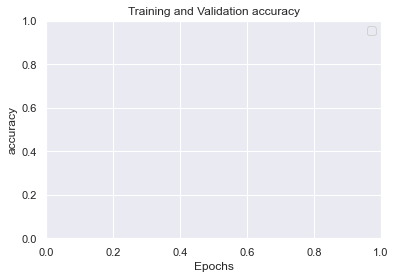

              precision    recall  f1-score   support

          CH       0.15      0.08      0.10       292
          CL       0.22      0.52      0.31       331
          CM       0.23      0.38      0.28       352
          NC       0.35      0.62      0.45       323
          PC       0.15      0.12      0.13       353
          SH       0.34      0.17      0.22       335
          SL       0.44      0.06      0.11       337
          SM       0.34      0.28      0.31       359
          TH       0.45      0.28      0.35       347
          TL       0.26      0.07      0.11       325
          TM       0.38      0.58      0.46       355

    accuracy                           0.29      3709
   macro avg       0.30      0.29      0.26      3709
weighted avg       0.30      0.29      0.26      3709

116/116 [==============================] - 1s 5ms/step
One-vs-Rest ROC AUC scores:
0.811382 (macro),
0.811433 (weighted by prevalence)


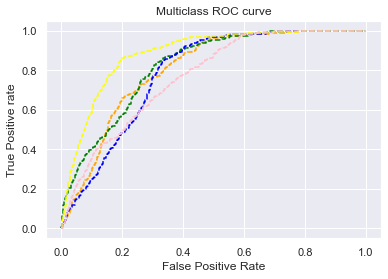

43/43 [==============================] - 0s 5ms/step
Plot for TH data


ConversionError: Failed to convert value(s) to axis units: {'TH', 'TL', 'CM', 'CH', 'SL', 'NC', 'CL', 'SH', 'SM', 'PC', 'TM'}

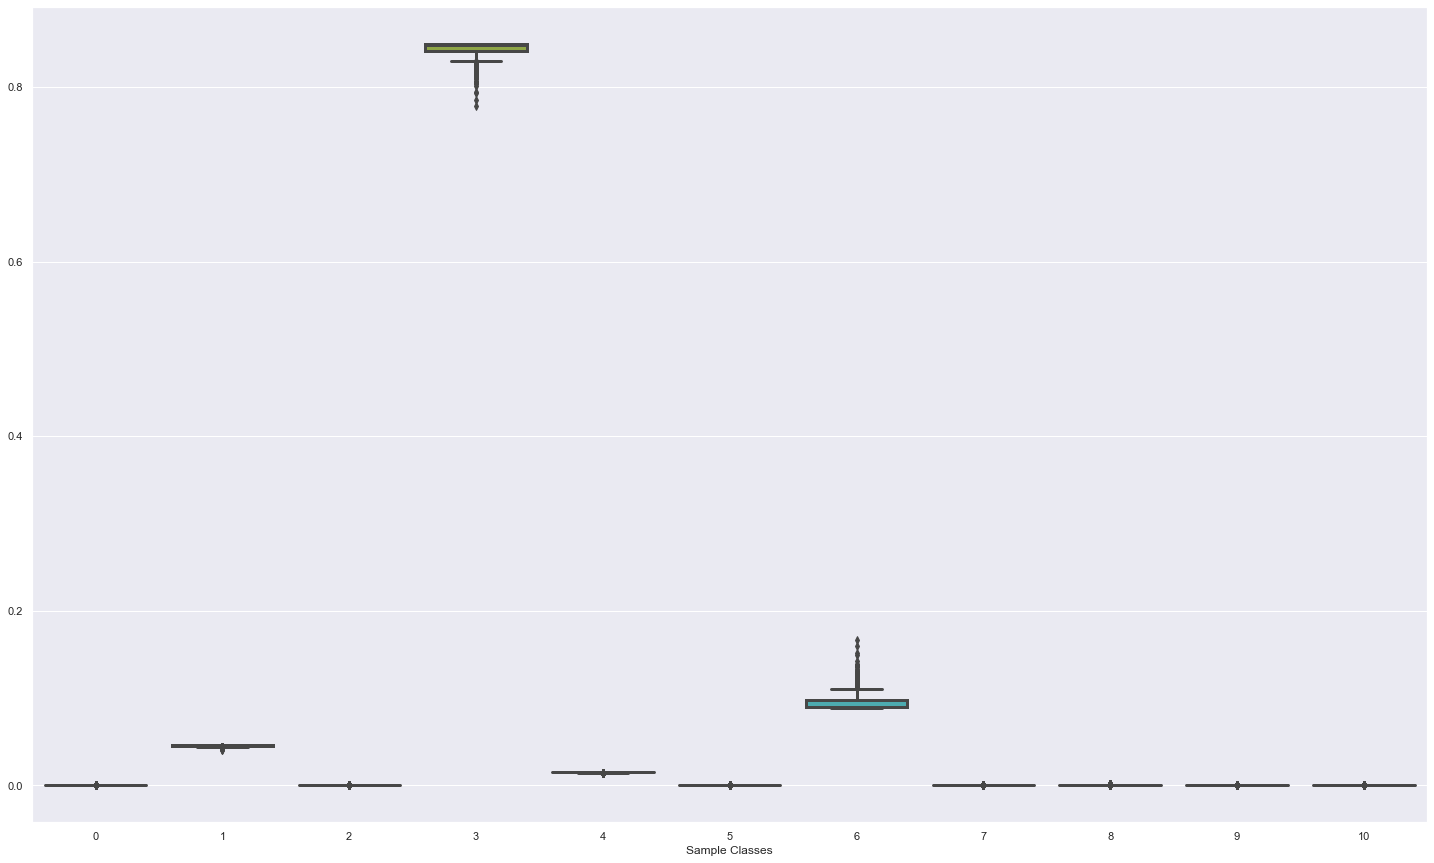

In [27]:
boxplot(model, train_sample = 'TM', data = deta)

(1094, 3000)
(1322, 3000)
(1235, 3000)
(1459, 3000)
(1427, 3000)
(1463, 3000)
(1394, 3000)
(1286, 3000)
(1420, 3000)
(1436, 3000)
(1242, 3000)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
-----Cross Validation 1/10-----
312/312 [==============================] - 8s 16ms/step - loss: 2.7408 - accuracy: 0.1132
-----Cross Validation 1/10-----
312/312 [==============================] - 5s 16ms/step - loss: 2.3617 - accuracy: 0.1460
-----Cross Validation 1/10-----
312/312 [==============================] - 7s 22ms/step - loss: 2.1859 - accuracy: 0.1926
-----Cross Validation 1/10-----
312/312 [==============================] - 7s 22ms/step - loss: 2.0317 - accuracy: 0.2243
-----Cross Validation 1/10-----
312/312 [==============================] - 7s 21ms/step - loss: 1.9119 - accuracy: 0.2630
-----Cross Validation 1/10-----
312/312 [==============================] - 7s 20ms/step - l

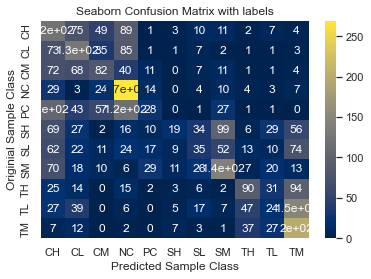

[0.3391478657722473]


No handles with labels found to put in legend.


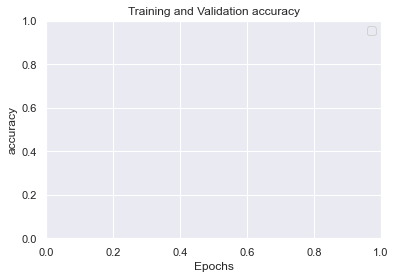

              precision    recall  f1-score   support

          CH       0.18      0.32      0.23       371
          CL       0.29      0.38      0.33       338
          CM       0.30      0.28      0.29       297
          NC       0.40      0.73      0.52       367
          PC       0.25      0.07      0.11       379
          SH       0.33      0.05      0.09       367
          SL       0.23      0.11      0.15       329
          SM       0.39      0.40      0.39       351
          TH       0.43      0.32      0.37       282
          TL       0.16      0.08      0.10       319
          TM       0.33      0.67      0.44       295

    accuracy                           0.31      3695
   macro avg       0.30      0.31      0.28      3695
weighted avg       0.30      0.31      0.27      3695

116/116 [==============================] - 1s 5ms/step
One-vs-Rest ROC AUC scores:
0.817748 (macro),
0.816157 (weighted by prevalence)


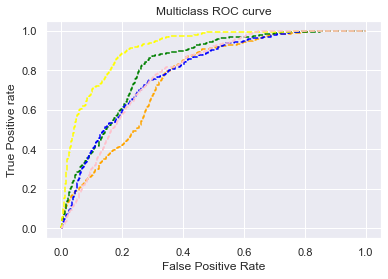

41/41 [==============================] - 0s 5ms/step
Plot for TH data


ConversionError: Failed to convert value(s) to axis units: {'TH', 'TL', 'CM', 'CH', 'SL', 'NC', 'CL', 'SH', 'SM', 'PC', 'TM'}

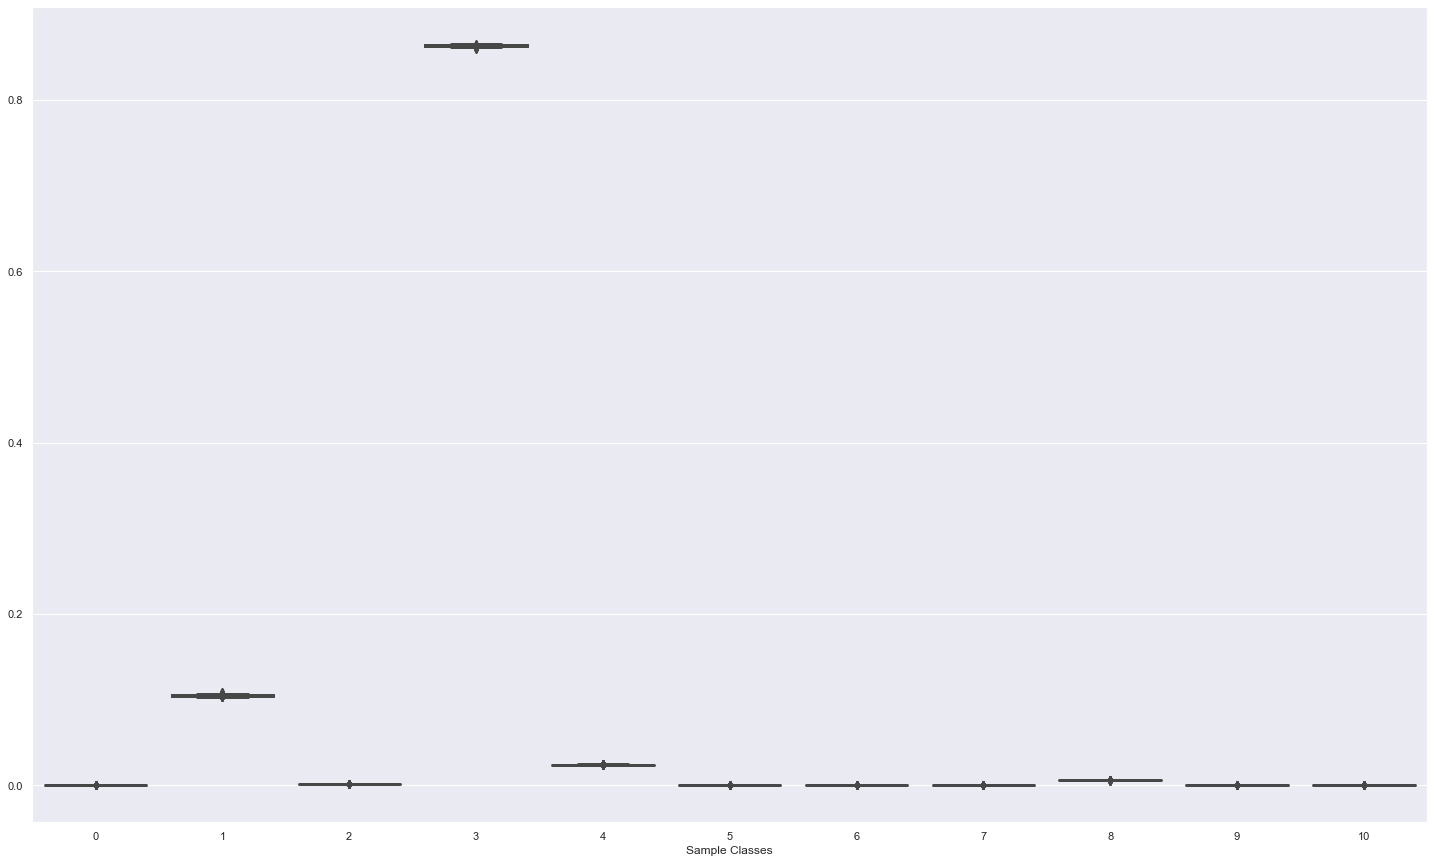

In [28]:
boxplot(model, train_sample = 'TH', data = deta)

## Accuracy of different ML algorithms over different data samples :

In [19]:
for i in Classification: print(i)

svm
randomForestClassifier
naiveBayes
gbm
xgb
nn
LassoRegression
dTree
LogisticRegression


In [20]:
unique_samples = set([key[:2] for key in deta.keys()])
print(unique_samples)

{'SM', 'NC', 'SL', 'TL', 'CH', 'TH', 'CL', 'TM', 'IN', 'PC', 'CM', 'SH'}


### IntraCluster Analysis

In [30]:
def classify(sample , data, alg):
        print('Classifying {0} using {1} -->\n'.format(sample, alg))
        base_vectors,base_classes = get_data(7, deta, sample)
        # Prepping data
        a = prepData(base_vectors)[0]
        b, lb = transform_y(base_classes)
        b = b.to_numpy()

        model = get_model(alg)
        run_cv(model[1], a, b, lb, model[0])
        

In [ ]:

# {'SM', 'SH', 'SL', 'CM', 'PC', 'TM', 'NC', 'TL', 'TH', 'CL', 'IN', 'CH'}
'''
svm
randomForestClassifier
naiveBayes
gbm
xgb
nn
LassoRegression
dTree
LogisticRegression
'''
print('Classifying for Sample: ', 'SH')

classify('CH', deta, 'svm')
#classify('SH', deta, 'randomForestClassifier')
#classify('SH', deta, 'naiveBayes')
#classify('SH', deta, 'gbm')
#classify('SH', deta, 'xgb')
#classify('SH', deta, 'LassoRegression')
#classify('SH', deta, 'dTree')
#classify('SH', deta, 'LogisticRegression')

In [50]:
classify('SH', deta, 'randomForestClassifier')

Classifying SH using randomForestClassifier -->


1 of kfold 5


KeyboardInterrupt: 

In [ ]:
classify('PC', deta, '')

### Intracluster Classificaton

In [58]:
for alg in Classification:
    if alg != 'nn':
        base_vectors, base_classes, _ = allData()

        # Prepping data
        a = prepData(base_vectors)[0]
        b, lb = transform_y(base_classes)
        b = b.to_numpy()
        
        model = get_model(alg)
        
        run_cv(model[1], a, base_classes, _, model[0])
    

KeyboardInterrupt: 

In [34]:
print('Classifying {0} using {1} -->\n')
        
dt, pt , _=allData(data)
# base_vectors,base_classes = get_data(7, deta, 'CM')
print(dt, pt, _)
# print(base_classes, base_vectors)
# Prepping data
base_vectors = dt
a = prepData(base_vectors)[0]
# b, lb = transform_y(base_classes)
b = pt
b = b.to_numpy()

#model = get_model('svm')
#run_cv(model[1], a, b, lb, model[0])

Classifying {0} using {1} -->

(1279, 3000)
(1092, 3000)
(1464, 3000)
(1432, 3000)
(1355, 3000)
(1375, 3000)
(1397, 3000)
(1303, 3000)
(1255, 3000)
(1330, 3000)
(1216, 3000)
              0            1           2           3            4     \
0       144.800003   801.900024   56.680000   61.600002   850.410034   
1       687.200012  1088.010010  188.570007  101.599998   835.559998   
2       347.200012   702.900024  107.910004   60.000000   516.780029   
3       249.600006   481.140015   95.920006   54.400002   395.010010   
4       169.600006   651.419983  131.889999  275.200012   605.880005   
...            ...          ...         ...         ...          ...   
14493  1041.599976   625.679993   73.029999  202.400009   440.550018   
14494   925.600037   838.530029  -61.040001  275.200012  1440.450073   
14495   682.400024   560.340027   59.950001  412.000000   470.250000   
14496   831.200012   437.580017   82.840004  910.400024  1064.250000   
14497   425.600006   872.190002   

In [94]:
lb = _

model = get_model('randomForestClassifier')

In [98]:
_

['CH', 'CL', 'CM', 'NC', 'PC', 'SH', 'SL', 'SM', 'TH', 'TL', 'TM']

In [96]:

run_cv(model[1], a, b, lb, model[0])


1 of kfold 2



KeyboardInterrupt



In [ ]:
# Intracluster classification using randomforest

base_vectors,base_classes = get_data(7, deta, sample)
# Prepping data
a = prepData(base_vectors)[0]
b, lb = transform_y(base_classes)
b = b.to_numpy()

model = get_model(alg)
run_cv(model[1], a, b, lb, model[0])

## Testing of DL Model - 3

In [124]:
# Library Import

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from joblib import dump, load
import pandas as pd
import numpy as np

In [126]:
# labels = final_df.iloc[:,-1]
# final_df = final_df.drop(['labels'], axis = 1)
base_vectors,base_classes = get_data(7, deta, 'PC')

# Prepping data
a = prepData(base_vectors)[0]
b, lb = transform_y(base_classes)
b = b.to_numpy()

# One hot encoding label classes
enc = OneHotEncoder()
enc.fit(b)
b = enc.transform(b).toarray()

print('Shape of a: {0} and Shape of b: {1}'.format((a.shape), (b.shape)))

Shape of a: (1330, 3000) and Shape of b: (1330, 5)


In [136]:
deta.keys()

dict_keys(['CHD1', 'CHD2', 'CHD3', 'CHD4', 'CHD5', 'CLD1', 'CLD2', 'CLD3', 'CLD4', 'CLD5', 'CMD1', 'CMD2', 'CMD3', 'CMD4', 'CMD5', 'IND0', 'NCD1', 'NCD2', 'NCD3', 'NCD4', 'NCD5', 'PCD1', 'PCD2', 'PCD3', 'PCD4', 'PCD5', 'SHD1', 'SHD2', 'SHD3', 'SHD4', 'SHD5', 'SLD1', 'SLD2', 'SLD3', 'SLD4', 'SLD5', 'SMD1', 'SMD2', 'SMD3', 'SMD4', 'SMD5', 'THD1', 'THD2', 'THD3', 'THD4', 'THD5', 'TLD1', 'TLD2', 'TLD3', 'TLD4', 'TLD5', 'TMD1', 'TMD2', 'TMD3', 'TMD4', 'TMD5'])

In [139]:
unique_samples = set([key[:2] for key in deta.keys()])
print(unique_samples)

{'SL', 'SH', 'NC', 'PC', 'SM', 'CH', 'CL', 'TL', 'IN', 'CM', 'TM', 'TH'}


In [ ]:
'''
Function to display predictive probabilities of classification for different samples when trained on a particular sample data
def probab(model, train, test):
    train_sample = 
    test_samples = 
    
[[probab(model, train, test) for test in unique_samples] for train in unique_samples]
'''

# Testing of DL Model - 1 

In [ ]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
 
# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=100)
        # make a prediction on the test set
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        # store result
        print('>%.3f' % acc)
        results.append(acc)
    return results
 
# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))..................................

## Testing of DL Model - 2

In [42]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
 
    
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=3000, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, a, b, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 27.12% (3.66%)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

# Training a autoencoder

In [60]:
df_, l = get_data(7, deta, 'PC')

In [ ]:
final_df = StandardScaler().fit_transform(df_)
lbs = LabelEncoder().fit_transform(l)

In [ ]:
# Training an Autoencoder for anomaly detection

# Using compressive encoding via autoencoder
# Training an autoencoder-->

# Scaling the data to make it suitable for the auto-encoder
X_scaled = MinMaxScaler().fit_transform(final_df)


# Building the Input Layer
input_layer = Input(shape =(final_df.shape[1], ))
  
# Building the Encoder network
encoded = Dense(0, activation ='relu',
                activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation ='relu',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='relu',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='relu',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(, activation ='relu')(encoded)
  
# Building the Decoder network
decoded = Dense(12, activation ='relu')(encoded)
decoded = Dense(25, activation ='relu')(decoded)
decoded = Dense(50, activation ='relu')(decoded)
decoded = Dense(100, activation ='relu')(decoded)
decoded = Dense(200, activation ='relu')(decoded)
decoded = Dense(1000, activation ='relu')(decoded)
  
# Building the Output Layer
output_layer = Dense(final_df.shape[1], activation ='relu')(decoded)


# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adam", loss ="mae", metrics = 'accuracy')
  
# Training the Auto-encoder network
autoencoder.fit(X_scaled, X_scaled, 
                batch_size = 16, epochs = 1000, 
                shuffle = True, validation_data = (final_df, final_df))

hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])

In [40]:
# Autoencoder P2 -->

df = hidden_representation.predict(X_scaled)
mse = np.mean(np.power(df - final_df, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse})

45/45 [==============================] - 0s 912us/step


,Reconstruction_error
0,0.112431
1,0.099816
2,0.150999
3,0.132934
4,0.156797
...,...
1435,0.129072
1436,0.130764
1437,0.134707
1438,0.142126


In [140]:
final_df

array([[-0.05057386,  0.70546526,  0.4717596 , ..., -0.5412113 ,
        -0.44630507,  0.86211383],
       [ 0.05081545,  0.70257443,  0.44101545, ..., -0.62394506,
        -0.3952314 ,  0.8946018 ],
       [-0.03810772,  0.6769634 ,  0.5348599 , ..., -0.5183734 ,
        -0.4212776 ,  0.8275243 ],
       ...,
       [-0.03057418,  0.69563323,  0.49732915, ..., -0.5346057 ,
        -0.46065843,  0.86639726],
       [-0.05255631,  0.7169135 ,  0.5294302 , ..., -0.53417754,
        -0.450874  ,  0.8701344 ],
       [-0.01537817,  0.71921563,  0.47633153, ..., -0.52981   ,
        -0.45182133,  0.885187  ]], dtype=float32)

# Logistic Regression

In [23]:
# Using Logistic Regression for Multi-Class Classification ->

# When logistic regression is used for multi-class classification, it basically uses binary classification multiple times with a multinomial probability distribution as it is not made for multi-class classification
# So called One vs Rest approach is used in such classification

from statistics import mean, stdev
def logistic_regression(x, y):
  # defined the multinomial logistic regression model
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate the model and collect the scores
  n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # report the model performance
  # print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), stdev(n_scores)))
  return model, n_scores

# df_, l = total_data(8, deta, 'PC')
# logistic_regression(df_, l)

# Lasso Regression

In [70]:
# Lasso Regression

def lasso(X, Y):
    def MAPE(Y_actual , Y_predicted):
        return np.mean(np.abs(Y_actual-Y_predicted))*100/np.mean(Y_actual)
    if Y[0] is not int:
        Y = LabelEncoder().fit_transform(Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y, train_size = 0.75)
    lasso_model = Lasso(alpha=1.0)
    lasso=lasso_model.fit(X_train , Y_train)
    lasso_predict = [round(i) for i in lasso.predict(X_test)]
    print(Y_test)
    Lasso_MAPE = MAPE(Y_test,lasso_predict)
    print("MAPE value: ",Lasso_MAPE)
    Accuracy = 100 - Lasso_MAPE
    print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))
    return Accuracy

lasso(df_, l)

[0 3 0 2 4 2 1 0 0 4 2 0 4 4 0 4 2 3 1 2 4 3 2 2 4 0 4 2 1 1 4 0 0 0 0 2 2
 1 3 0 2 2 3 0 1 4 1 1 4 4 4 1 2 4 4 2 1 2 1 3 0 0 2 1 3 1 4 4 0 4 3 0 0 0
 4 0 4 3 2 2 4 1 0 2 1 4 3 0 4 2 4 1 0 0 3 4 3 3 2 4 1 4 3 1 4 2 3 2 2 4 1
 2 2 2 0 2 1 0 0 1 4 4 0 0 0 2 0 2 3 2 0 2 4 4 3 1 1 4 0 4 2 3 2 4 2 3 3 4
 4 4 0 4 0 4 4 3 4 4 1 4 3 2 1 4 3 1 4 0 1 4 1 1 4 4 1 0 4 1 3 2 4 1 1 1 1
 3 0 2 4 3 1 4 3 0 2 2 2 3 2 3 2 3 1 4 2 4 0 1 2 3 1 0 3 3 0 3 0 1 2 1 1 3
 2 3 2 3 4 2 4 3 2 0 1 1 3 2 2 1 2 2 3 4 1 2 4 4 3 3 1 4 3 1 0 0 0 1 1 1 3
 3 1 3 4 4 4 3 4 3 0 1 2 0 4 2 0 3 3 0 0 4 0 1 1 4 4 0 0 2 2 1 0 2 3 3 2 0
 1 0 4 4 0 2 2 1 4 0 4 1 1 3 1 0 2 4 2 2 1 1 0 1 2 0 4 4 0 0 4 4 4 2 2 4 4
 4 0 1 4 2 4 1 0 1 1 4 2 0 1 3 4 0 4]
MAPE value:  54.62068965517241
Accuracy of Lasso Regression: 45.38%.


45.37931034482759

# XGBClassifier

In [48]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.4 MB/s eta 0:00:00


In [71]:
# Defining XGBoostClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from xgboost import XGBClassifier

df_, l = total_data(9, deta, 'CH') 

def xgb(x, y, parameters = None):
    if y[0].dtype == 'str':
        le = LabelEncoder()
        y = le.fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)
    model = XGBClassifier() 
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test) 
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions) 
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    return accuracy



# SVM classifier

In [19]:
# Using SVM -->
def svm(vectors, labels):
    x_train, x_test, y_train, y_test = train_test_split(vectors, labels, 
                                                train_size = 0.75,
                                                test_size = 0.25,
                                                random_state = 101)
    print(y_train)
    rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
    poly = SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

    poly_pred = poly.predict(x_test)
    rbf_pred = rbf.predict(x_test)

    # Polynomial Kernel Acurracy 
    poly_accuracy = accuracy_score(y_test, poly_pred)
    poly_f1 = f1_score(y_test, poly_pred, average='weighted')
    print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
    print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

    # RBF kernel accuracy
    rbf_accuracy = accuracy_score(y_test, rbf_pred)
    rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
    print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
    print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

print('Accuracy is just',accuracy_score(poly_pred, y_test)*100, '%')

Cluster 1 Inertia 5941904801792.0
Cluster 2 Inertia 2808819744768.0
Cluster 3 Inertia 2039928193024.0
Cluster 4 Inertia 1468110077952.0
Cluster 5 Inertia 1237317058560.0
Cluster 6 Inertia 1040749166592.0
Cluster 7 Inertia 908996378624.0
Cluster 8 Inertia 808406155264.0
Cluster 9 Inertia 714666868736.0
Cluster 10 Inertia 634819248128.0
Cluster 11 Inertia 589482688512.0
Cluster 12 Inertia 545928806400.0
Cluster 13 Inertia 512753434624.0
Cluster 14 Inertia 480685359104.0
Cluster 15 Inertia 451013836800.0
Cluster 16 Inertia 424989818880.0
Cluster 17 Inertia 400969269248.0
Cluster 18 Inertia 384181370880.0
Cluster 19 Inertia 370119966720.0


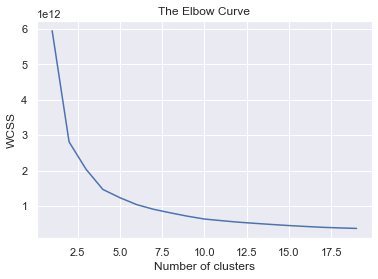

In [93]:
# Plotting an Elbow curve for the same

def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
        kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
        kmeans.fit(sample)
        wcss.append(kmeans.inertia_)
        print('Cluster', i, 'Inertia', kmeans.inertia_)
    plt.plot(range(1,20),wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

In [ ]:
# Unsupervised ML Model -- Extracts features on its own

# Naive Bayes Classifier

In [108]:
# Naive Bayes Model

# Gaussian Process
def GaussianProcess(x,y,parameters=None):
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores=cross_val_score(GaussianProcessClassifier(1.0 * RBF(1.0)), x, y, cv=cv, n_jobs=5, verbose=100)
        model=GaussianProcessClassifier(1.0 * RBF(1.0)).fit(x,y)
        return model

# Naive Bayes Model
def naiveBayes(x,y,parameters=None):
    cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    scores=cross_val_score(GaussianNB(), x, y, cv=cv, n_jobs=4, verbose=100, scoring='accuracy')
    model=GaussianNB().fit(x,y)
    y_pred = model.predict(x)
    # Create the confusion matrix
    conf_mat = confusion_matrix(y_pred, y, normalize="true")
    return model, conf_mat

# Random Forest Classifier

In [46]:
# RandomForestClassifier
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.25, 
                                                        random_state = 101)
    start_time = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start_time)
    predictionforest = trainedforest.predict(X_Test)
    print(n_estimators, ' : ', confusion_matrix(Y_Test,predictionforest))
    print(n_estimators, ' : ', classification_report(Y_Test,predictionforest))




50.78125
[[76  6  0  0  0]
 [14 43  8  0  0]
 [ 0 10 53  0 22]
 [ 0  0  0 62  0]
 [ 0  0  0  0 64]]


NameError: name 'classification_report' is not defined

# SVR Classifier

In [ ]:
#SVR Model

def svr(x,y,parameters):
        print ('Running SVR model')
        models=[]
        test_accs=[]
        test_f1s=[]
        for tr_index, ts_index in StratifiedKFold(n_splits=4, shuffle=True, random_state=42).split(x,y):
            print ('\n\nNew Outer CV\n\n')
            grid = GridSearchCV(SVR(), param_grid=parameters, verbose=100,
                            n_jobs=4, scoring=['neg_mean_squared_error'],refit='neg_mean_squared_error')
            grid.fit(x[tr_index], y[tr_index])
            best_model = grid.best_estimator_
            best_model_preds = best_model.predict(x[ts_index])
            test_acc = mean_squared_error(y[ts_index],best_model_preds)
            models.append(best_model)
            test_accs.append(test_acc)
        best_test_acc = min(test_accs)
        best_test_model = models[test_accs.index(best_test_acc)]
        print ("\n\n Nested CV Results: {0} {1}\n\n".format(np.mean(test_accs), np.std(test_accs)))
        return best_test_model
svr()

# SVM default model

In [119]:
def svm(x,y,parameters):
	print ("Running SVM model")
	#C_range = np.logspace(-2, 10, 13)
	#gamma_range = np.logspace(-9, 3, 13)
	#param_grid = dict(gamma=gamma_range, C=C_range)
	models=[]
	test_accs=[]
	test_f1s=[]
	for tr_index, ts_index in StratifiedKFold(n_splits=4, shuffle=True, random_state=42).split(x,y):
		print ("\n\nNew Outer CV\n\n")	
	#outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
		grid = GridSearchCV(SVC(probability=True), param_grid=parameters, verbose=100, 
				n_jobs=4, scoring=['f1_weighted','accuracy'],refit='f1_weighted')
		grid.fit(x[tr_index], y[tr_index])
		best_model = grid.best_estimator_
		best_model_preds = best_model.predict(x[ts_index])
		test_acc = accuracy_score(y[ts_index],best_model_preds)
		test_f1 = f1_score(y[ts_index], best_model_preds, average="weighted")	
		models.append(best_model)
		test_accs.append(test_acc)
		test_f1s.append(test_f1)	
	#non_nested_score=grid.best_score_
	#nested_score = cross_val_score(grid, X=x, y=y, cv=outer_cv)
	#print "Non-nested - Nested: " + str(non_nested_score - nested_score.mean())
	best_test_acc = max(test_accs)
	best_test_model = models[test_accs.index(best_test_acc)]
	print (f'\n\n Nested CV Results: {0} {1} {2} {3}\n\n').format(np.mean(test_accs), np.std(test_accs), np.mean(test_f1s), np.std(test_f1s))
	return best_test_model

In [120]:
svm(a,b, {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']})

Running SVM model


New Outer CV




ValueError: Found input variables with inconsistent numbers of samples: [1334, 1000]

## Getting methane production data:

In [47]:
import pandas as pd
import numpy as np

In [48]:
file = pd.read_excel('./Biogas_Methane_Inhibition_Data.xlsx')

In [49]:
file

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Day 1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Day 2,Unnamed: 10,100,Unnamed: 12,Unnamed: 13,Unnamed: 14,Day 3,Unnamed: 16
0,NaN,Biogas Production,Error,Methane Inhibited,Error,NaN,NaN,Biogas Production,Error,Methane Inhibited,Error,NaN,NaN,Biogas Production,Error,Methane Inhibited,Error
1,PC,243.33,55.75,68.414501,4.393137,NaN,PC,243.33,55.75,135.997394,6.077892,NaN,PC,243.33,55.75,130.489568,10.89873
2,NC,181.33,27.23,19.529821,1.533201,NaN,NC,181.33,27.23,40.485603,3.776399,NaN,NC,181.33,27.23,41.351527,2.984386
3,TL,168.33,10.41,57.967897,14.577397,NaN,TL,112,3,64.552626,18.389143,NaN,TL,63.67,3.51,35.695382,6.342647
4,TM,160.67,20.03,40.505281,9.108185,NaN,TM,105,4.36,48.057934,3.070957,NaN,TM,61,2,27.133848,5.93206
5,TH,153.33,13.87,56.907218,4.644965,NaN,TH,104.33,1.15,42.706828,9.863196,NaN,TH,57,1,27.237404,7.325356
6,SL,87.33,13.65,26.773666,4.121198,NaN,SL,92,10.82,31.853283,4.823788,NaN,SL,64.33,7.51,27.43991,6.178419
7,SM,73.5,25.94,21.539514,4.564403,NaN,SM,92.67,3.05,39.969003,1.918006,NaN,SM,60,1,26.706948,2.314524
8,SH,123.5,3.61,28.903295,5.320276,NaN,SH,85.33,1.53,34.748659,3.678304,NaN,SH,58.33,3.05,27.790264,2.647783
9,CL,169.67,10.02,61.870269,5.537099,NaN,CL,114.33,5.13,58.248362,4.994843,NaN,CL,45.33,6.11,26.076377,5.192511


In [50]:
samples = file.iloc[1:12,0].to_numpy()

In [51]:
samples

array(['PC', 'NC', 'TL', 'TM', 'TH', 'SL', 'SM', 'SH', 'CL', 'CM', 'CH'],
      dtype=object)

In [52]:
# Biogas production data cleaning

day1 = pd.DataFrame(file.iloc[1:12,1:5]).reset_index(drop=True)
day2 = pd.DataFrame(file.iloc[1:12,7:11]).reset_index(drop=True)
day3 = pd.DataFrame(file.iloc[1:12, 13:17]).reset_index(drop=True)
day4 = pd.DataFrame(file.iloc[15:26,1:5]).reset_index(drop=True)
day5 = pd.DataFrame(file.iloc[15:26,7:11]).reset_index(drop=True)

In [53]:
day1

,Unnamed: 1,Unnamed: 2,Day 1,Unnamed: 4
0,243.33,55.75,68.414501,4.393137
1,181.33,27.23,19.529821,1.533201
2,168.33,10.41,57.967897,14.577397
3,160.67,20.03,40.505281,9.108185
4,153.33,13.87,56.907218,4.644965
5,87.33,13.65,26.773666,4.121198
6,73.5,25.94,21.539514,4.564403
7,123.5,3.61,28.903295,5.320276
8,169.67,10.02,61.870269,5.537099
9,156,1,53.578013,3.947188


In [58]:
day2

,Unnamed: 7,Unnamed: 8,Day 2,Unnamed: 10
0,243.33,55.75,135.997394,6.077892
1,181.33,27.23,40.485603,3.776399
2,112,3,64.552626,18.389143
3,105,4.36,48.057934,3.070957
4,104.33,1.15,42.706828,9.863196
5,92,10.82,31.853283,4.823788
6,92.67,3.05,39.969003,1.918006
7,85.33,1.53,34.748659,3.678304
8,114.33,5.13,58.248362,4.994843
9,105.67,2.08,53.059748,5.639819


In [59]:
day3

,Unnamed: 13,Unnamed: 14,Day 3,Unnamed: 16
0,243.33,55.75,130.489568,10.89873
1,181.33,27.23,41.351527,2.984386
2,63.67,3.51,35.695382,6.342647
3,61,2,27.133848,5.93206
4,57,1,27.237404,7.325356
5,64.33,7.51,27.43991,6.178419
6,60,1,26.706948,2.314524
7,58.33,3.05,27.790264,2.647783
8,45.33,6.11,26.076377,5.192511
9,45.67,1.15,24.787242,4.242748


In [60]:
day4

,Unnamed: 1,Unnamed: 2,Day 1,Unnamed: 4
0,243.33,55.75,128.807944,6.251005
1,181.33,27.23,60.627685,3.864318
2,42.33,2.08,20.460905,0.267402
3,42.67,2.08,20.171365,4.256698
4,36.67,2.89,17.183434,5.611929
5,60,1,25.650289,9.990452
6,46.33,1.53,22.230406,4.678213
7,44,2.65,17.62806,6.345016
8,32.67,4.93,17.705453,2.352506
9,27.67,1.53,14.009386,3.198936


In [64]:
methane_err

,Unnamed: 4,Unnamed: 10,Unnamed: 16,Unnamed: 4,Unnamed: 10
0,4.393137,6.077892,10.89873,6.251005,3.918748
1,1.533201,3.776399,2.984386,3.864318,1.479933
2,14.577397,18.389143,6.342647,0.267402,1.491165
3,9.108185,3.070957,5.93206,4.256698,3.344796
4,4.644965,9.863196,7.325356,5.611929,14.08703
5,4.121198,4.823788,6.178419,9.990452,9.34755
6,4.564403,1.918006,2.314524,4.678213,4.308555
7,5.320276,3.678304,2.647783,6.345016,4.354024
8,5.537099,4.994843,5.192511,2.352506,6.596568
9,3.947188,5.639819,4.242748,3.198936,4.327031


In [65]:
methane_data

,day 1,day 2,day 3,day 4,day 5
0,68.414501,135.997394,130.489568,128.807944,139.91693
1,19.529821,40.485603,41.351527,60.627685,51.148442
2,57.967897,64.552626,35.695382,20.460905,15.983462
3,40.505281,48.057934,27.133848,20.171365,14.755975
4,56.907218,42.706828,27.237404,17.183434,12.67853
5,26.773666,31.853283,27.43991,25.650289,23.221913
6,21.539514,39.969003,26.706948,22.230406,27.611468
7,28.903295,34.748659,27.790264,17.62806,17.309027
8,61.870269,58.248362,26.076377,17.705453,14.847486
9,53.578013,53.059748,24.787242,14.009386,14.330305


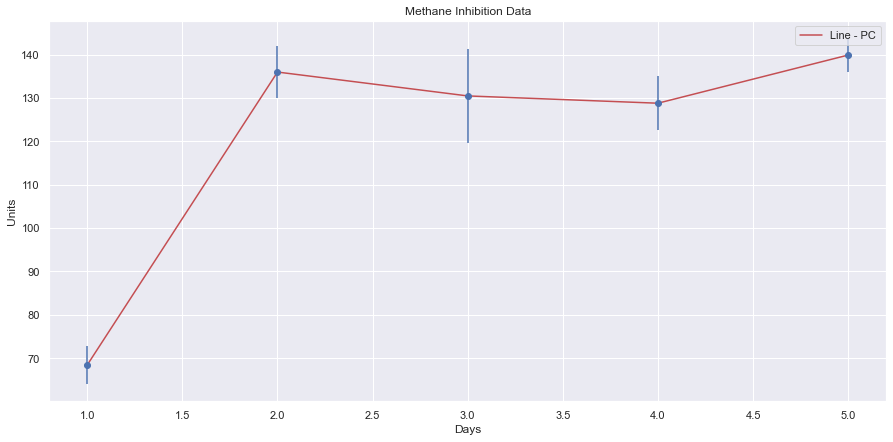

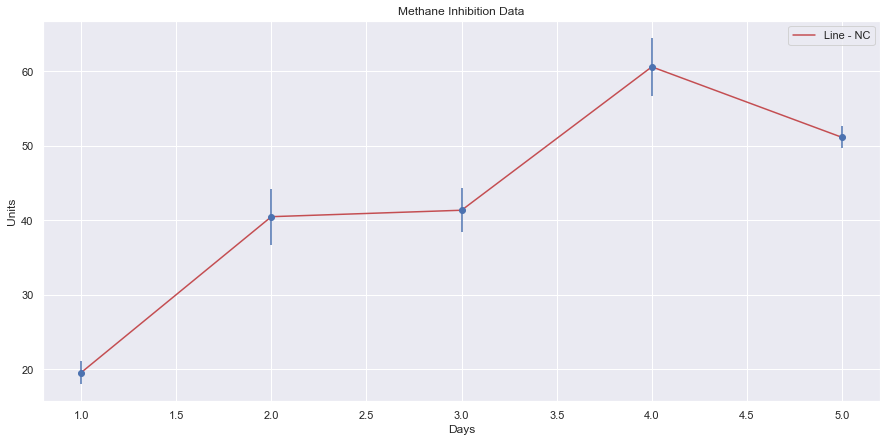

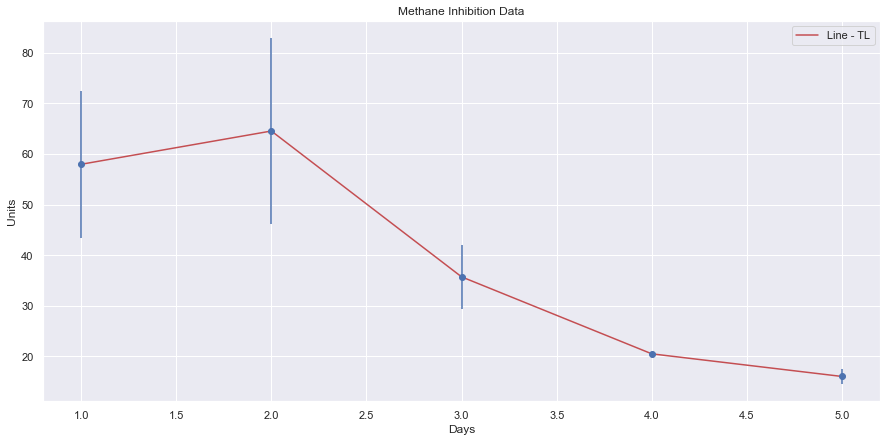

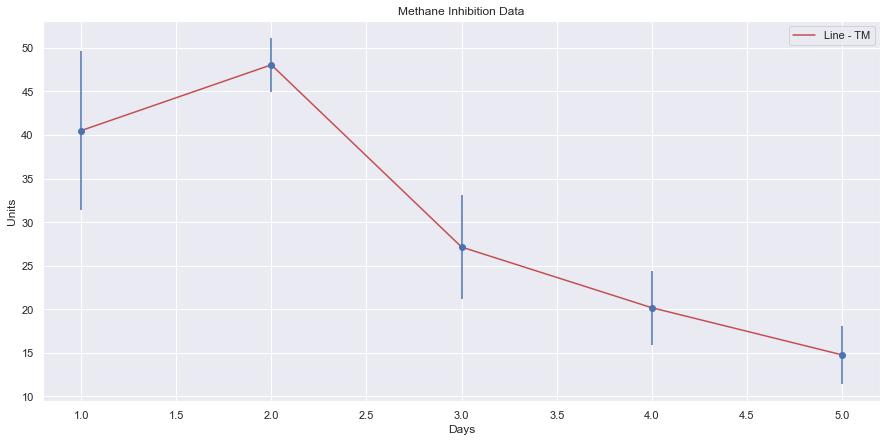

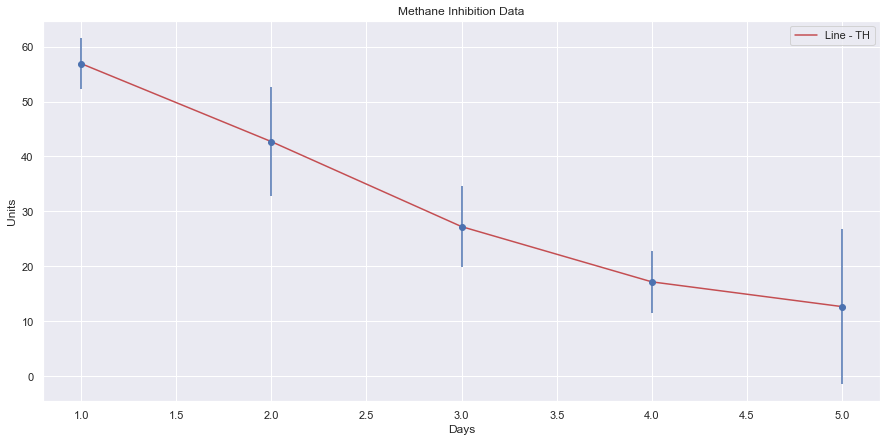

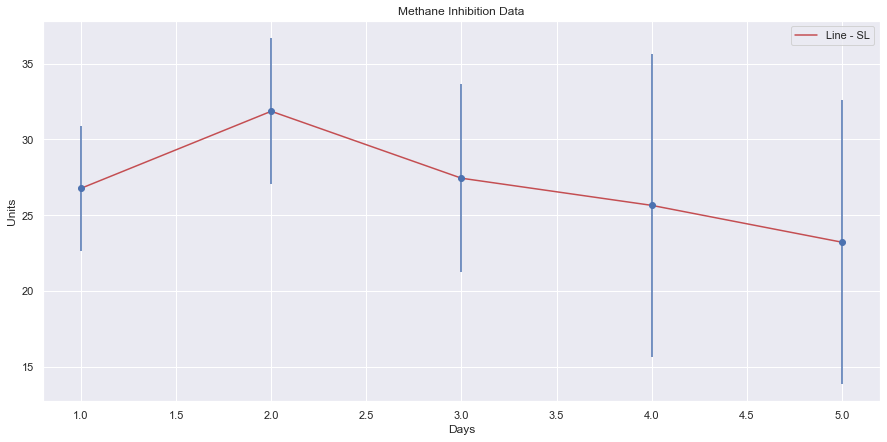

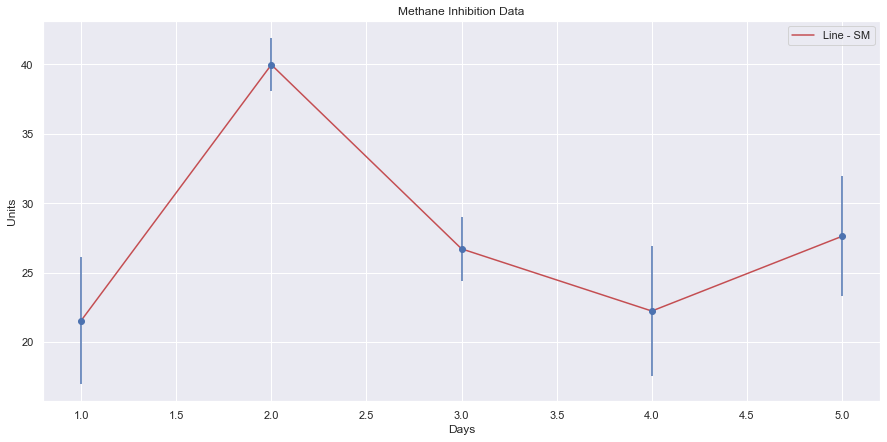

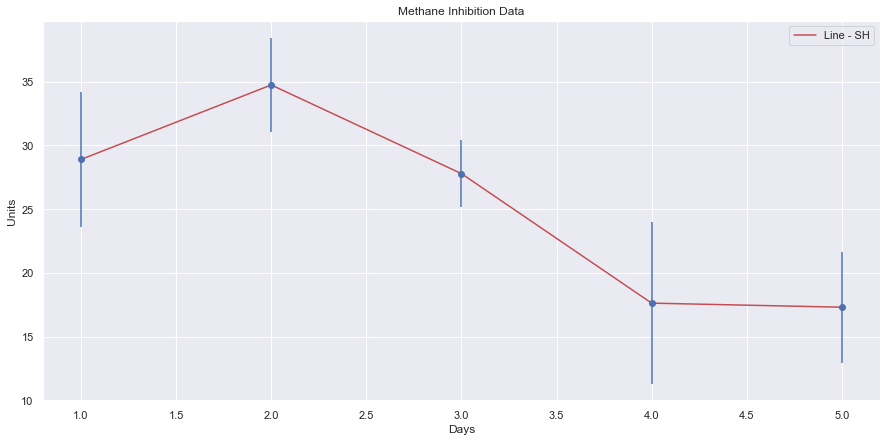

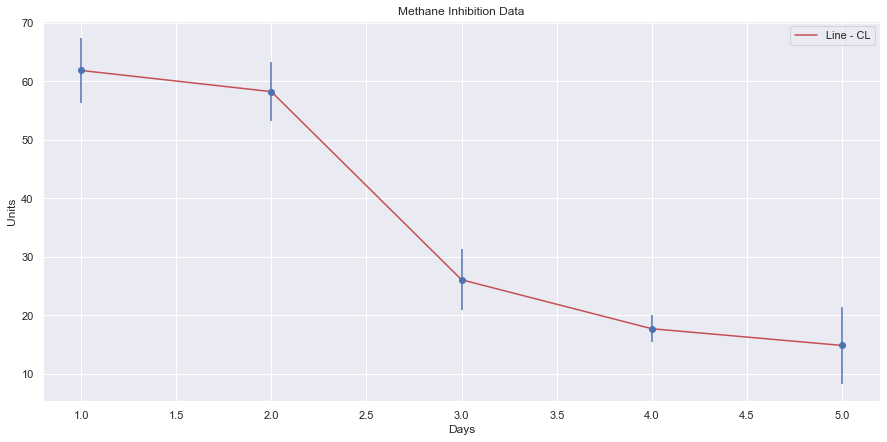

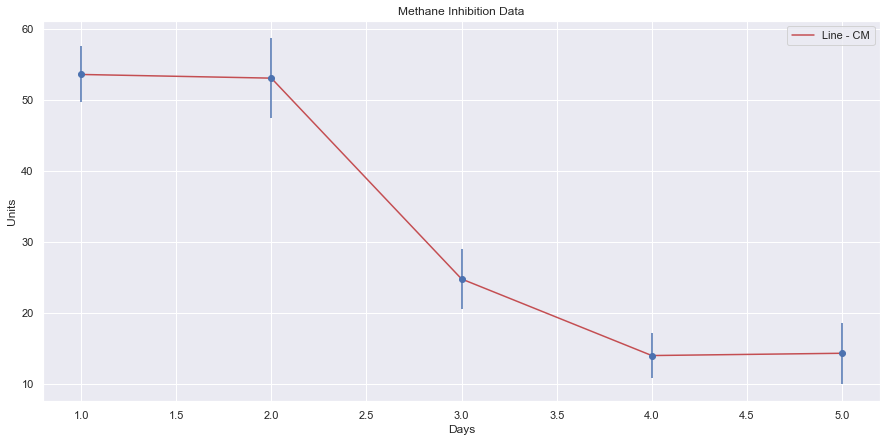

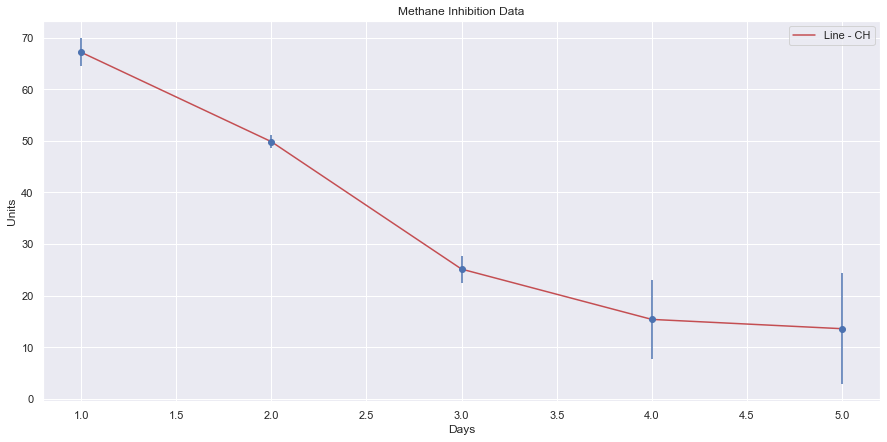

Unnamed: 4     2.753313
Unnamed: 10    1.317101
Unnamed: 16    2.608336
Unnamed: 4     7.648148
Unnamed: 10    10.72401
Name: 10, dtype: object


In [67]:
# Function to plot methane inhibition data from day 1 to day 5 for a particular sample

methane_data = pd.concat([day1.iloc[:,2], day2.iloc[:,2], day3.iloc[:,2], day4.iloc[:,2], day5.iloc[:,2]], axis = 1)
methane_err = pd.concat([day1.iloc[:,3], day2.iloc[:,3], day3.iloc[:,3], day4.iloc[:,3], day5.iloc[:,3]], axis = 1)
methane_data.columns = ['day 1','day 2','day 3','day 4','day 5']

methane_data.iloc[6, 4] =  np.mean(methane_data.iloc[6, :4])

x = list(range(1,6))
for row in range(len(samples)):
    plt.figure(figsize=(15,7))
    # Plot another line on the same chart/graph
    plt.title('Methane Inhibition Data')
    # plt.figure()
    plt.xlabel('Days')
    plt.ylabel('Units')
    plt.plot(x, methane_data.iloc[row,:], 'r', label=f'Line - {samples[row]}')
    plt.legend()
    plt.errorbar(x, methane_data.iloc[row,:],
             yerr = methane_err.iloc[row,:],
             fmt ='o')
plt.show()
print( methane_err.iloc[row,:])

,day 1,day 2,day 3,day 4,day 5
0,68.414501,135.997394,130.489568,128.807944,139.91693
1,19.529821,40.485603,41.351527,60.627685,51.148442
2,57.967897,64.552626,35.695382,20.460905,15.983462
3,40.505281,48.057934,27.133848,20.171365,14.755975
4,56.907218,42.706828,27.237404,17.183434,12.67853
5,26.773666,31.853283,27.43991,25.650289,23.221913
6,21.539514,39.969003,26.706948,22.230406,27.611468
7,28.903295,34.748659,27.790264,17.62806,17.309027
8,61.870269,58.248362,26.076377,17.705453,14.847486
9,53.578013,53.059748,24.787242,14.009386,14.330305


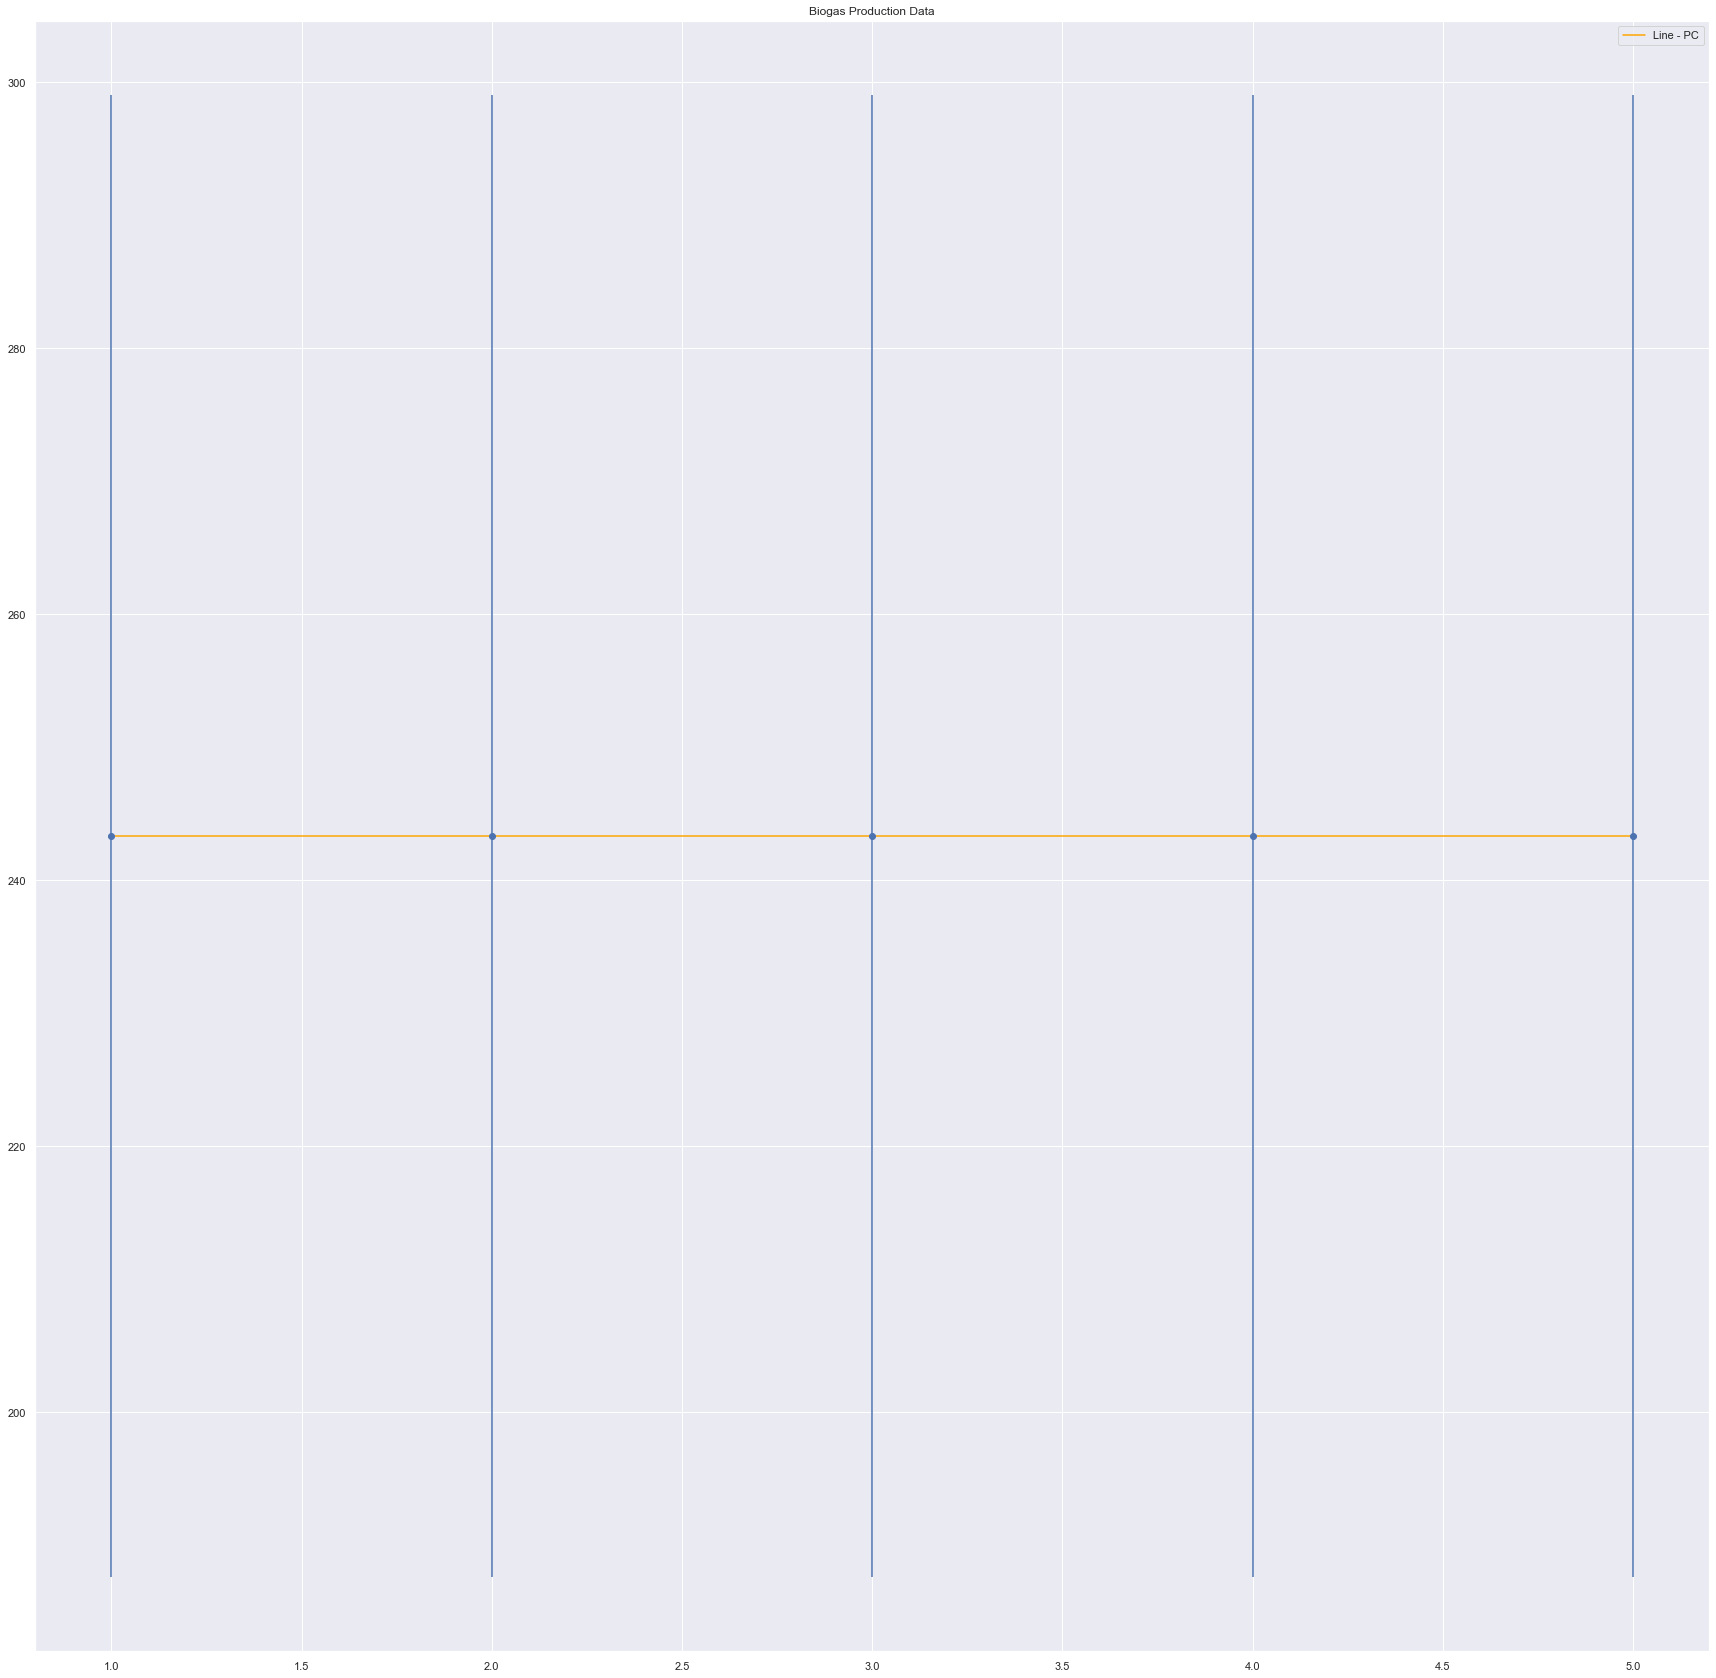

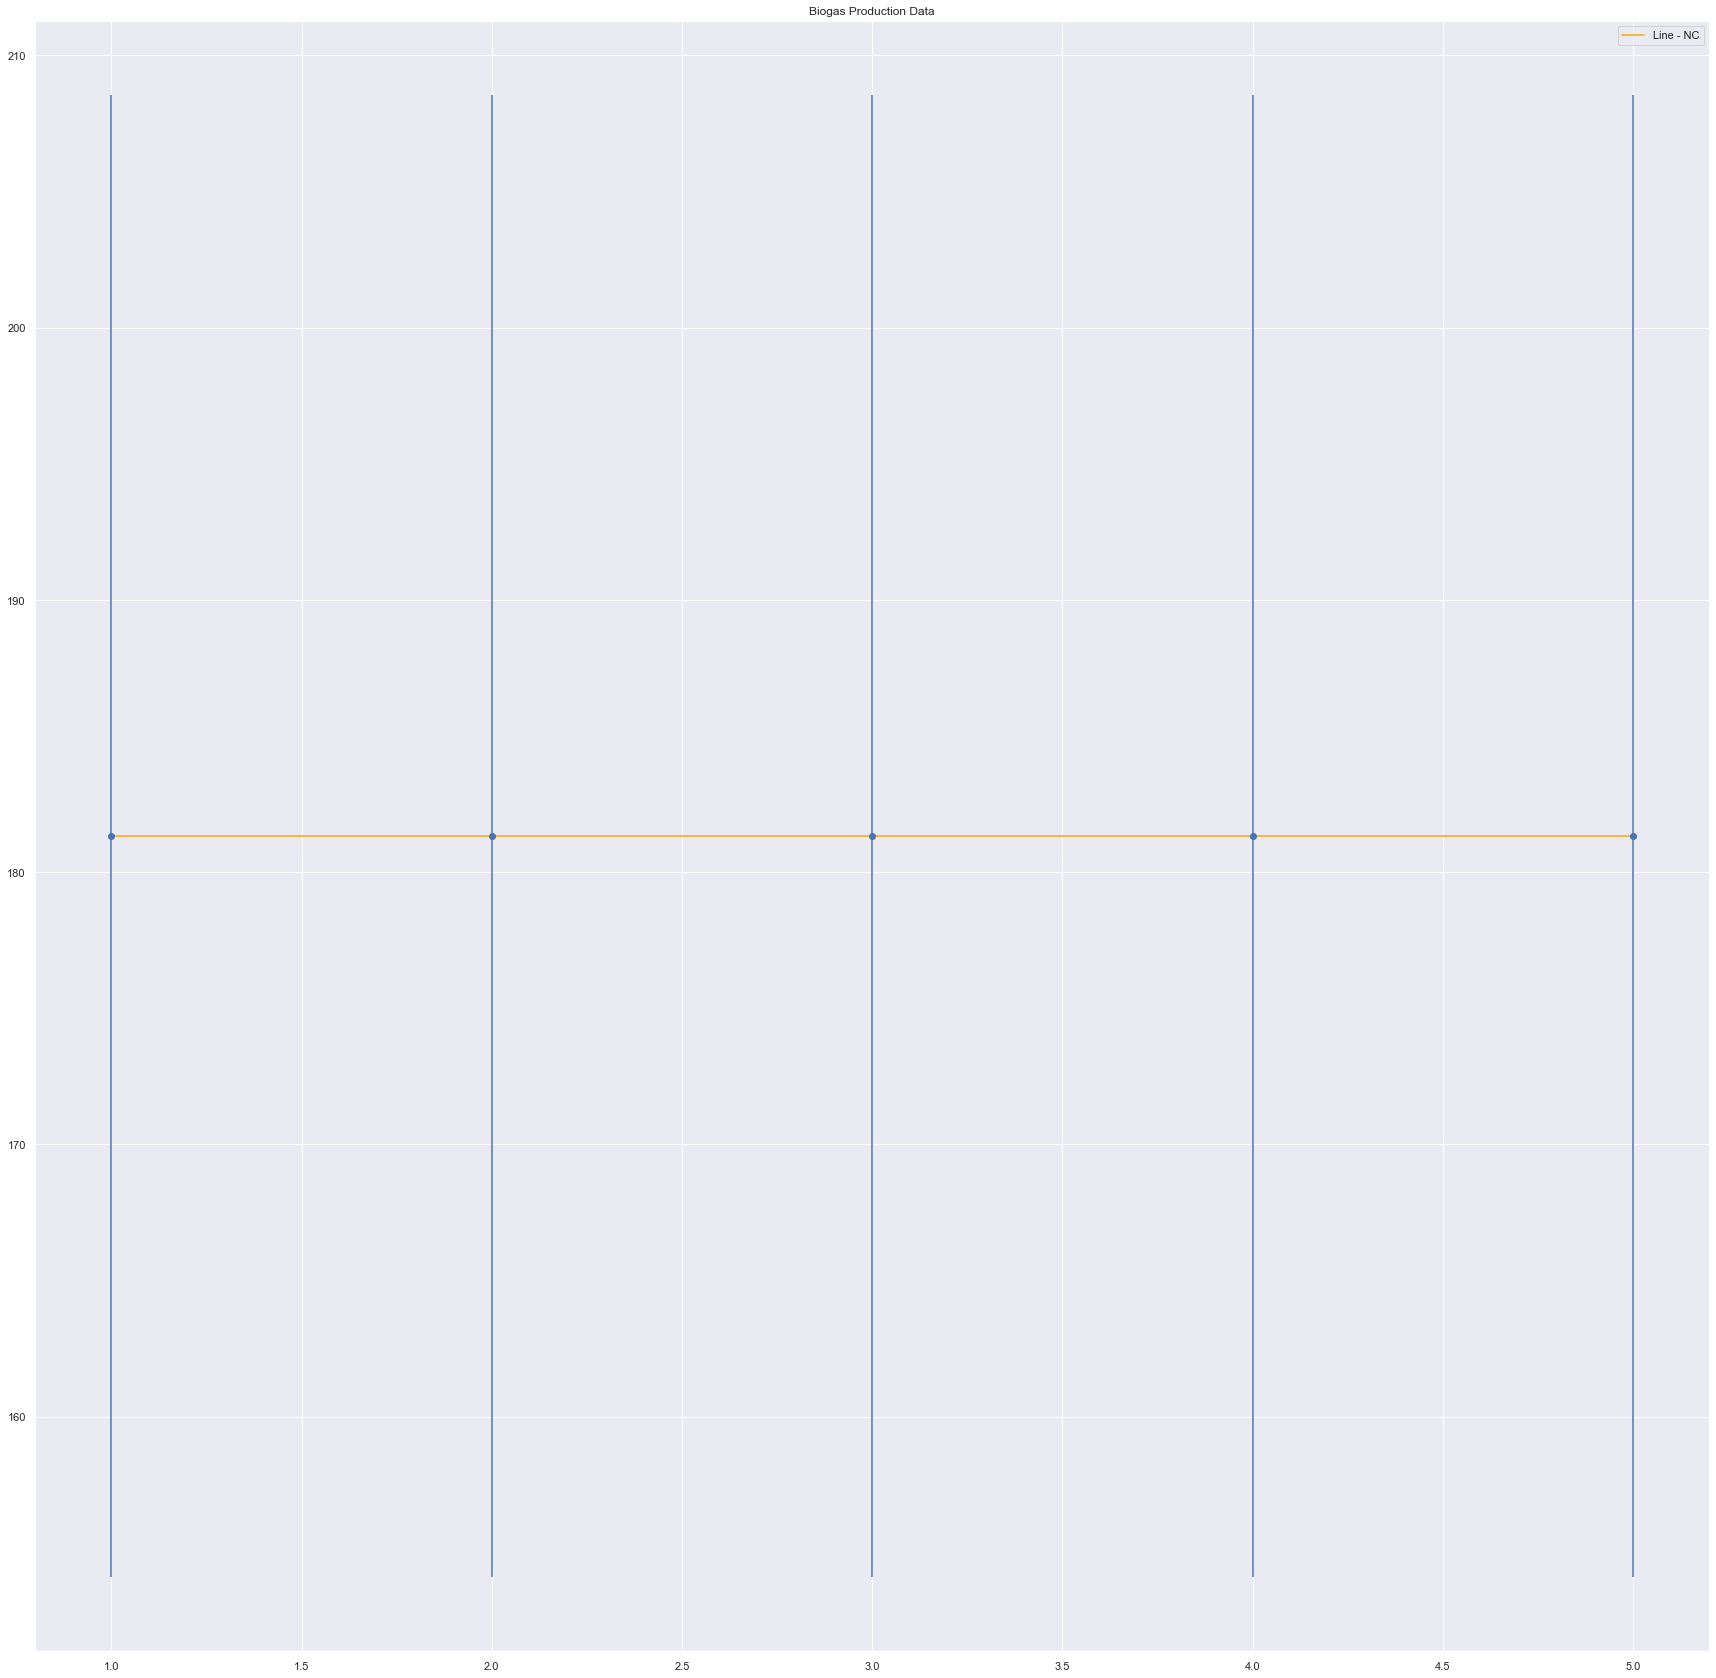

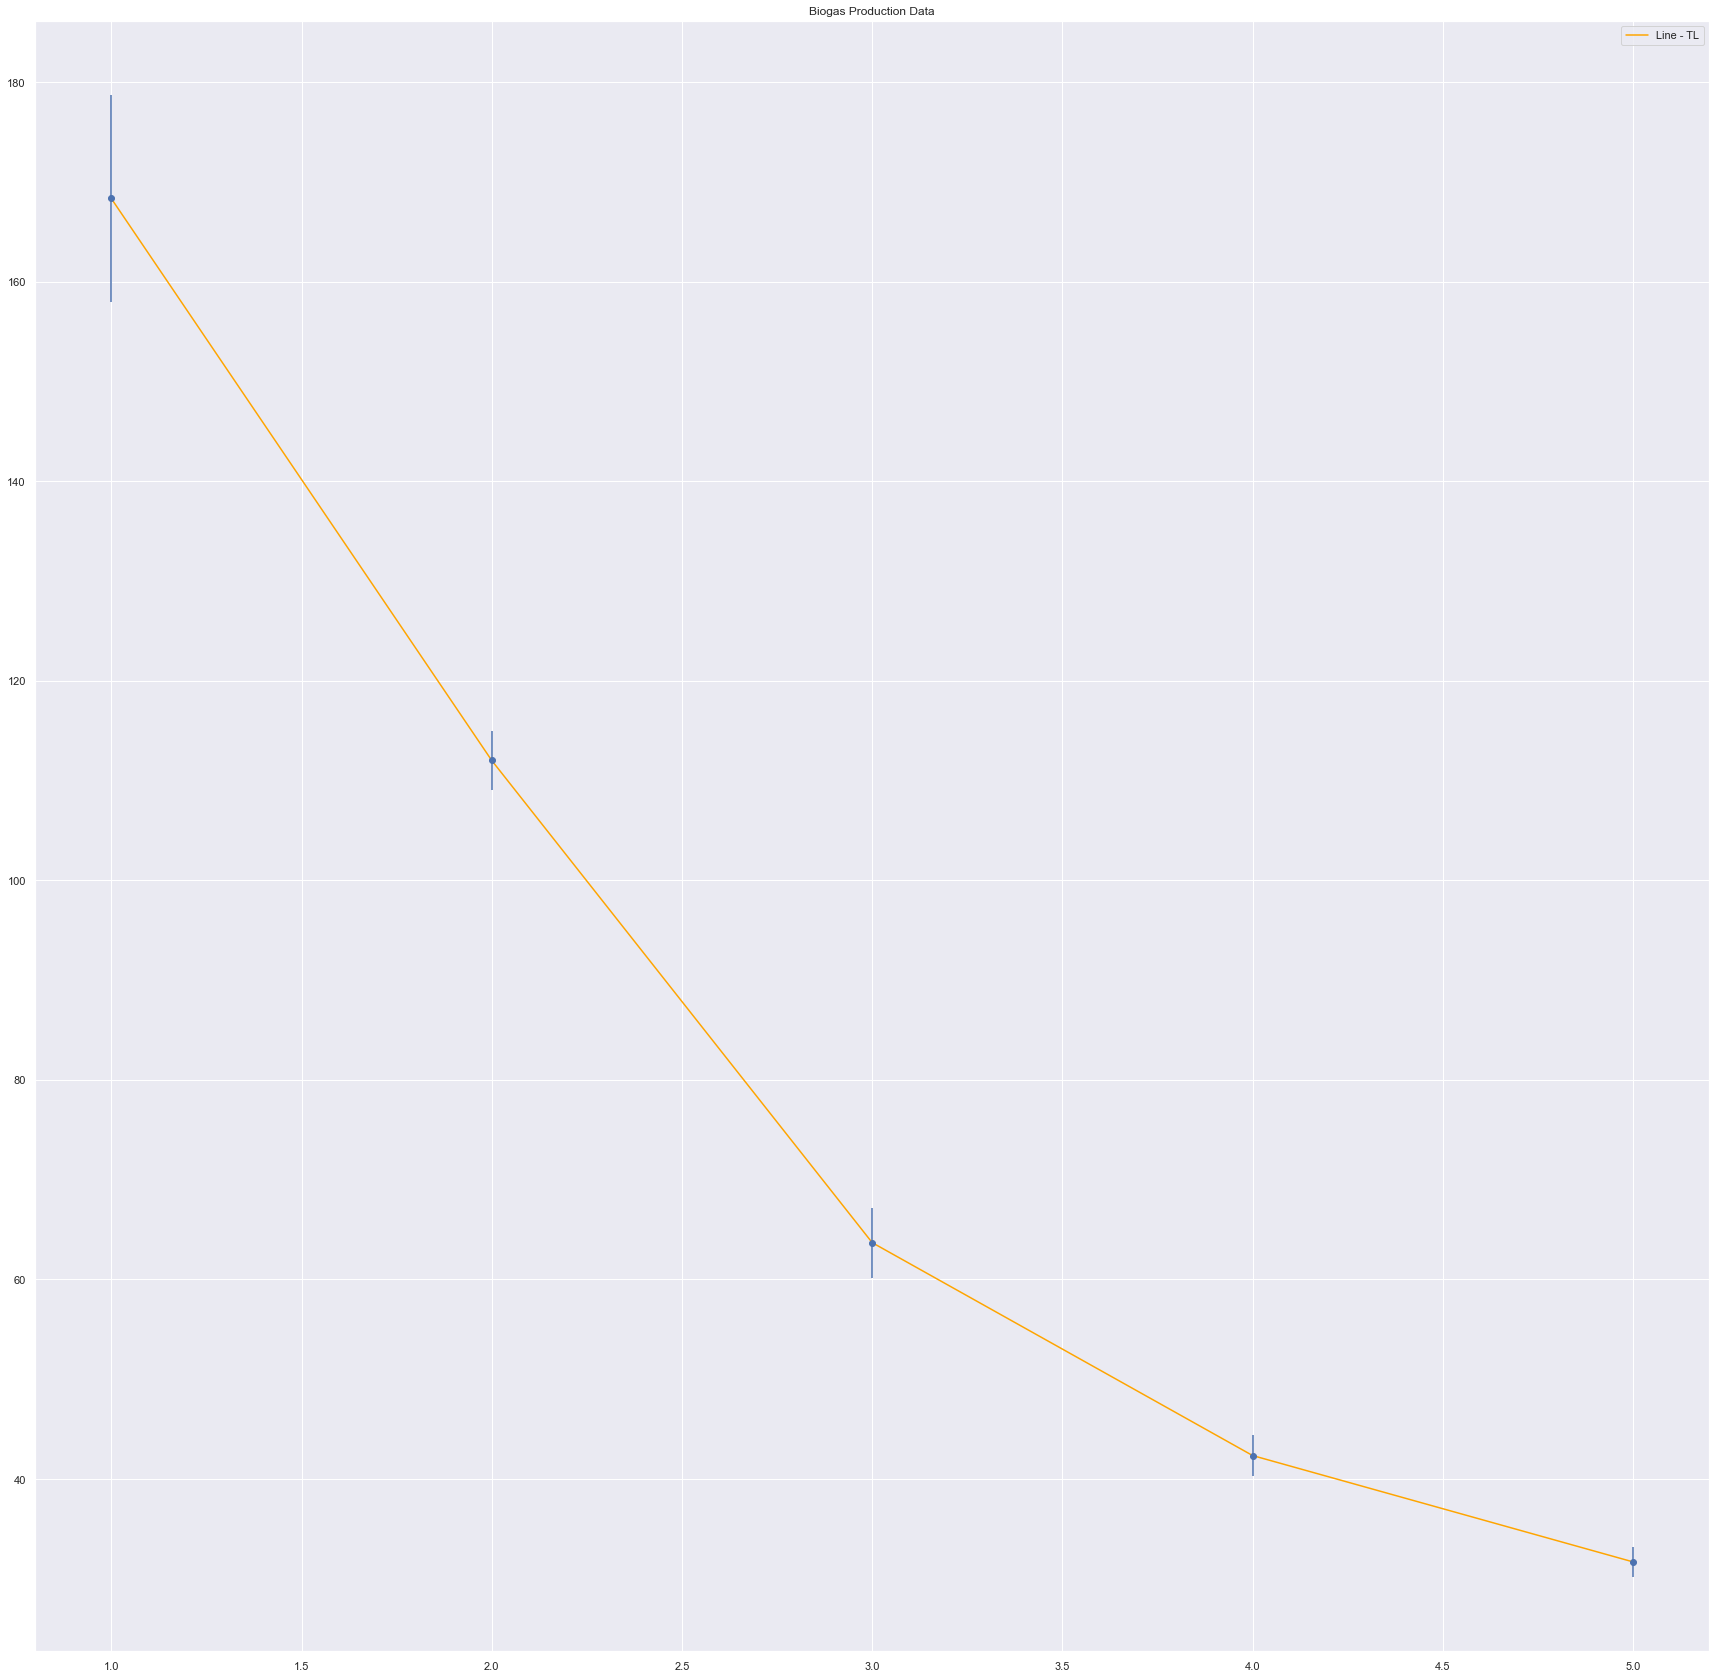

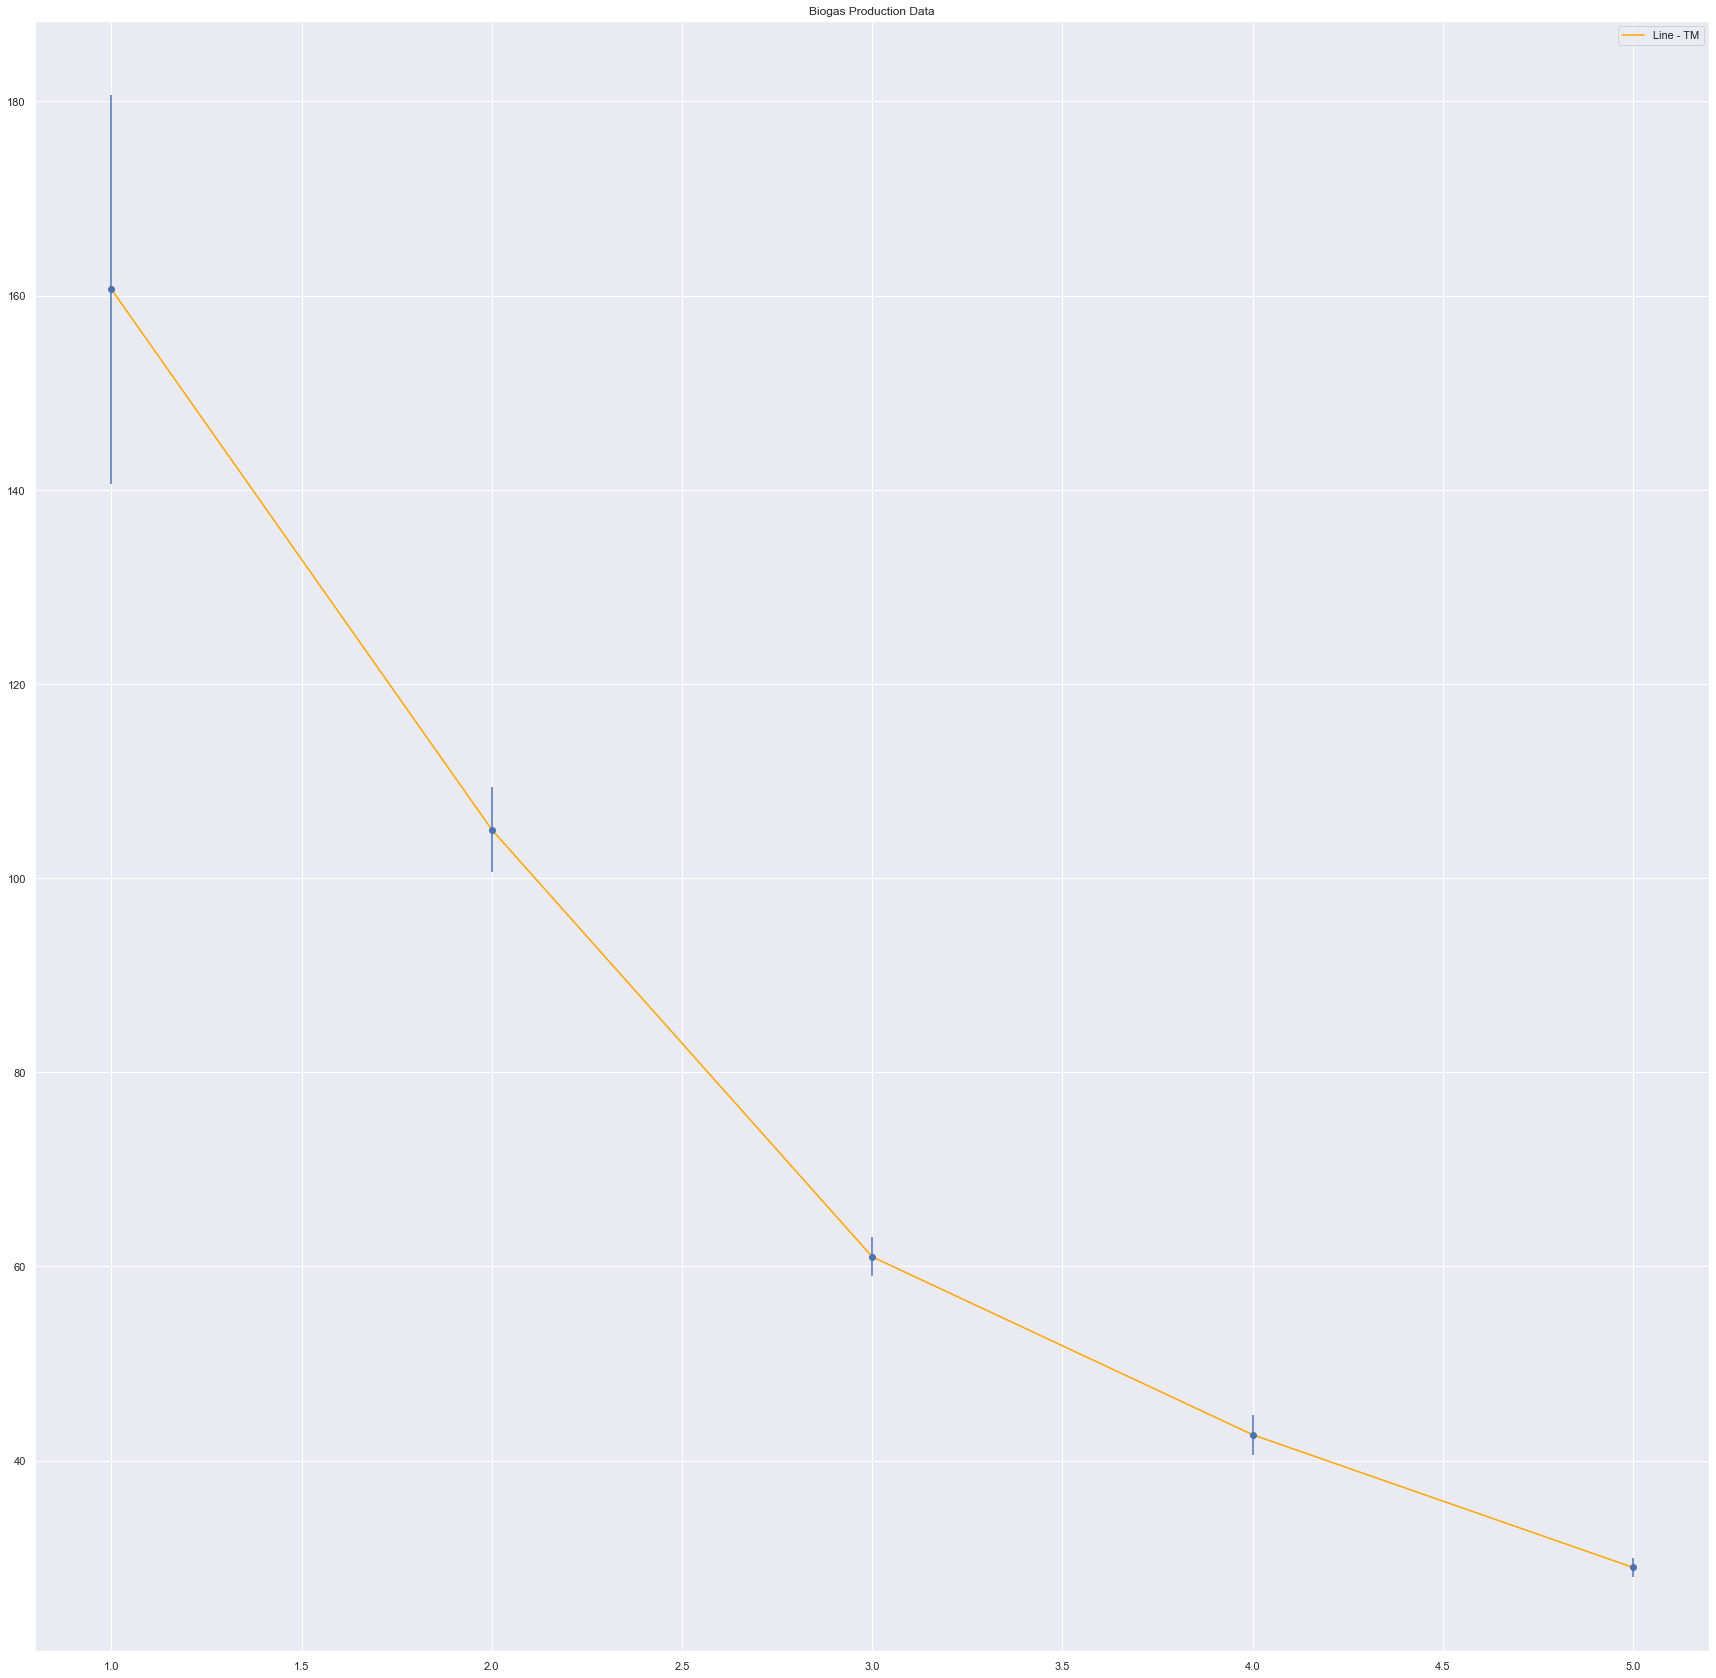

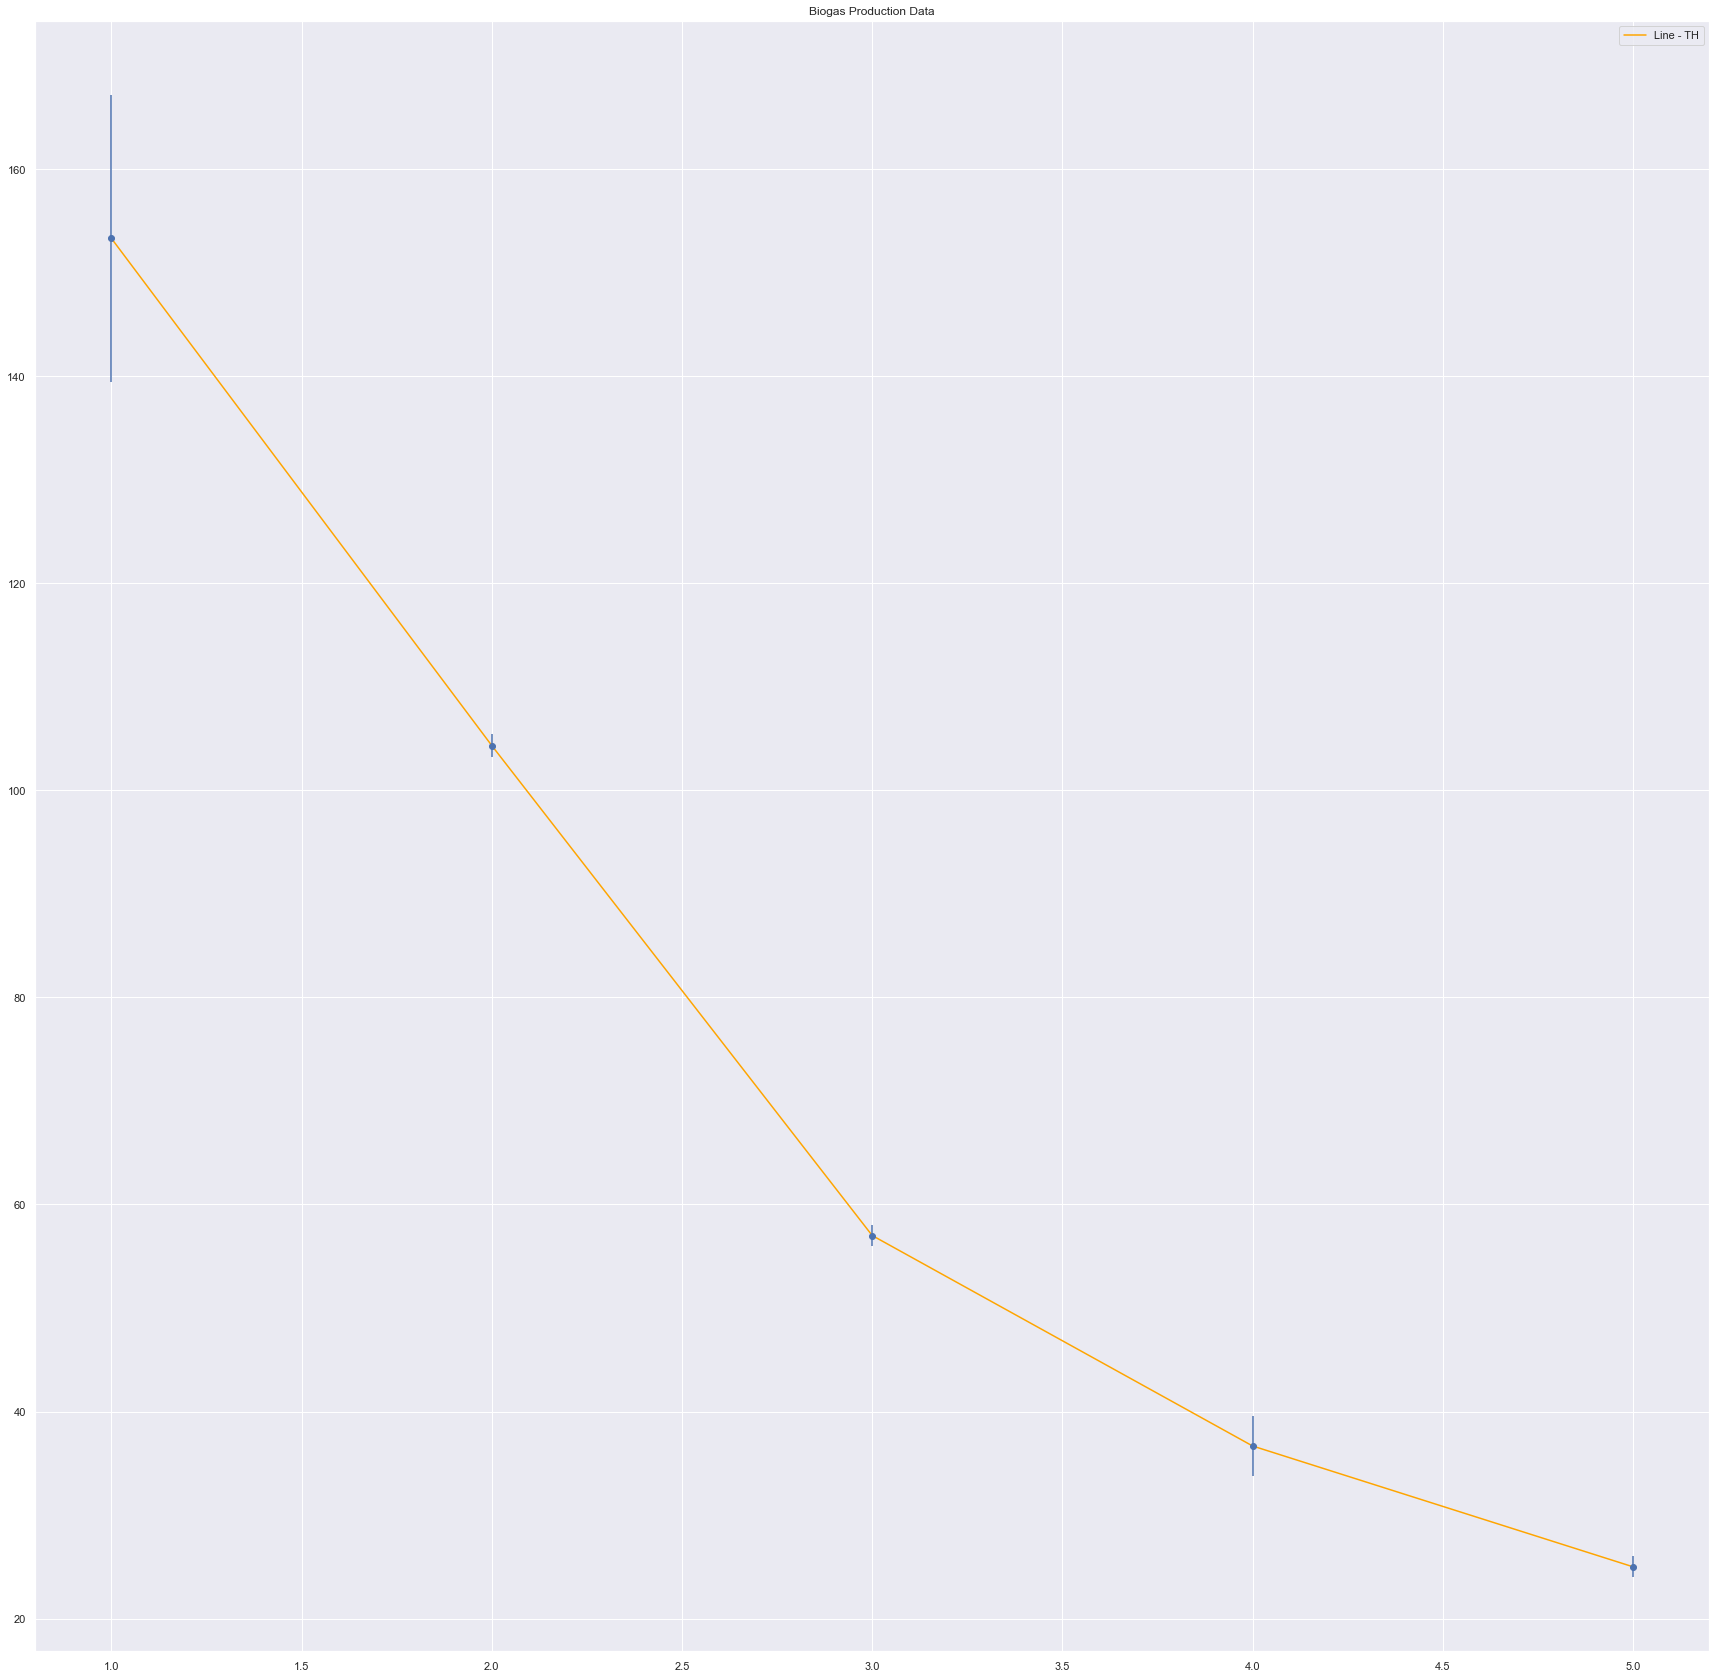

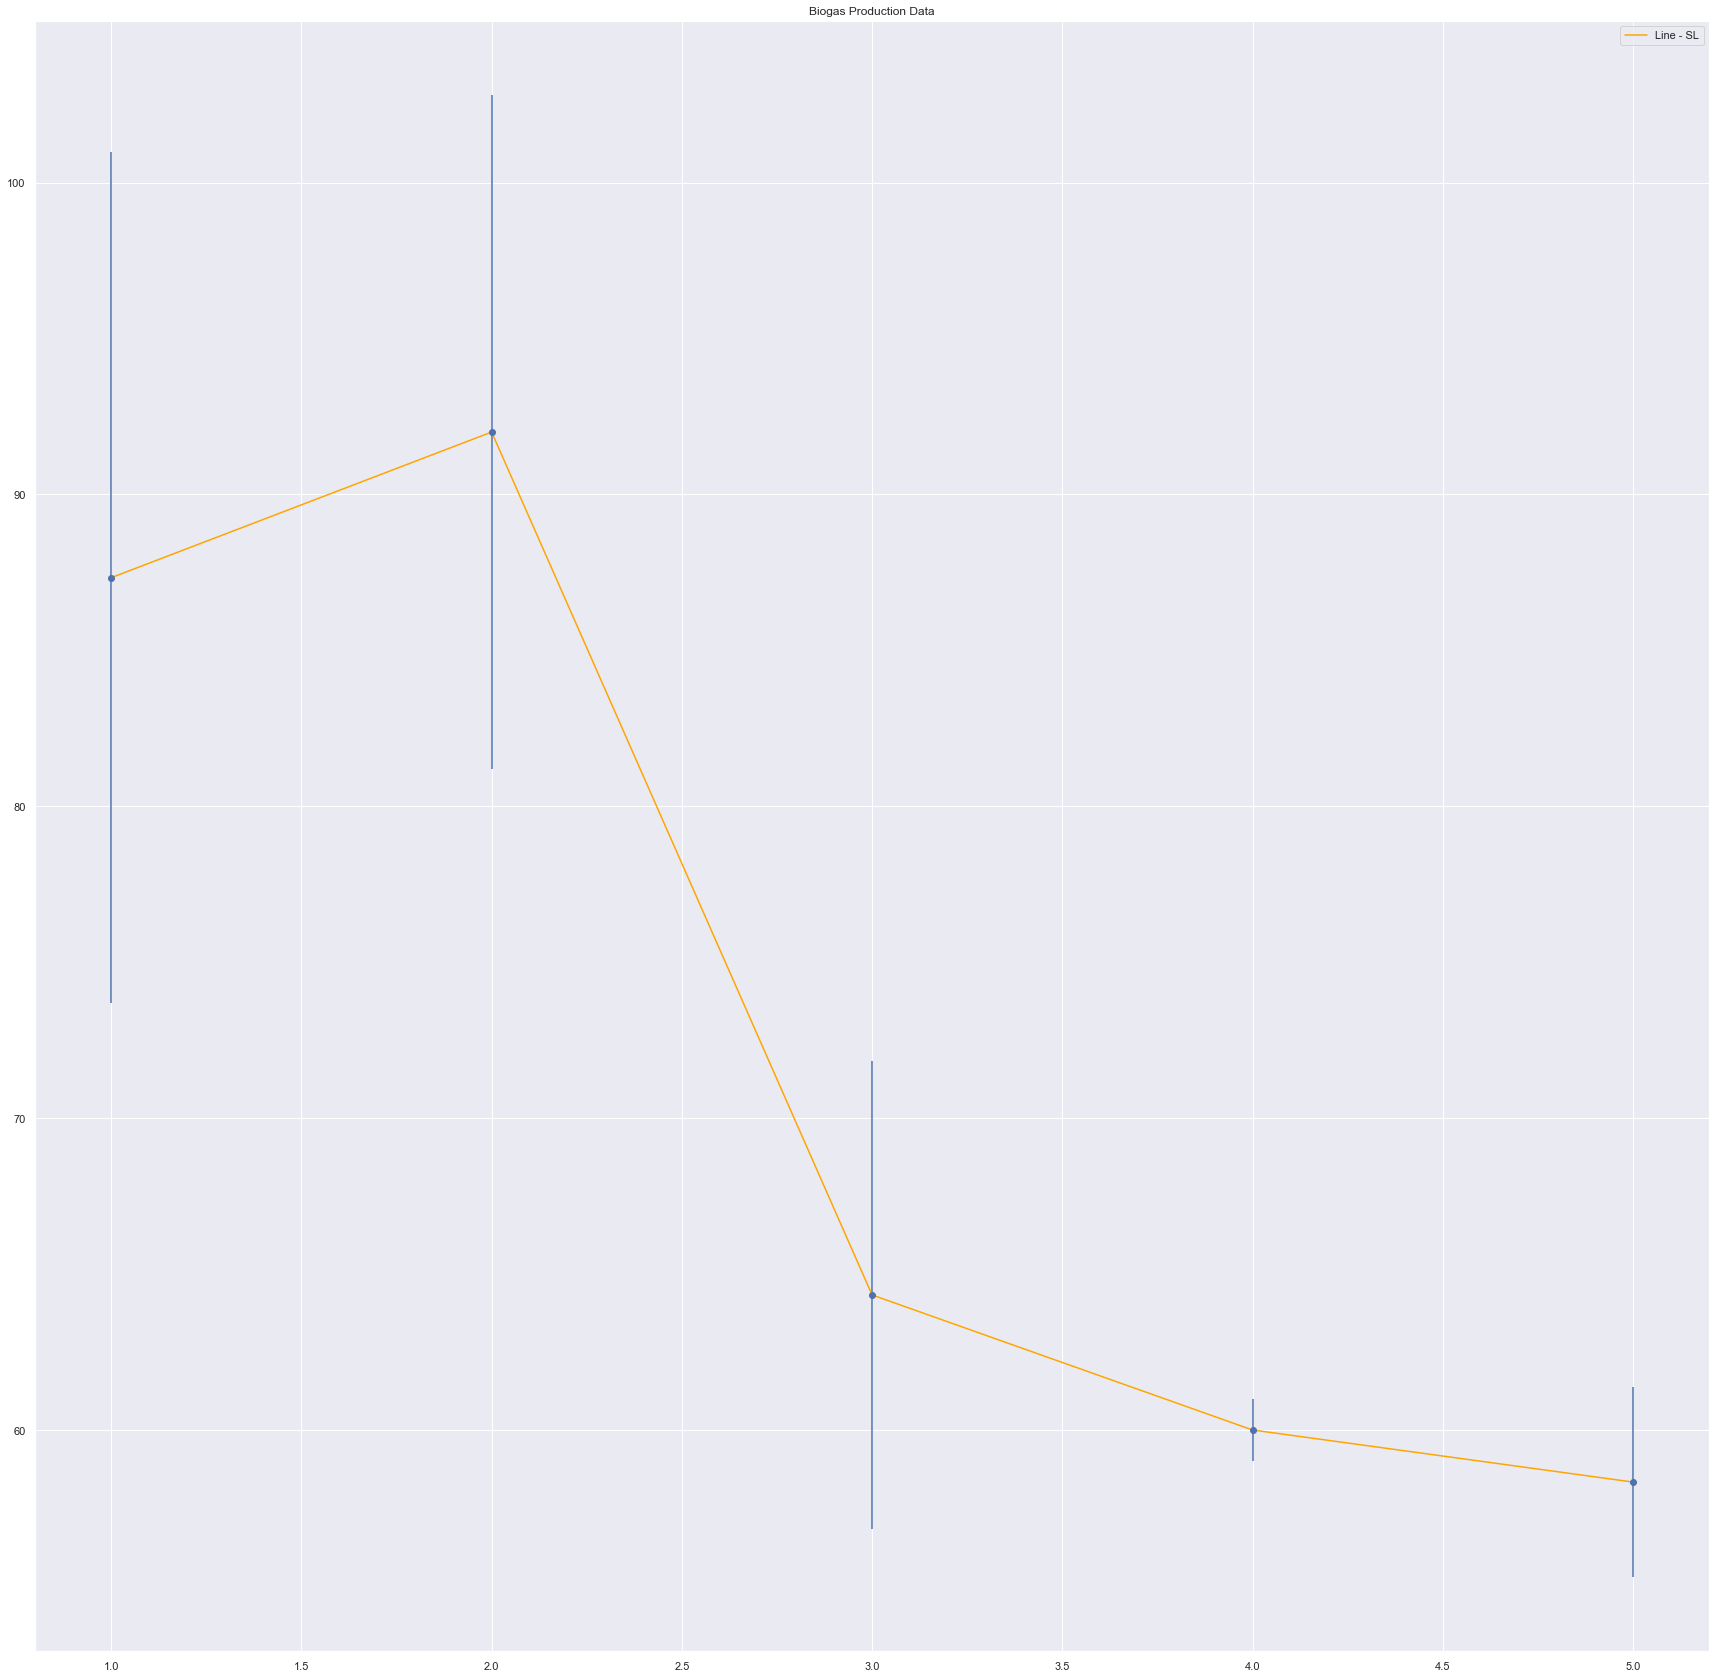

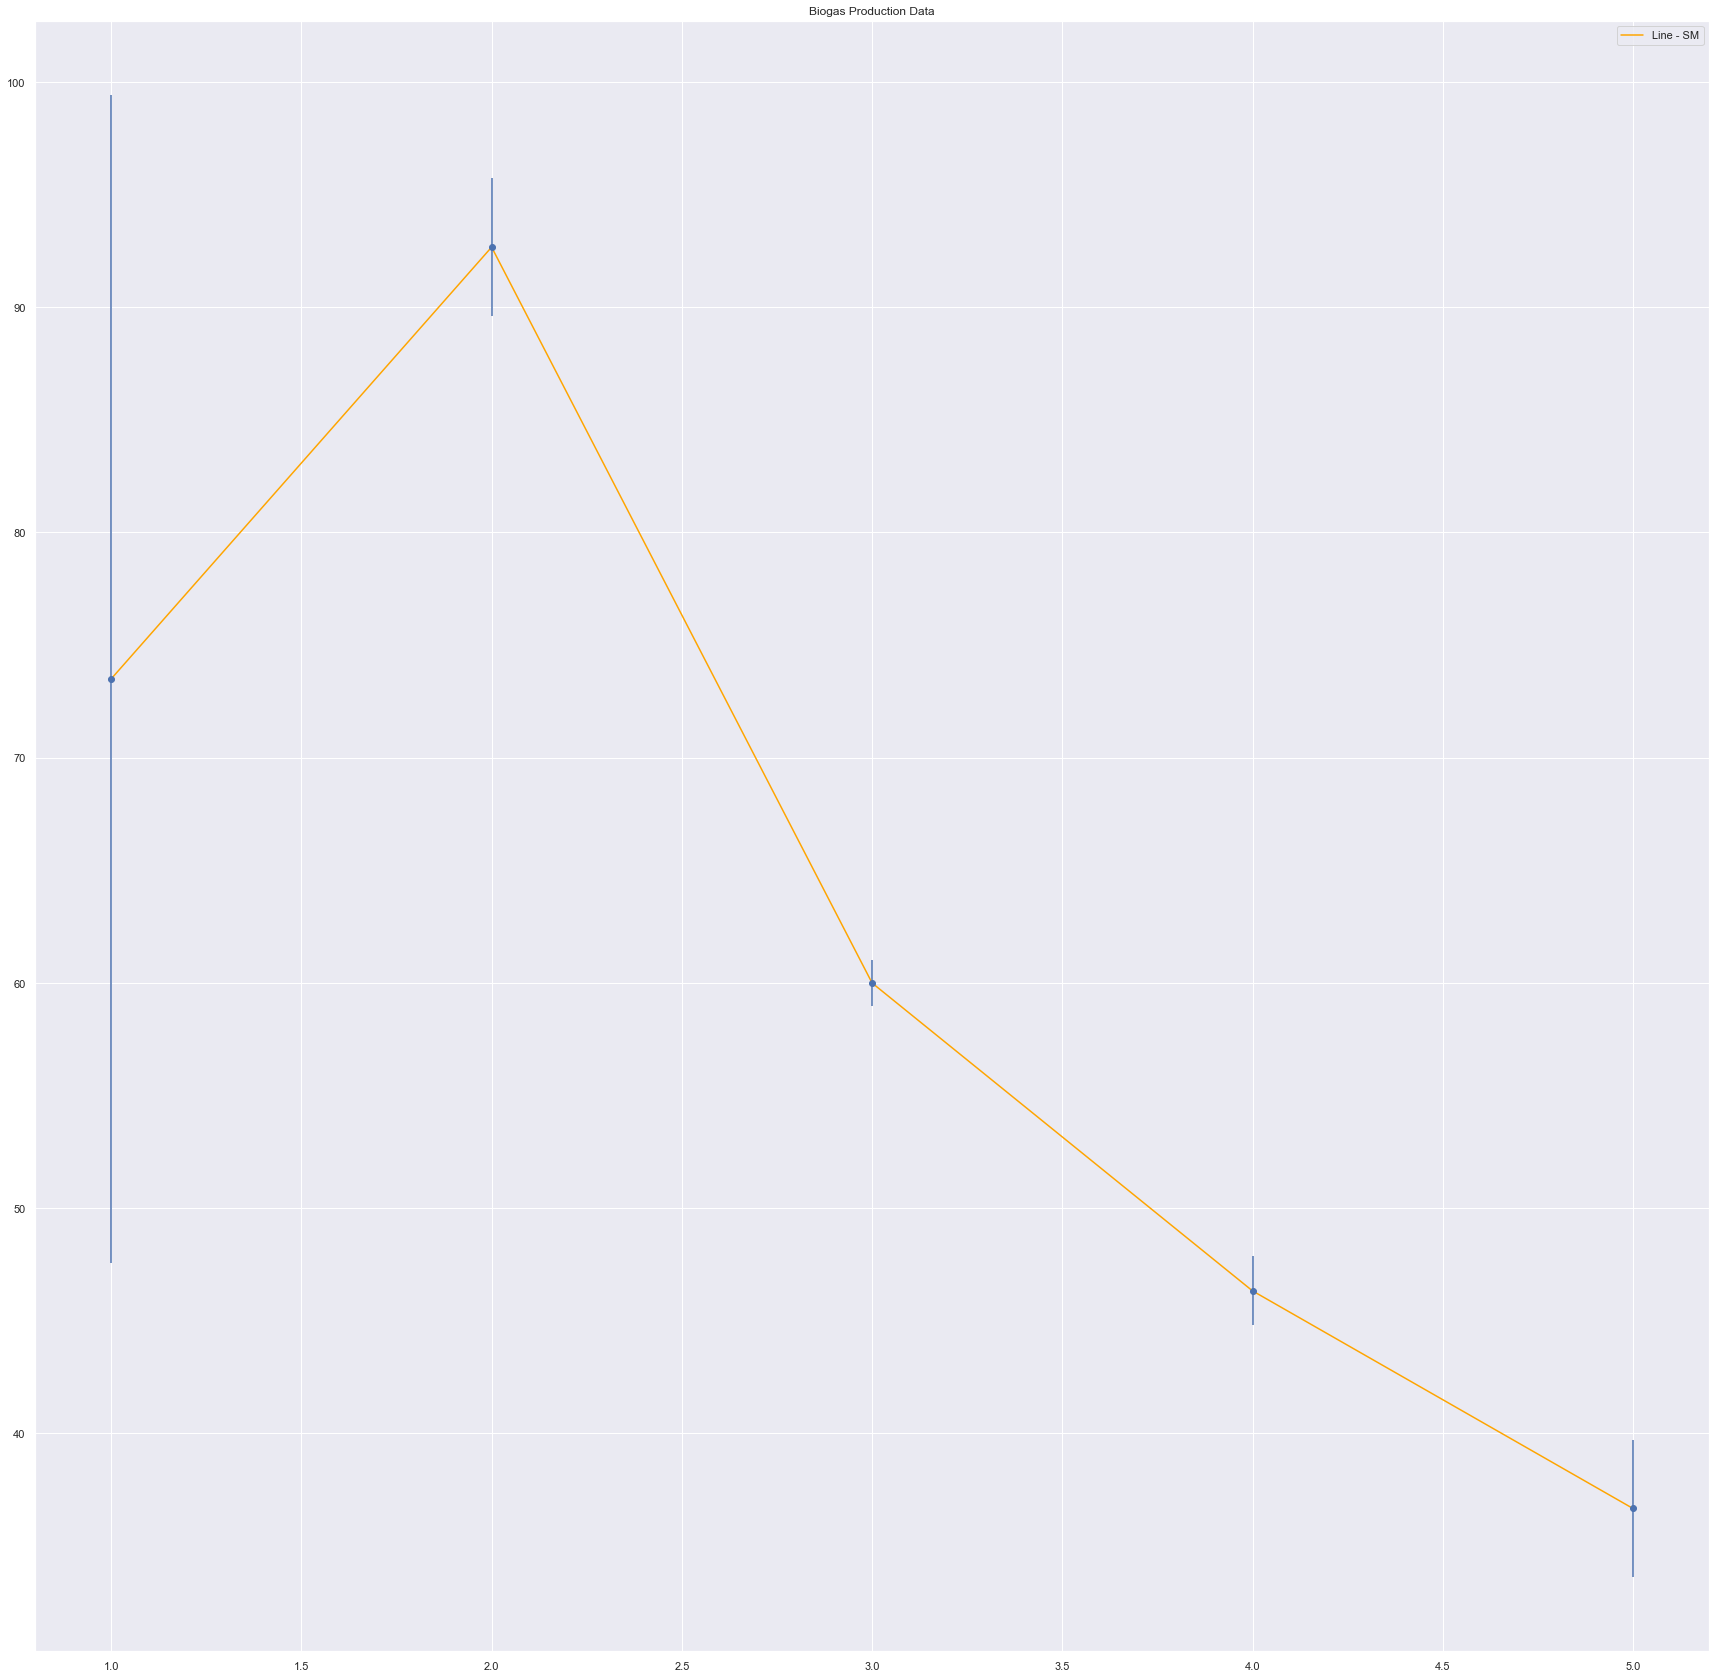

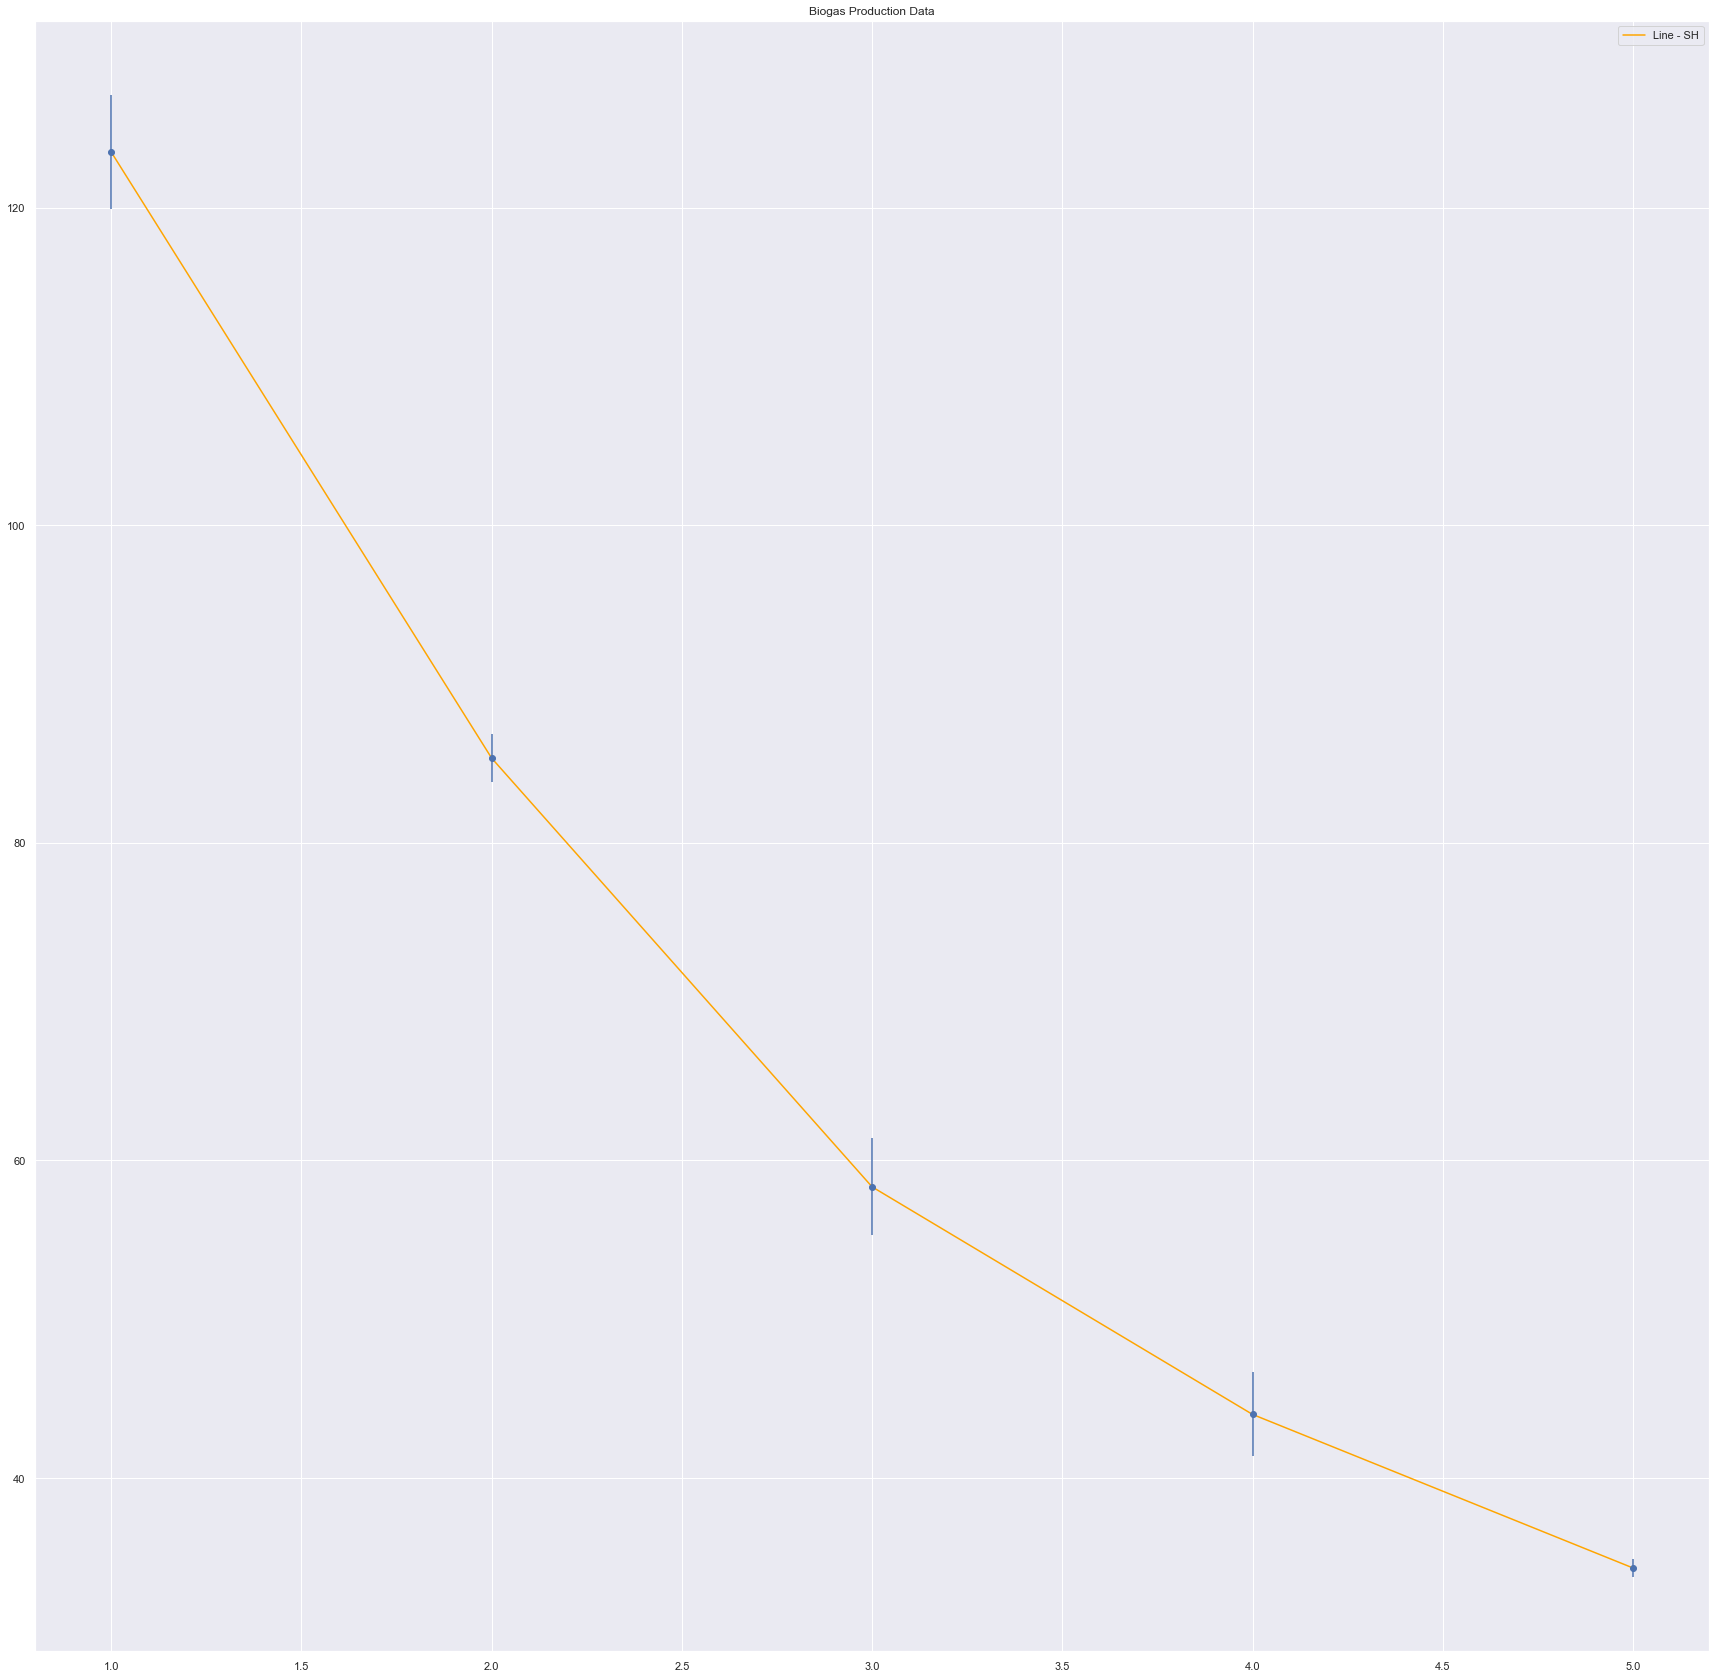

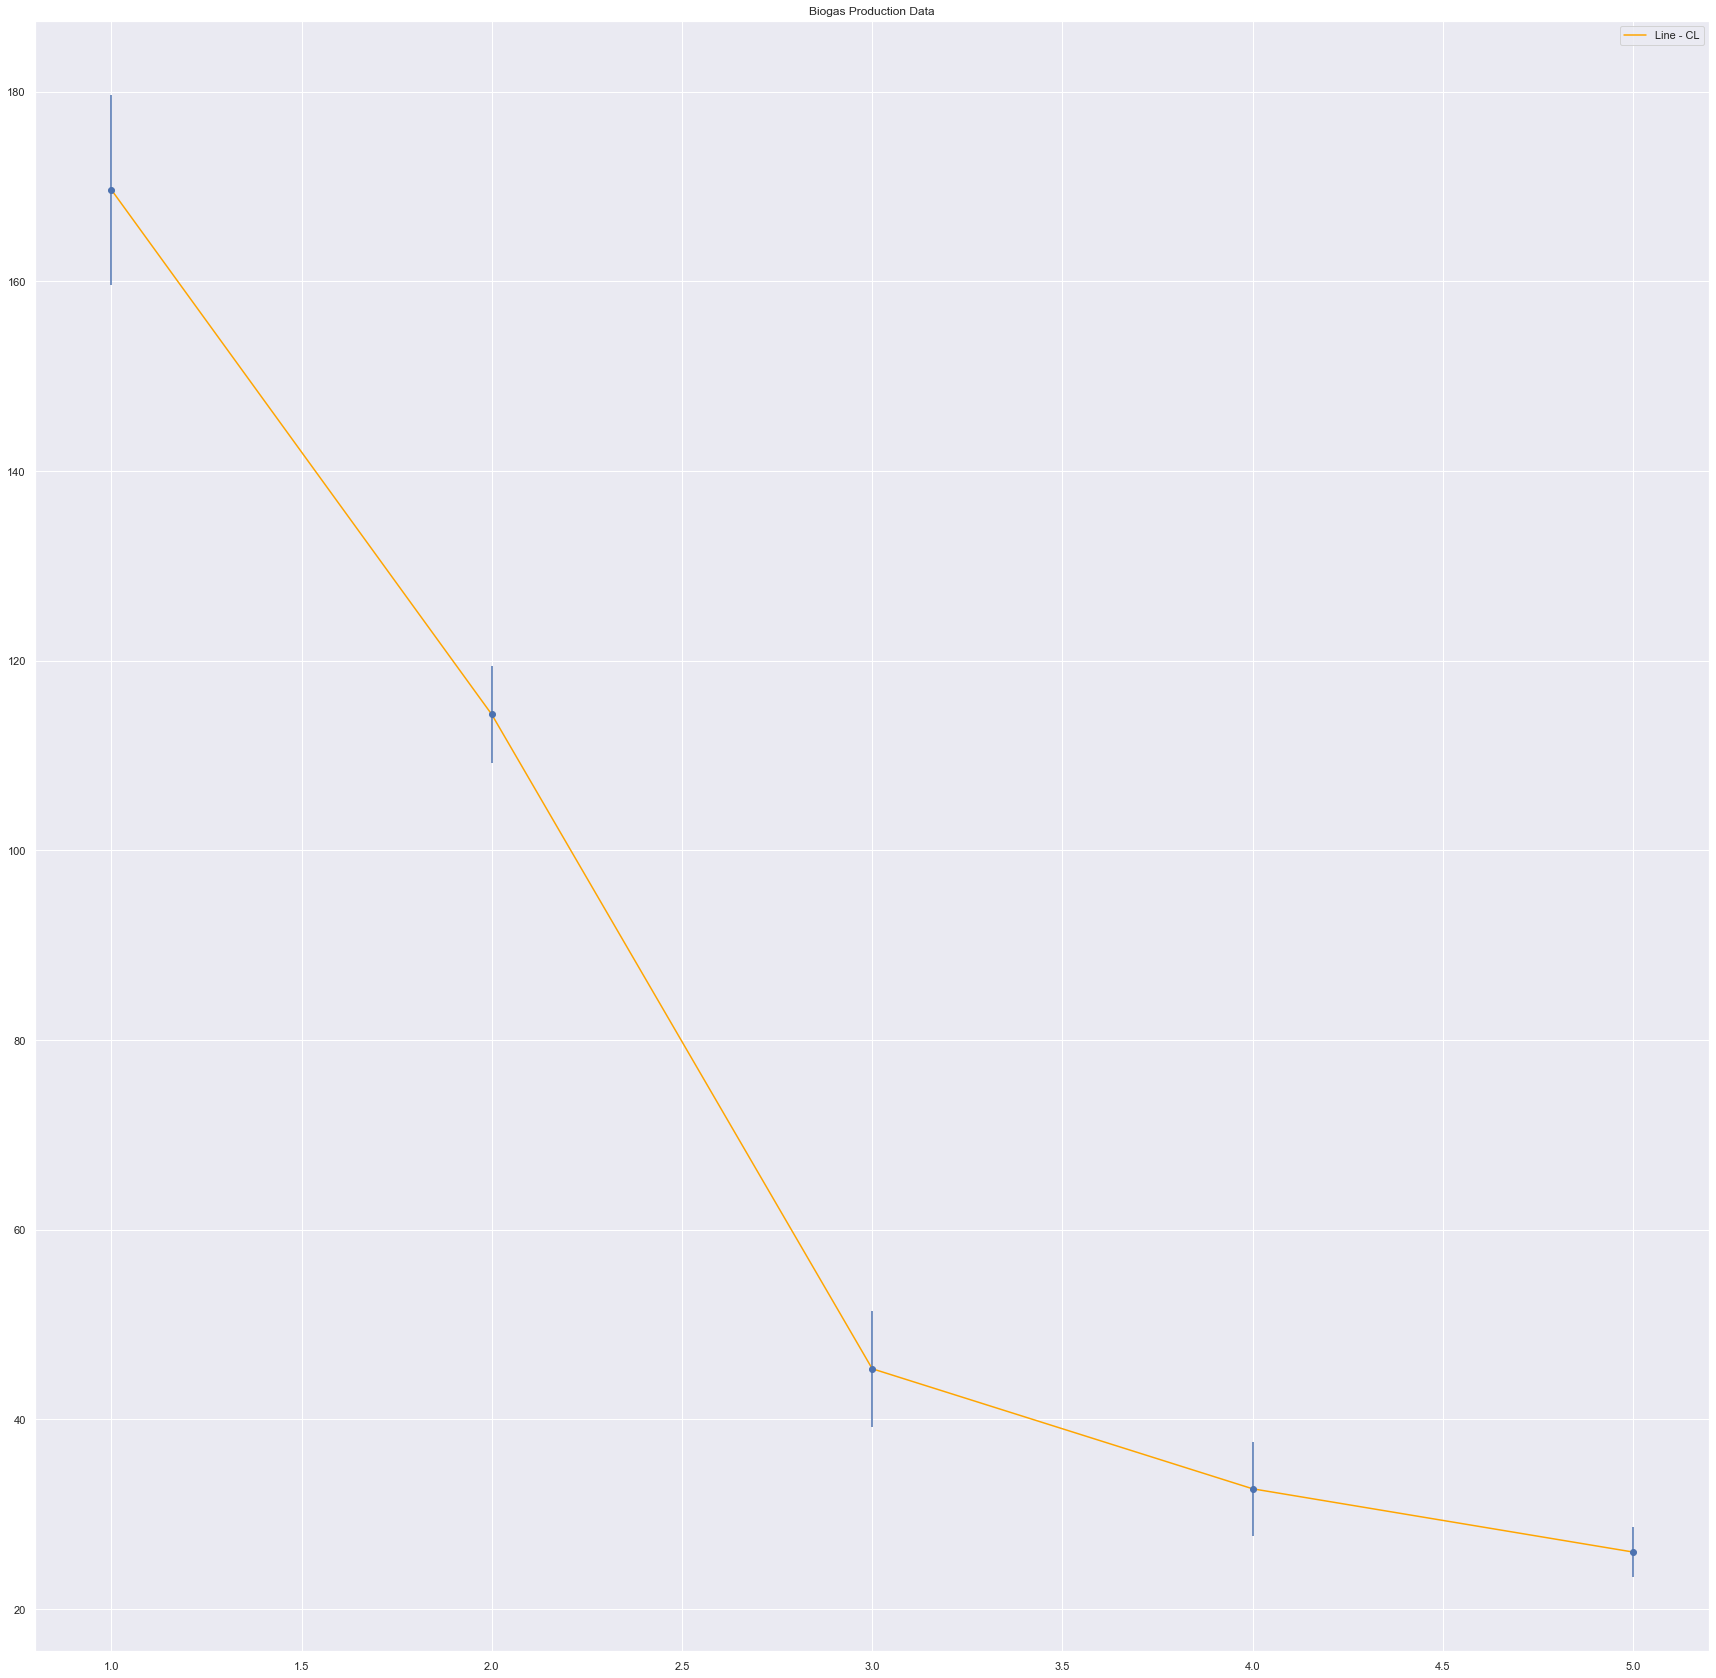

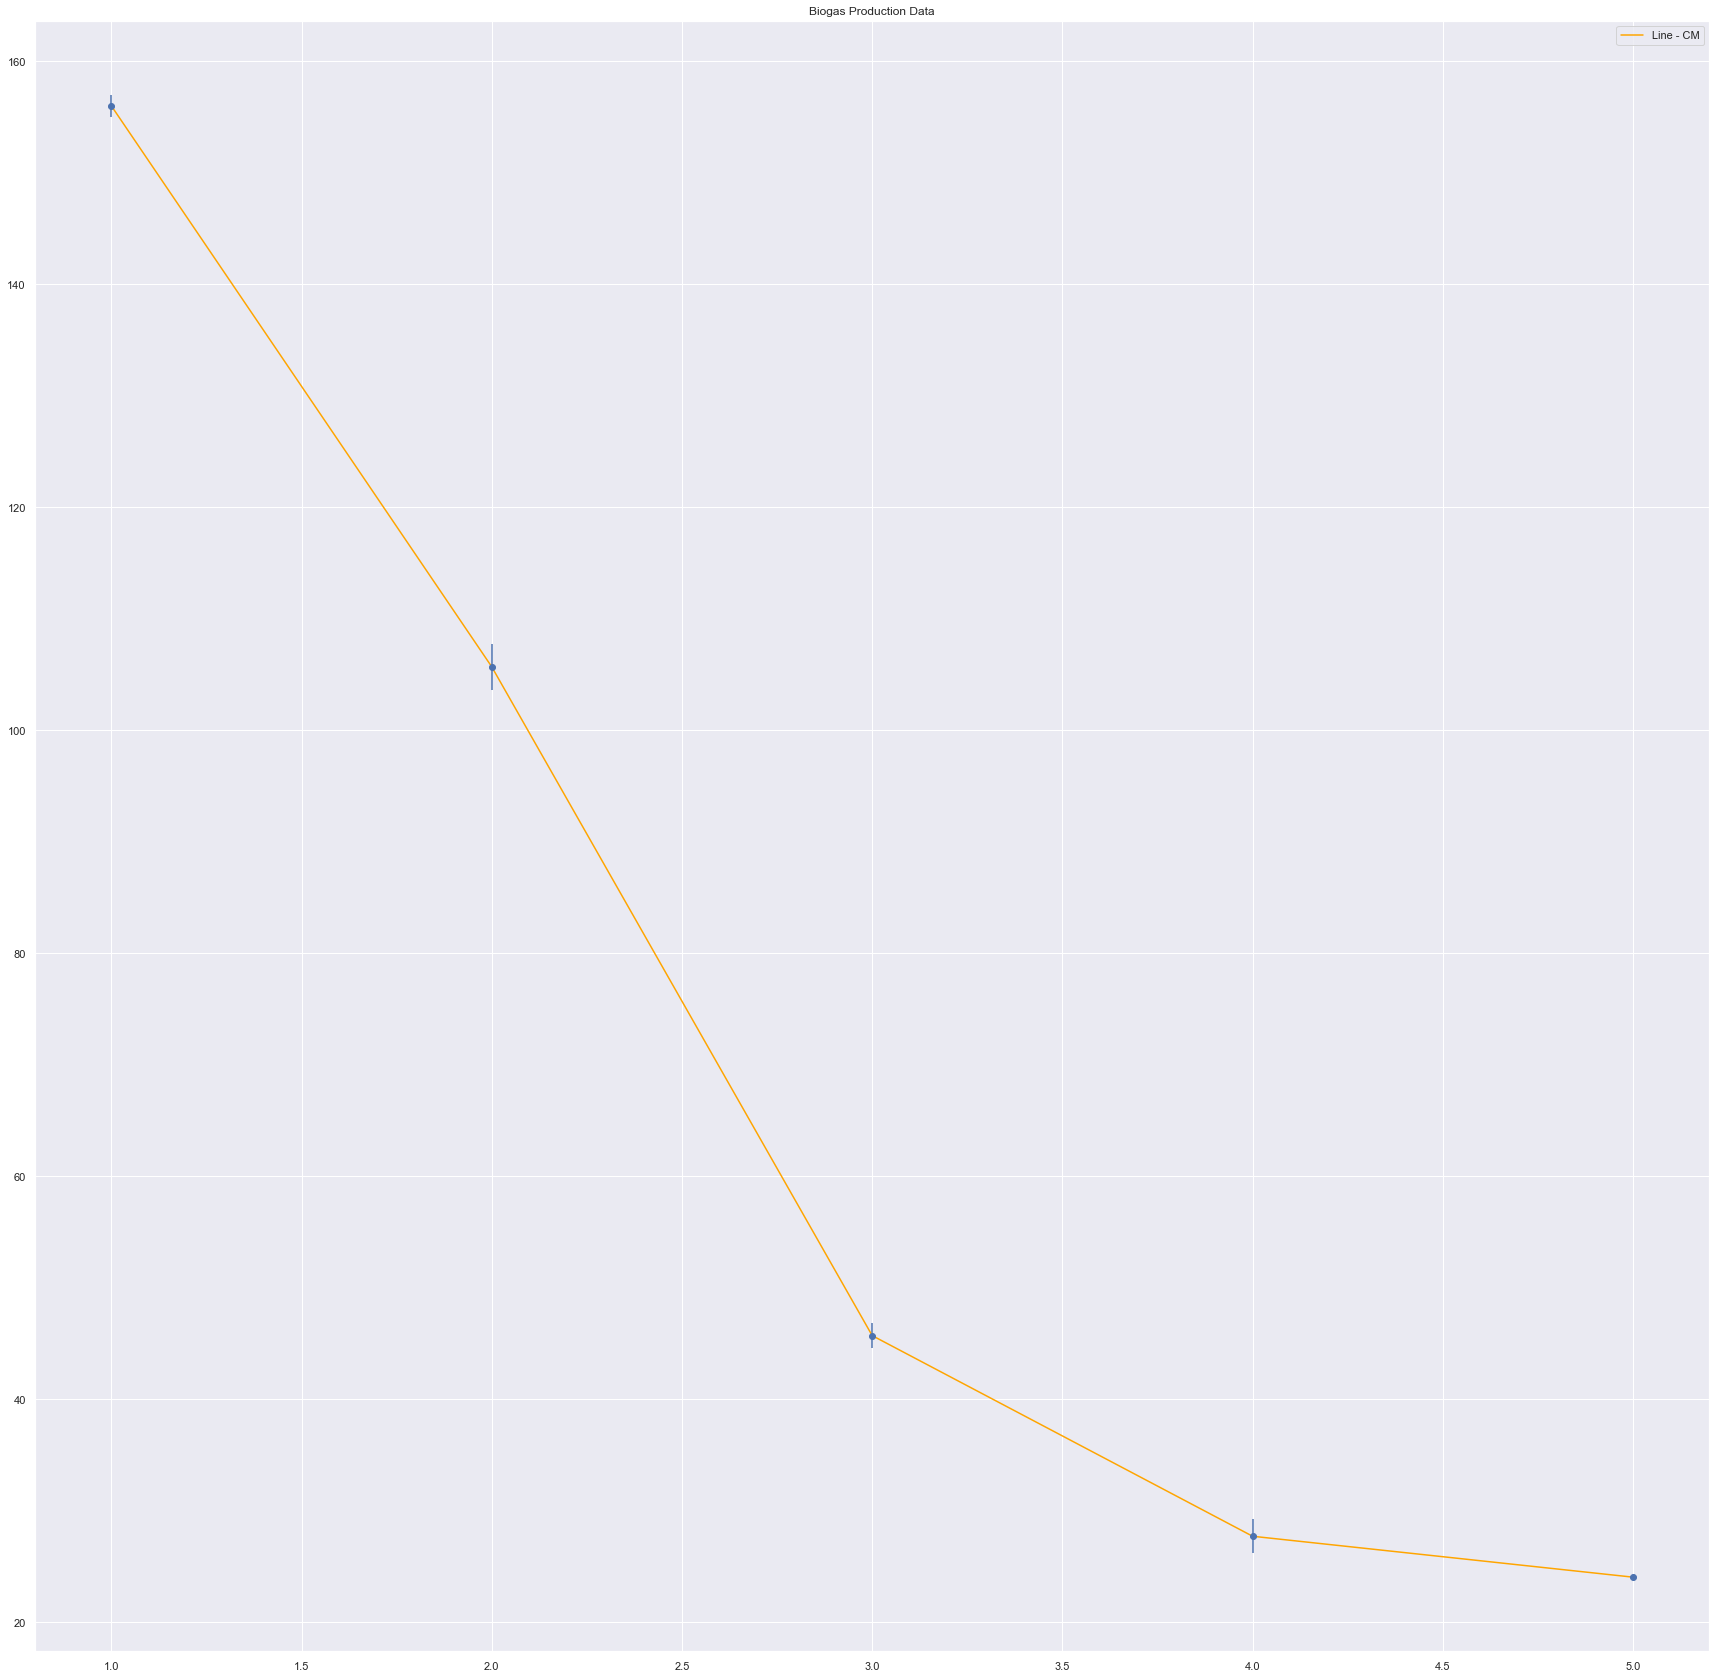

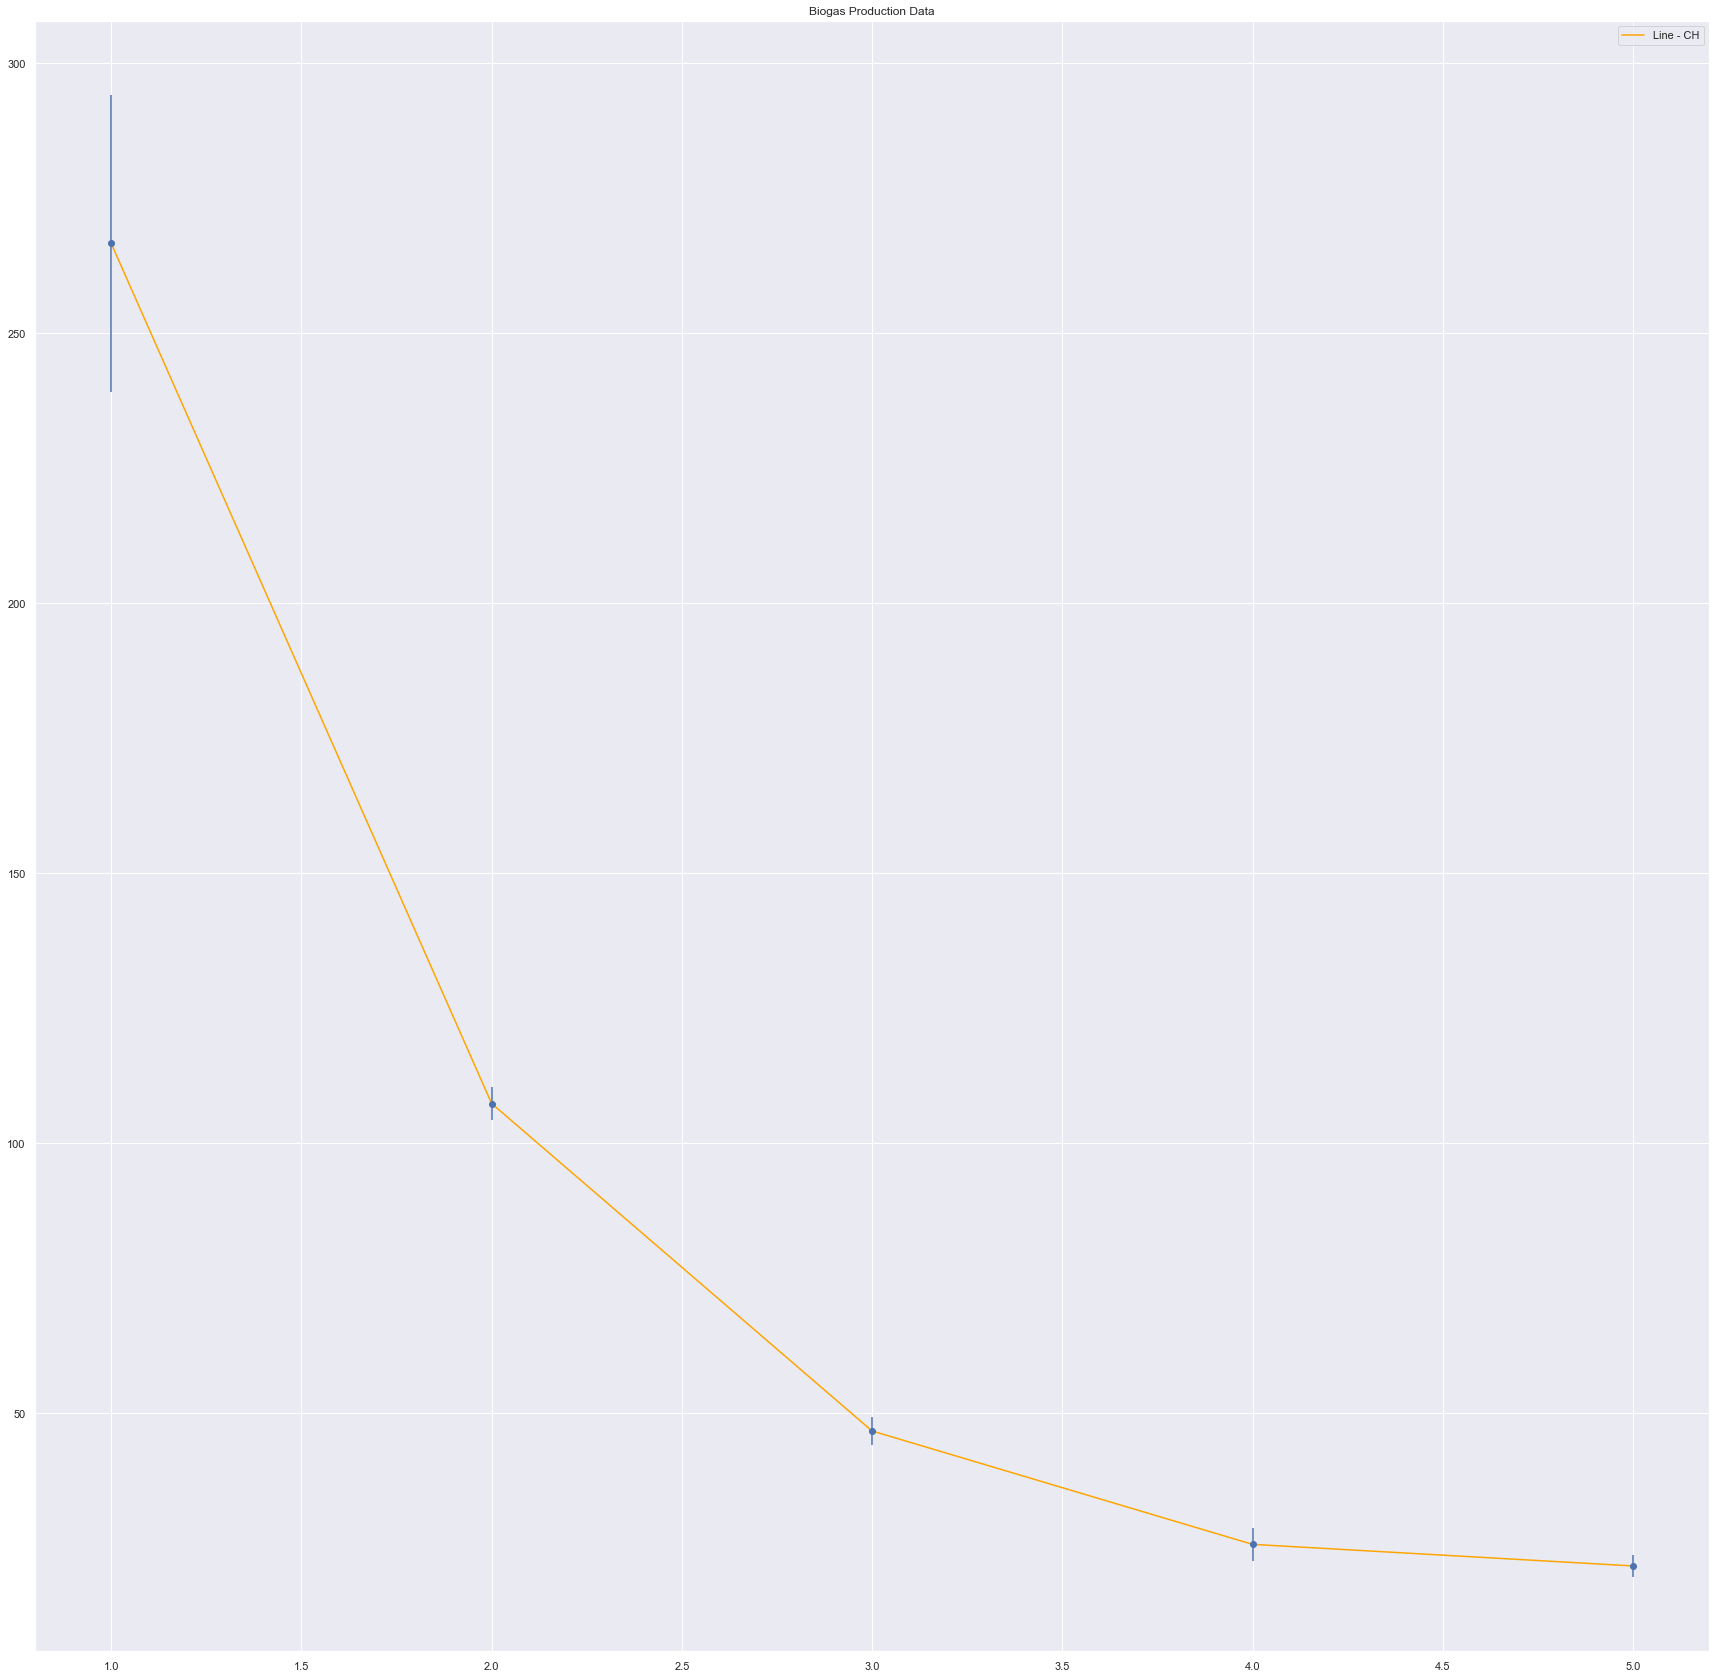

In [71]:
# Function to plot biogas production from day 1 to day 5 for a particular sample

biogas_data = pd.concat([day1.iloc[:,0], day2.iloc[:,0], day3.iloc[:,0], day4.iloc[:,0], day5.iloc[:,0]], axis = 1)
biogas_err = pd.concat([day1.iloc[:,1], day2.iloc[:,1], day3.iloc[:,1], day4.iloc[:,1], day5.iloc[:,1]], axis = 1)
x = list(range(1,6))
for row in range(len(samples)):
    plt.figure(figsize=(30,30))
    # Plot another line on the same chart/graph
    plt.title('Biogas Production Data')
    # plt.figure()
    plt.plot(x, biogas_data.iloc[row,:], 'b', label=f'Line - {samples[row]}', color = 'orange')
    plt.errorbar(x, biogas_data.iloc[row,:],
             yerr = biogas_err.iloc[row,:],
             fmt ='o')
    plt.legend()

plt.show()